### Lab2: In this lab we will calculate the bias and variance for different prediction models and determine the best model for a synthetic dataset


#### Usefull imports

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
import numpy as np 
import random 
import pickle 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
random_state = 3


#### Some global variables that can be used to check specific outputs

In [3]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs


## STEP 1: LOADING THE DATASET AND VISUALISING IT

## Load the dataset

Here we load the data_set from data.pkl file. The dataset contains pairs of points <x,y>.

In [4]:
#TODO: read dataset (data.pkl) using pandas.read_pickle. Note: this command will return a numpy array 
data_set=  pd.read_pickle('data.pkl')
#TODO: print the size of the dataset i.e the length of the numpy array
data_set_size =  len(data_set)
print(data_set_size )


5000


In [5]:
if(debug==1):
    #TODO: print the first 5 elements of the dataset 
    print(pd.DataFrame(data_set).head())
    

       0         1
0  0.000  2.000000
1  0.001  2.026000
2  0.002  2.051997
3  0.003  2.077990
4  0.004  2.103975


## Split The Dataset Into X and Y

Here we split the <x,y> pairs into x and y separate arrays

In [6]:
#TODO: store x and y in seperate arrays
x = pd.DataFrame(data_set).iloc[:, 0].values
y = pd.DataFrame(data_set).iloc[:, 1].values


In [7]:
if(debug==1):
    #TODO: print the first 5 elements of x and y
    print("X: ",pd.DataFrame(x).head())
    print("Y: ",pd.DataFrame(y).head())


X:         0
0  0.000
1  0.001
2  0.002
3  0.003
4  0.004
Y:            0
0  2.000000
1  2.026000
2  2.051997
3  2.077990
4  2.103975


## Graphing the given dataset

Here we plot the given dataset, just to get the feel of the dataset provided.

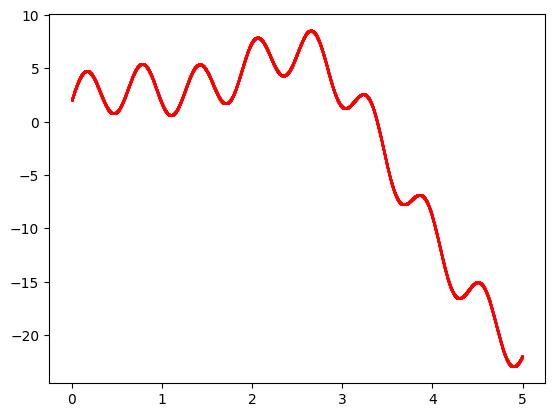

In [8]:
#TODO: plot the dataset
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=2)
plt.show()


## STEP 2: RESAMPLING DATA SETS

### Split The Dataset Into Testing And Training Datasets

This line splits the dataset into the testing and training datasets in the ratio 1:9

In [9]:
#TODO: split the dataset into training set and testing set with ratio 9:1 using tran_test_split function while shuffling the dataset Note: set random_state = 3
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=random_state)
#TODO: save the size of the training and testing sets 
train_data_size = len(xTrain)
test_data_size = len(xTest)


In [10]:
if(debug==1):
    #TODO: print the size of the training and testing sets
    print(train_data_size)
    print(test_data_size)


4500
500


## Split The Training Dataset Into 10 Different Training Datasets

Here, we run a loop 10 times and store the train dataset values from start_in to the end_in as a numpy array in a list (X_train_data_sets and Y_train_data_sets), and update the values of start_in and end_in in each iteration of the loop.

In [11]:
X_train_data_sets = list()
Y_train_data_sets = list()
start_in = 0
train_data_sets_size = int(train_data_size/10)
end_in = train_data_sets_size
for i in range(10):
    #TODO: Append xTrain data from start index to end index to X_train_data_sets
    X_train_data_sets.append(pd.DataFrame(xTrain).iloc[start_in:end_in, :].values)
    #TODO: Append yTrain data from start index to end index to y_train_data_sets
    Y_train_data_sets.append(pd.DataFrame(yTrain).iloc[start_in:end_in, :].values)
    #TODO: Update the start index and the end index to start from where the last dataset finished
    start_in = end_in
    end_in += train_data_sets_size


In [12]:
if(debug==1):
    #TODO: Print the size of the splitted datasets Hint: all of them have the same size 
    for i in range(10):
        print(f"Dataset {i} sizes: ")
        print("X_train size: ", len(X_train_data_sets[i]))
        print("Y_train size: ", len(Y_train_data_sets[i]))


Dataset 0 sizes: 
X_train size:  450
Y_train size:  450
Dataset 1 sizes: 
X_train size:  450
Y_train size:  450
Dataset 2 sizes: 
X_train size:  450
Y_train size:  450
Dataset 3 sizes: 
X_train size:  450
Y_train size:  450
Dataset 4 sizes: 
X_train size:  450
Y_train size:  450
Dataset 5 sizes: 
X_train size:  450
Y_train size:  450
Dataset 6 sizes: 
X_train size:  450
Y_train size:  450
Dataset 7 sizes: 
X_train size:  450
Y_train size:  450
Dataset 8 sizes: 
X_train size:  450
Y_train size:  450
Dataset 9 sizes: 
X_train size:  450
Y_train size:  450


### Graphing Each Of The Training Datasets

Here we graph each of the training datasets separately. (to check if the datasets are sampled properly)

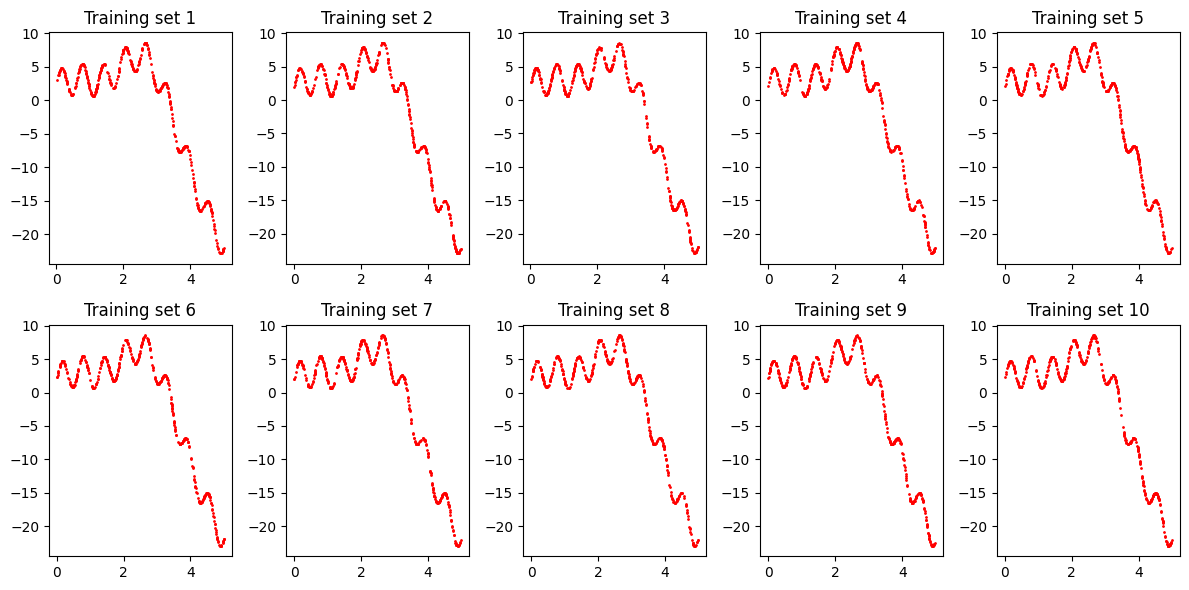

In [13]:
if(debug==1):
    # Create a single figure with 10 separate plots
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flatten()):
        # print("Training set ",i)
        ax.set_title(f'Training set {i+1}')
        #TODO plot the current dataset, use red dots and markersize = 2
        ax.plot(X_train_data_sets[i], Y_train_data_sets[i], 'r.', markersize=2)
    plt.tight_layout()
    plt.show()


### STEP 3: TRAINING A MODEL

#### Plotting A Graph Of The Trained Polynomial Regression Model

Here, we take each of the training datasets, and plot the training dataset points and the values predicted by the model on the test dataset points, to visualise the provided data.
For each training set, 9 graphs are plotted, each corresponding to the model of each degree (from 0 to 9)

In [14]:
# print(xTest)


In [15]:
# print(xTest[:, np.newaxis])


<Figure size 640x480 with 0 Axes>

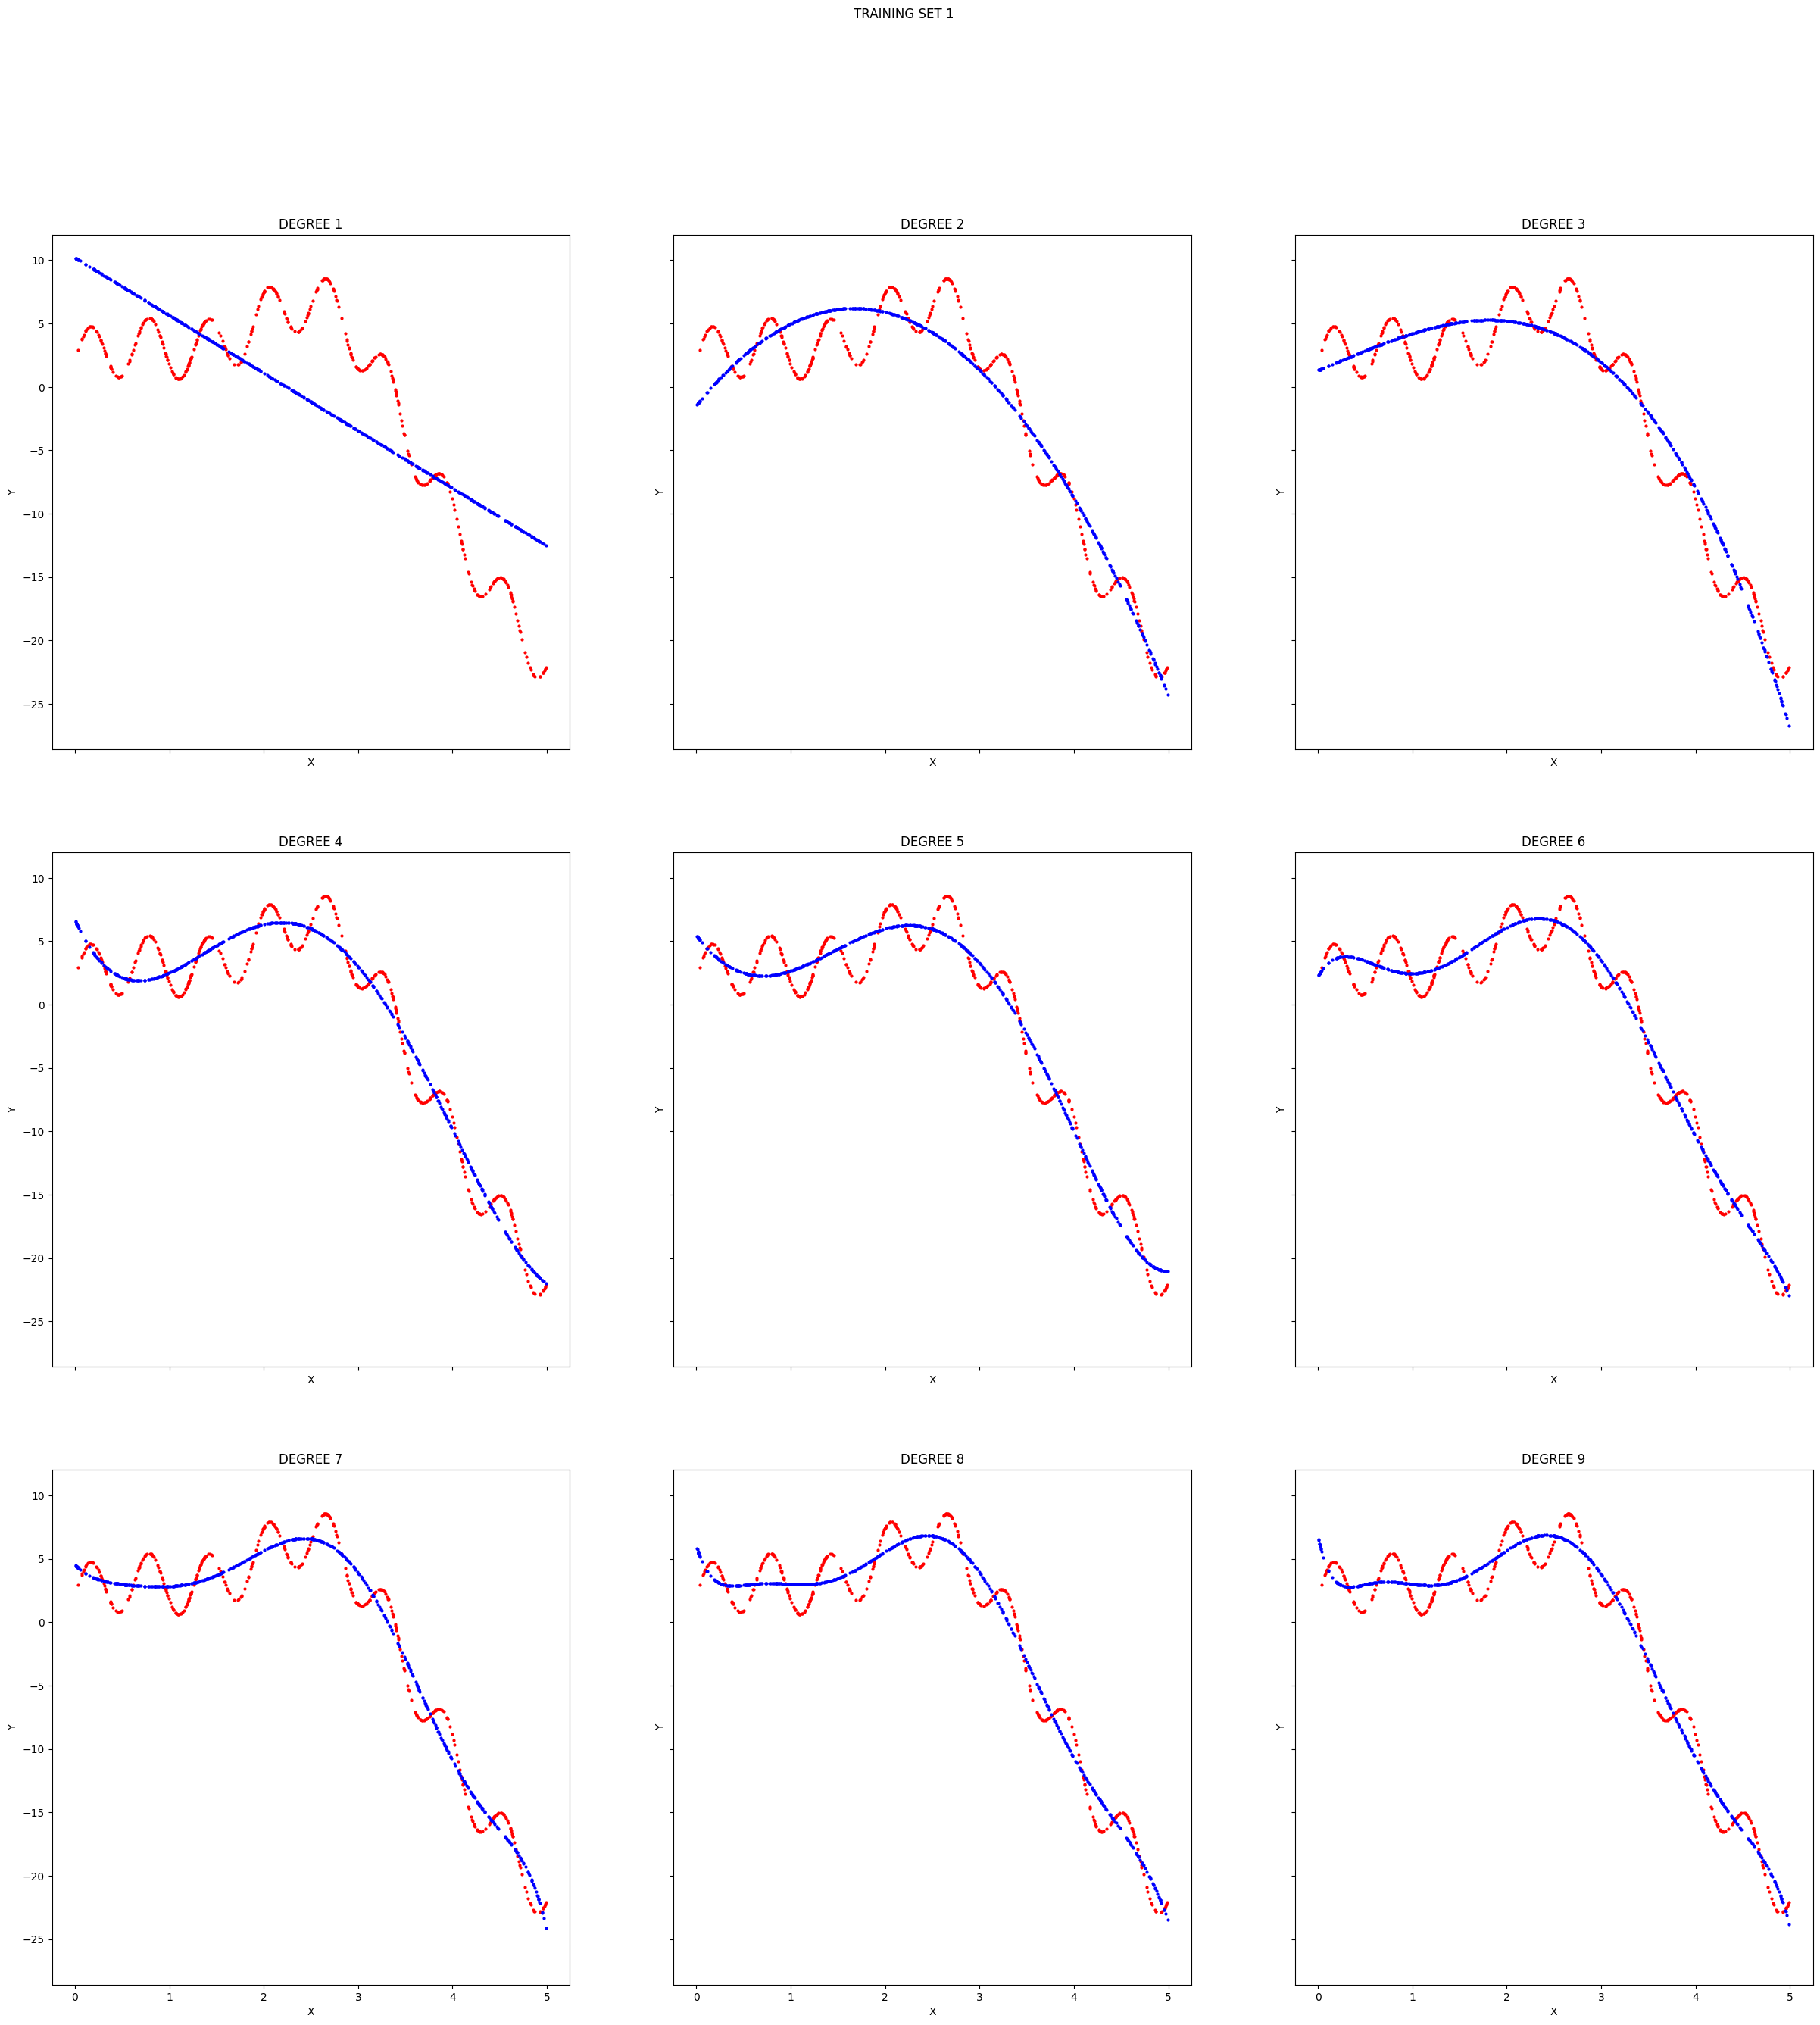

<Figure size 640x480 with 0 Axes>

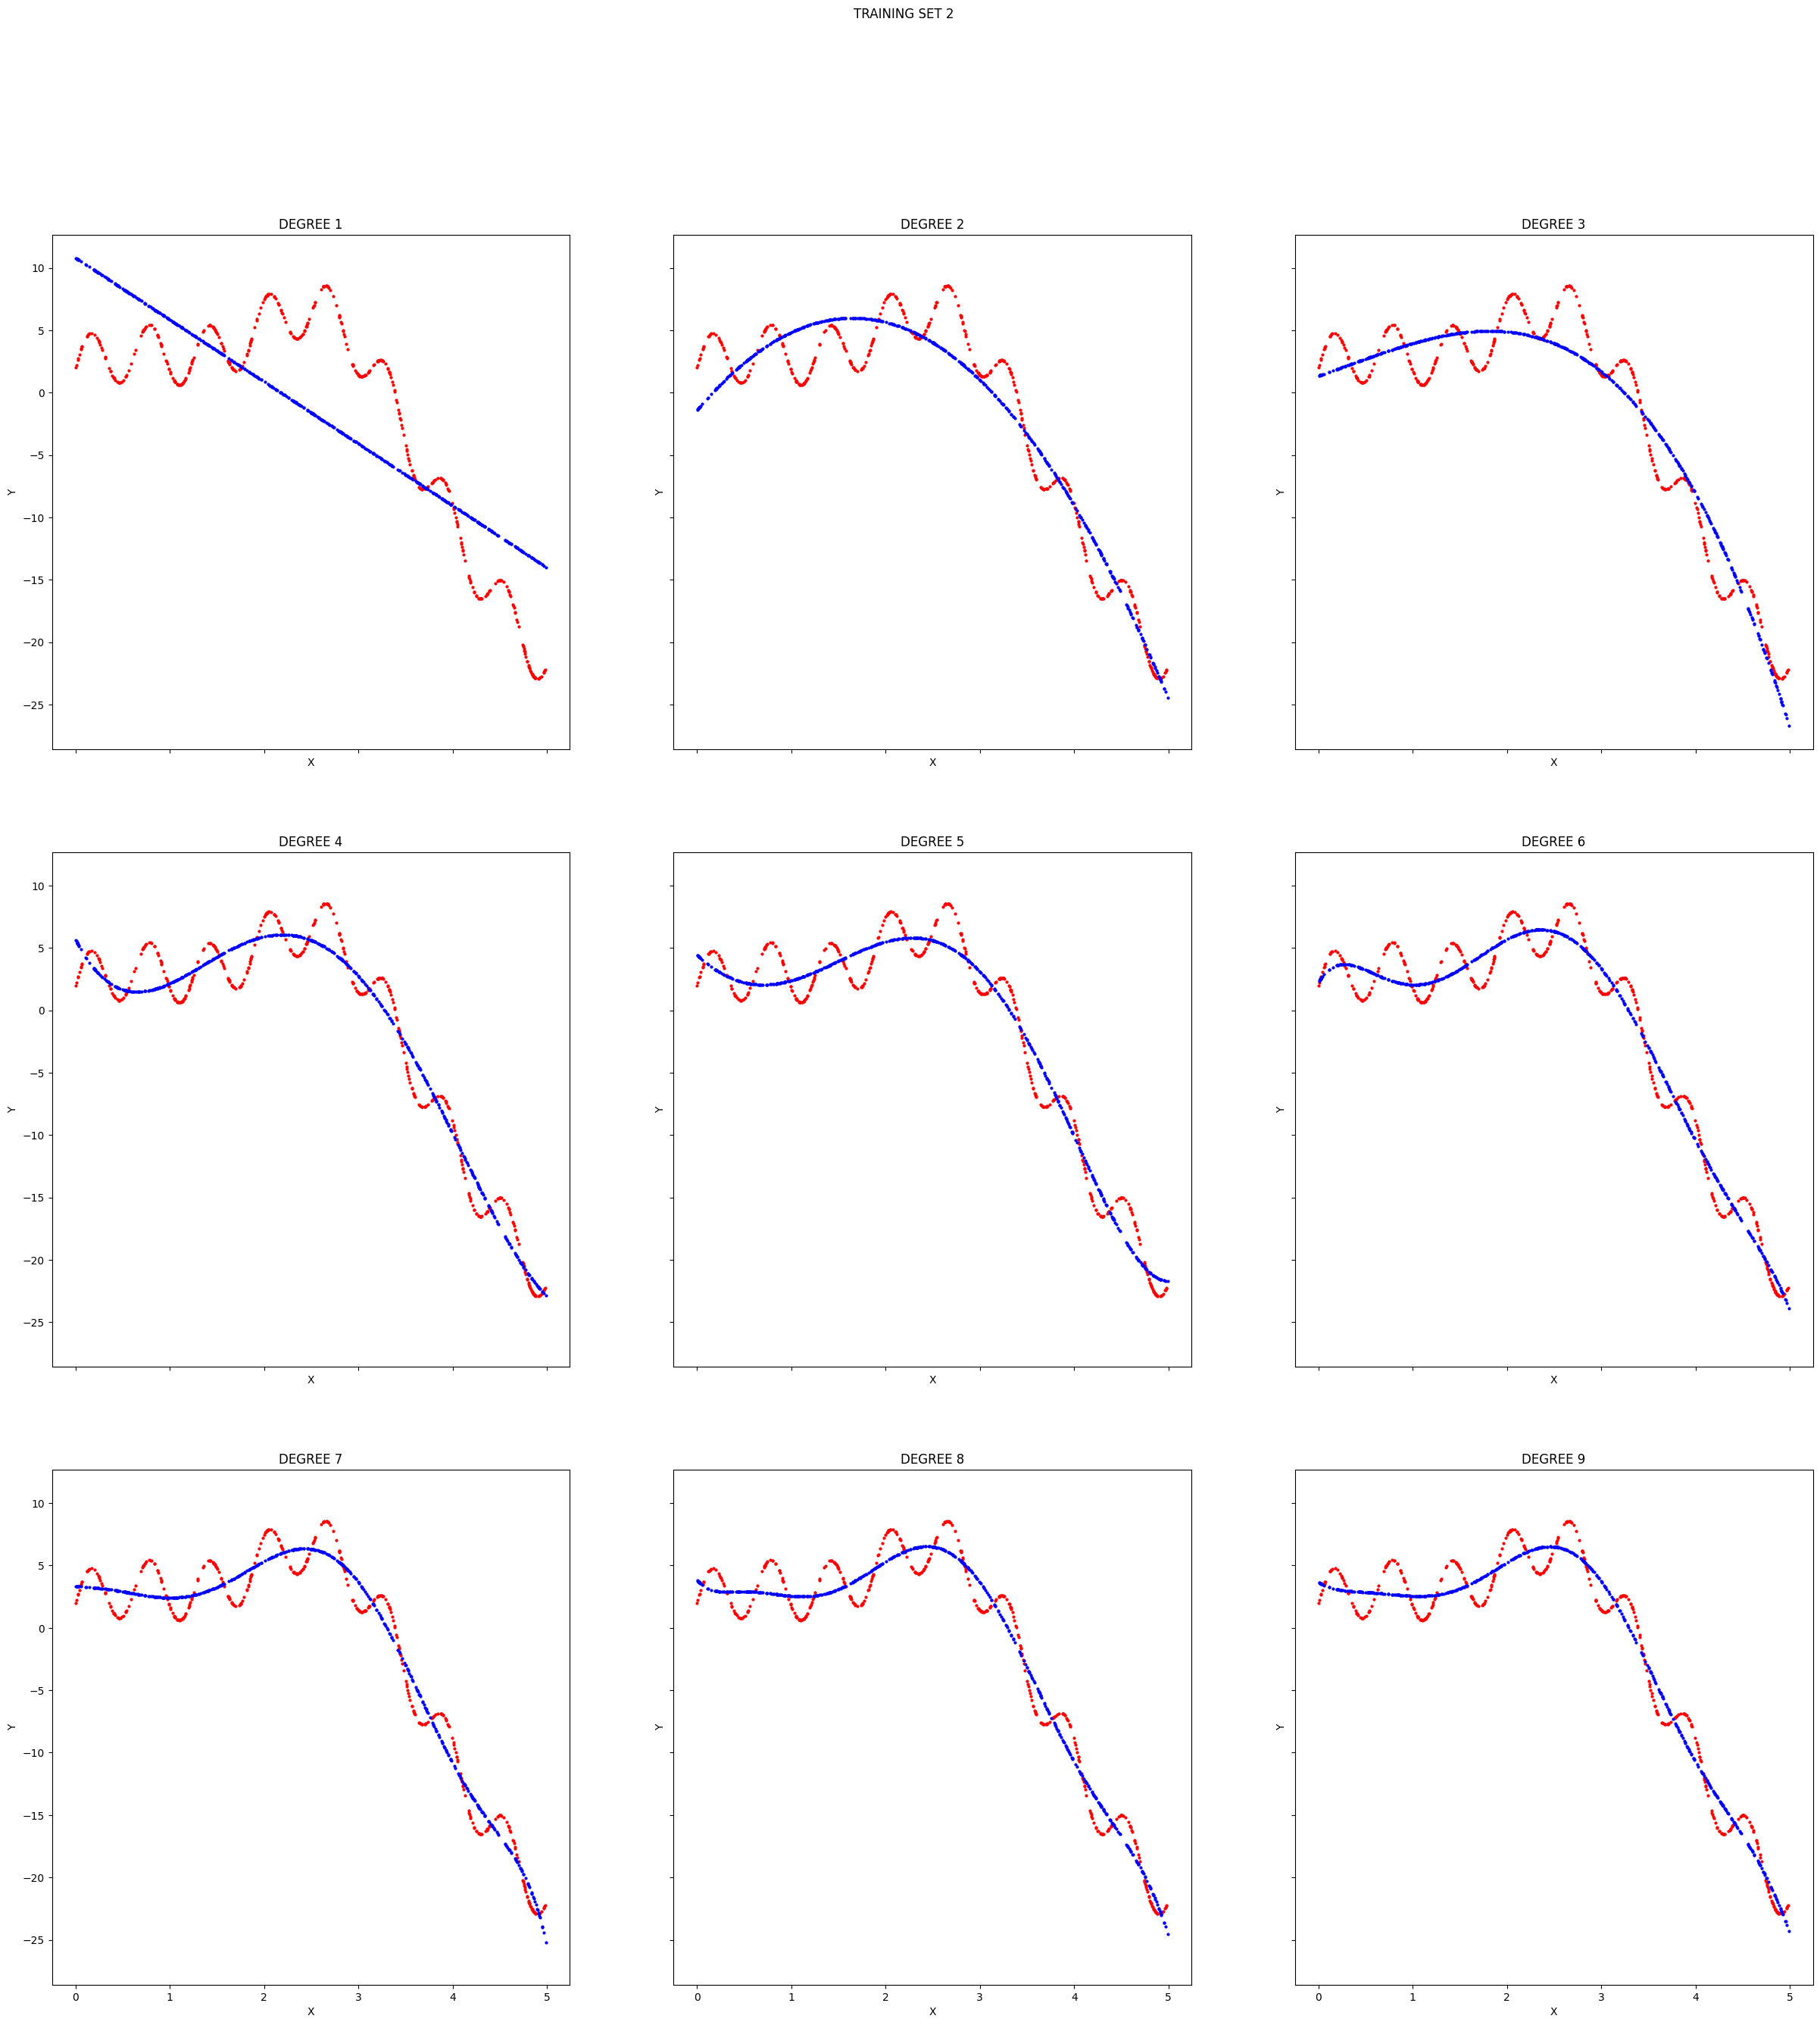

<Figure size 640x480 with 0 Axes>

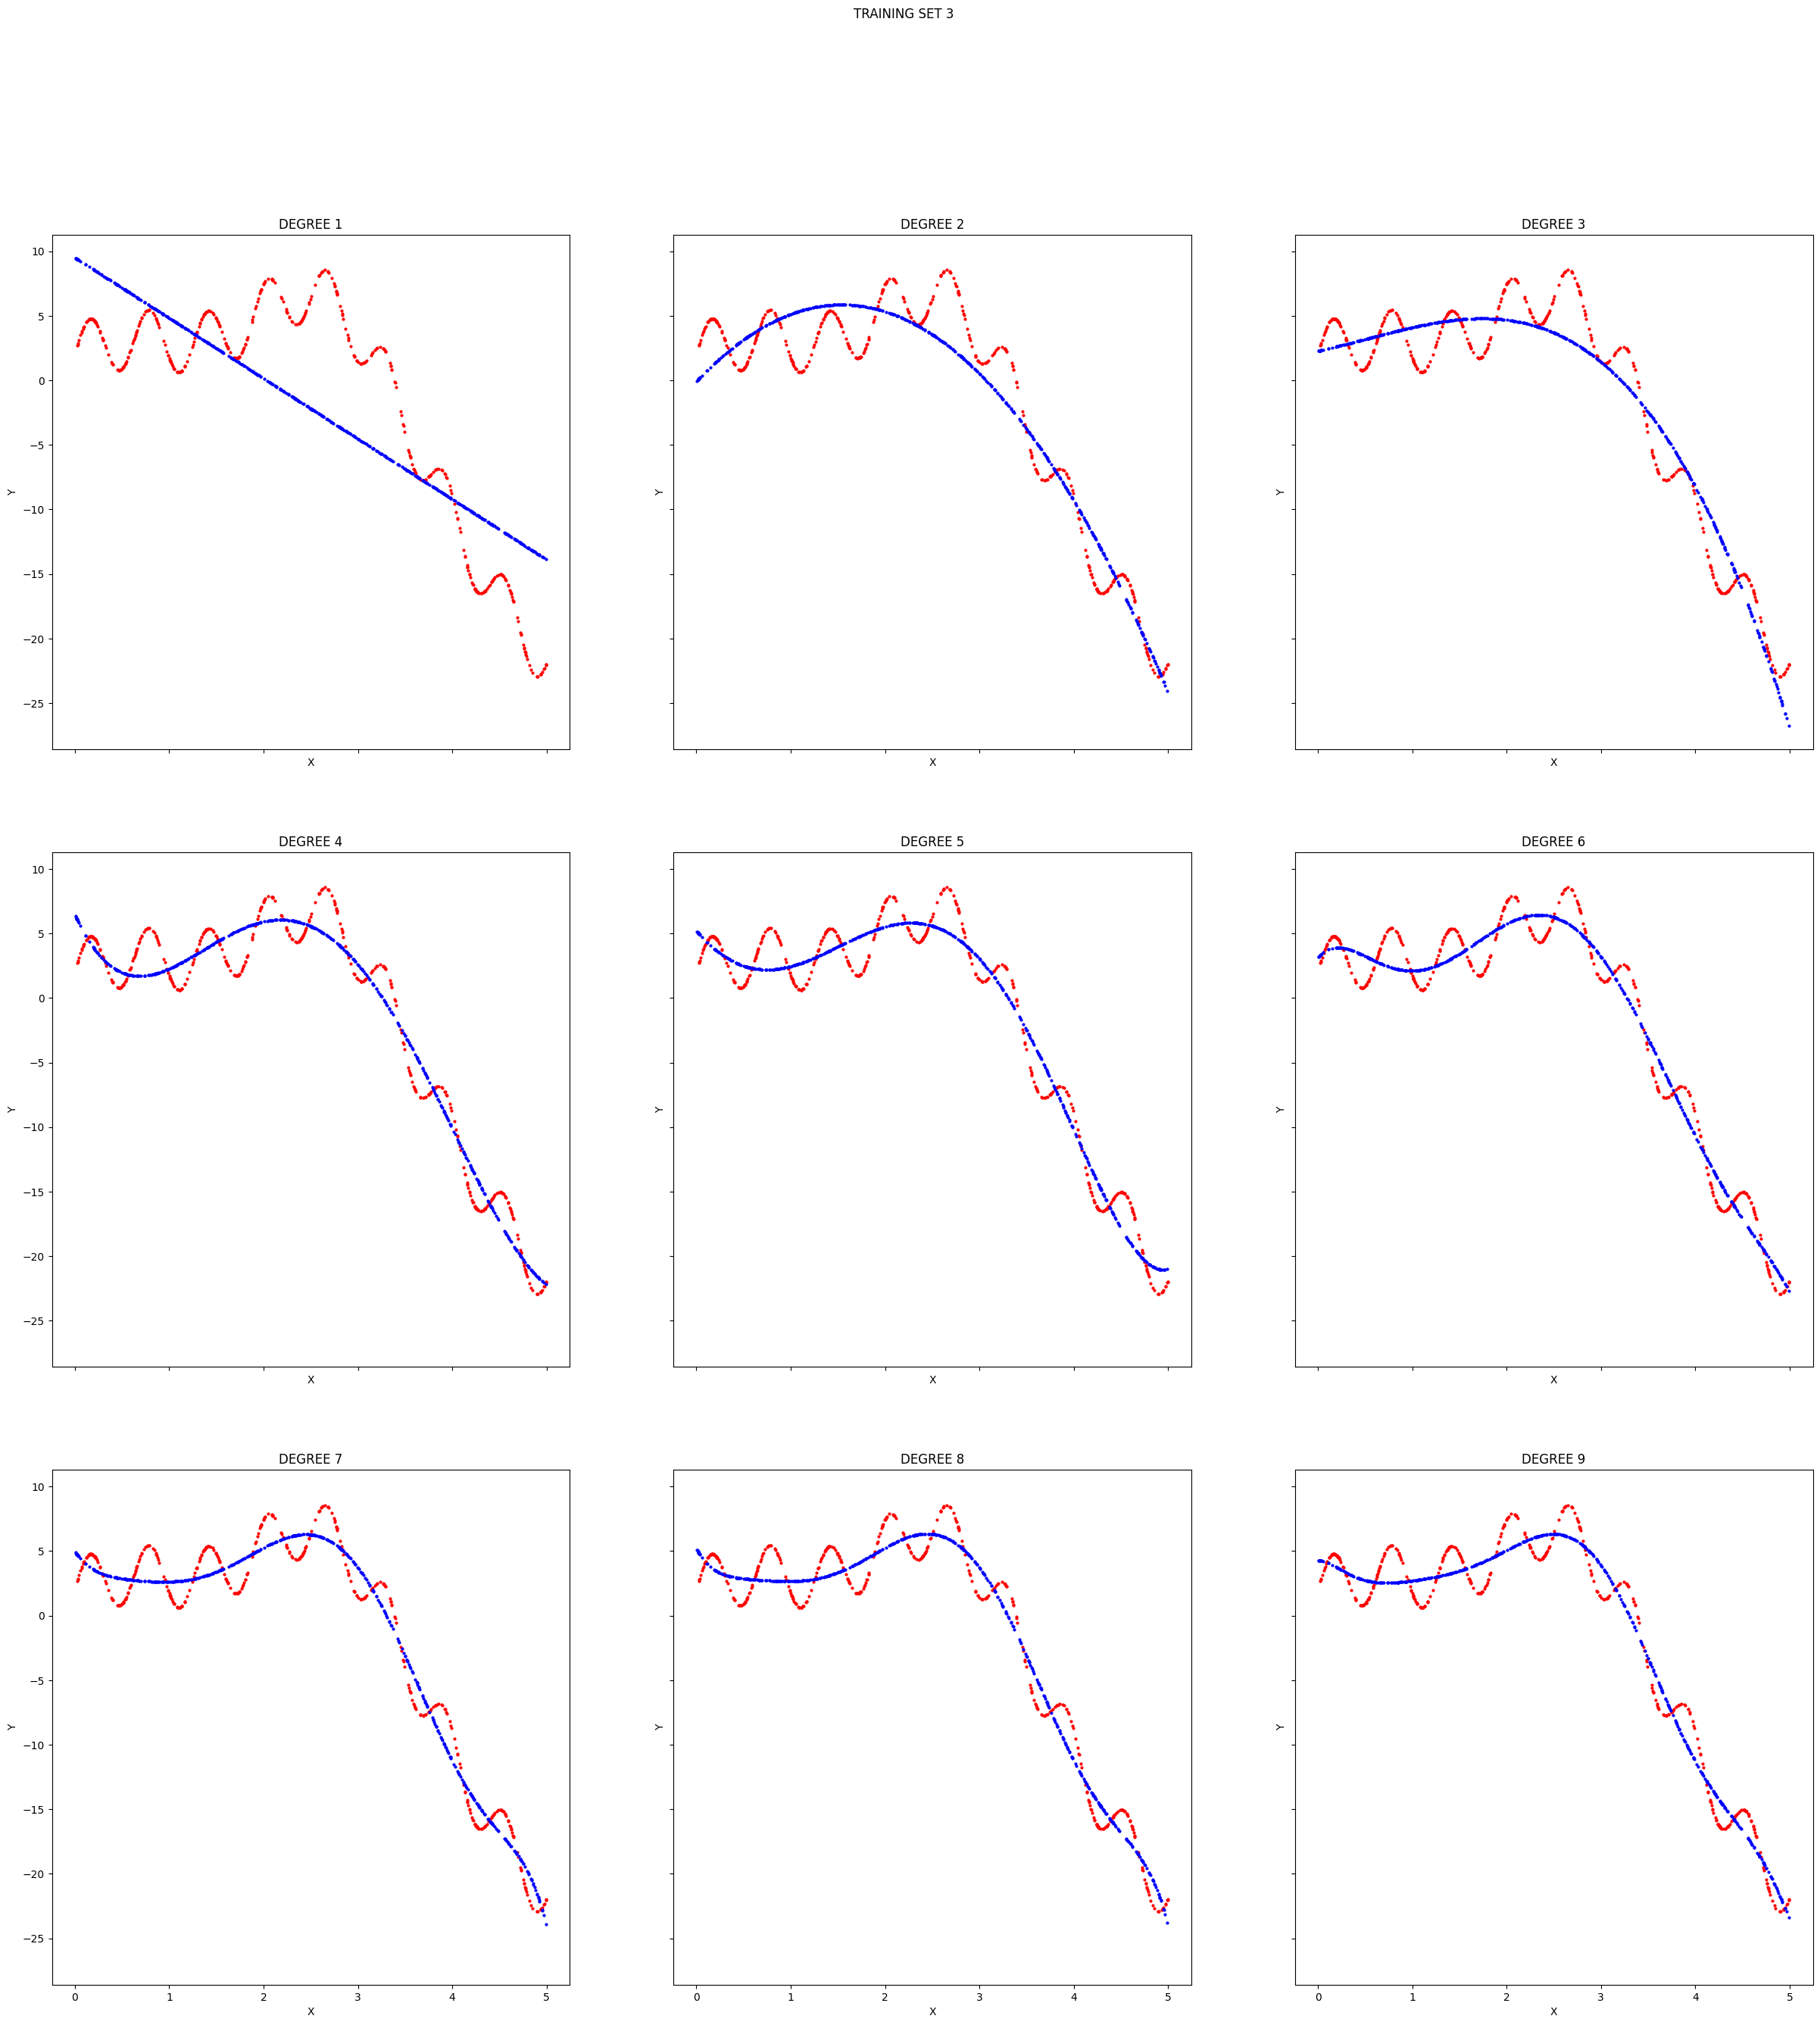

<Figure size 640x480 with 0 Axes>

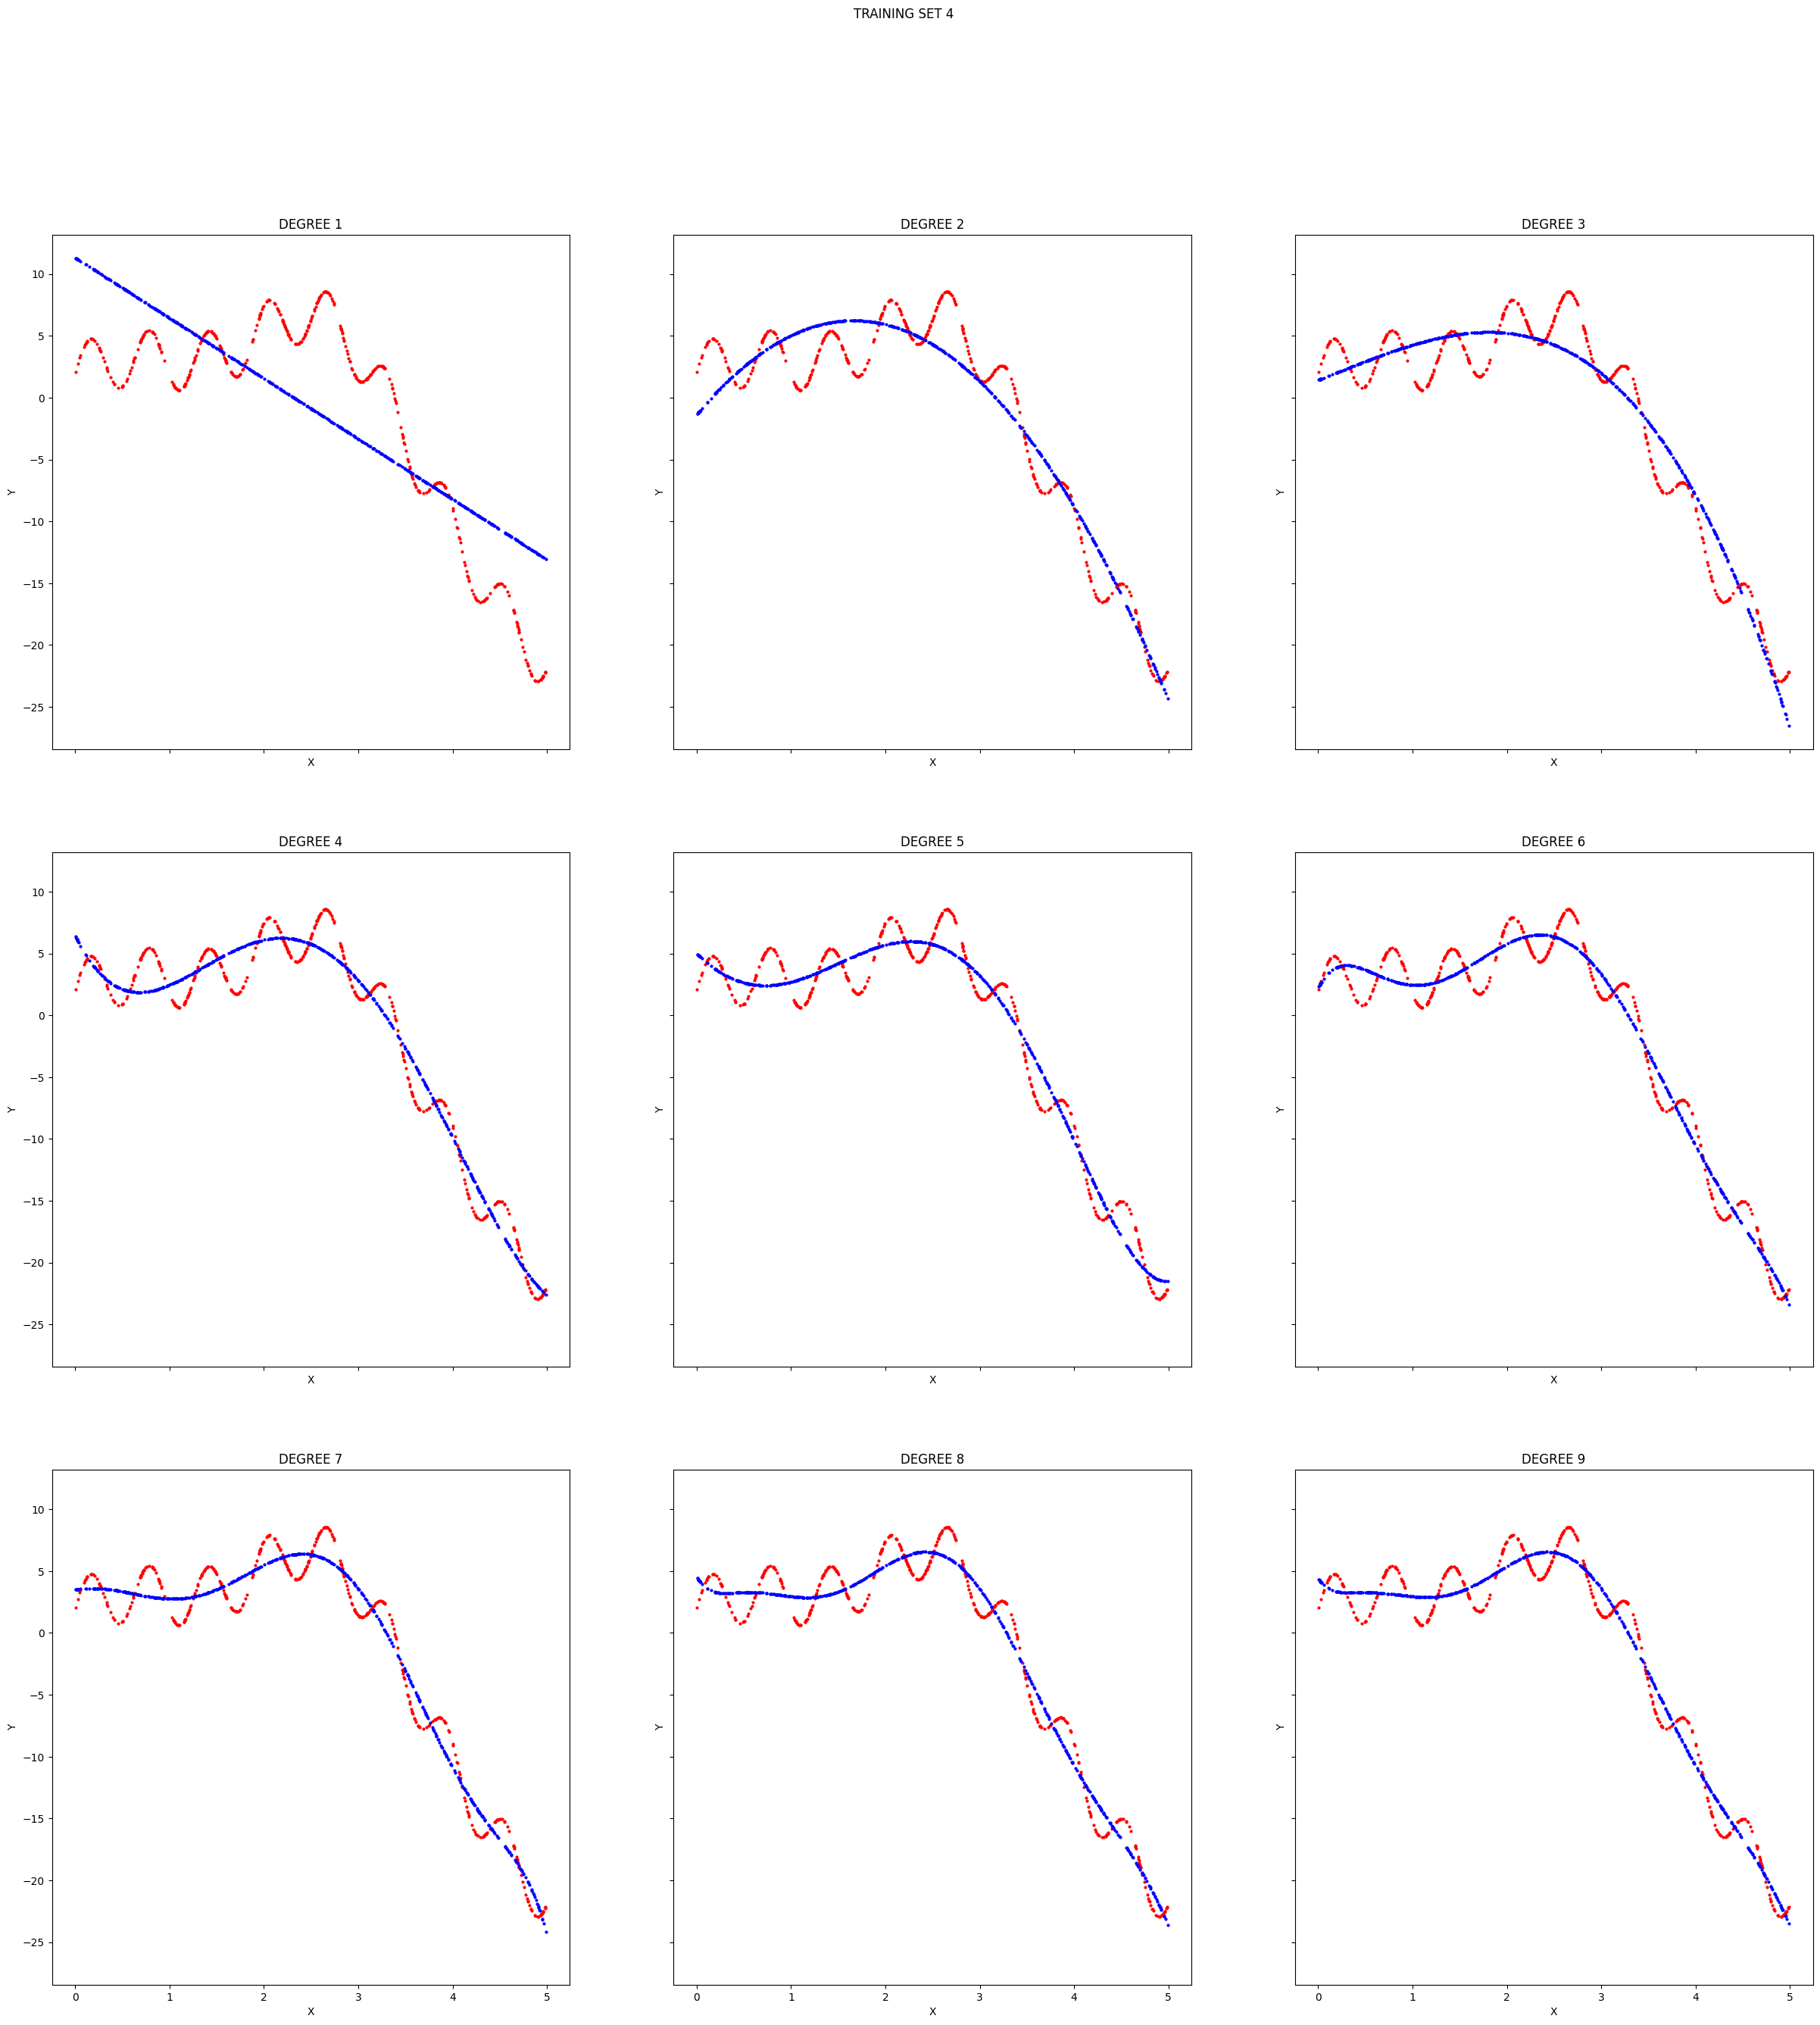

<Figure size 640x480 with 0 Axes>

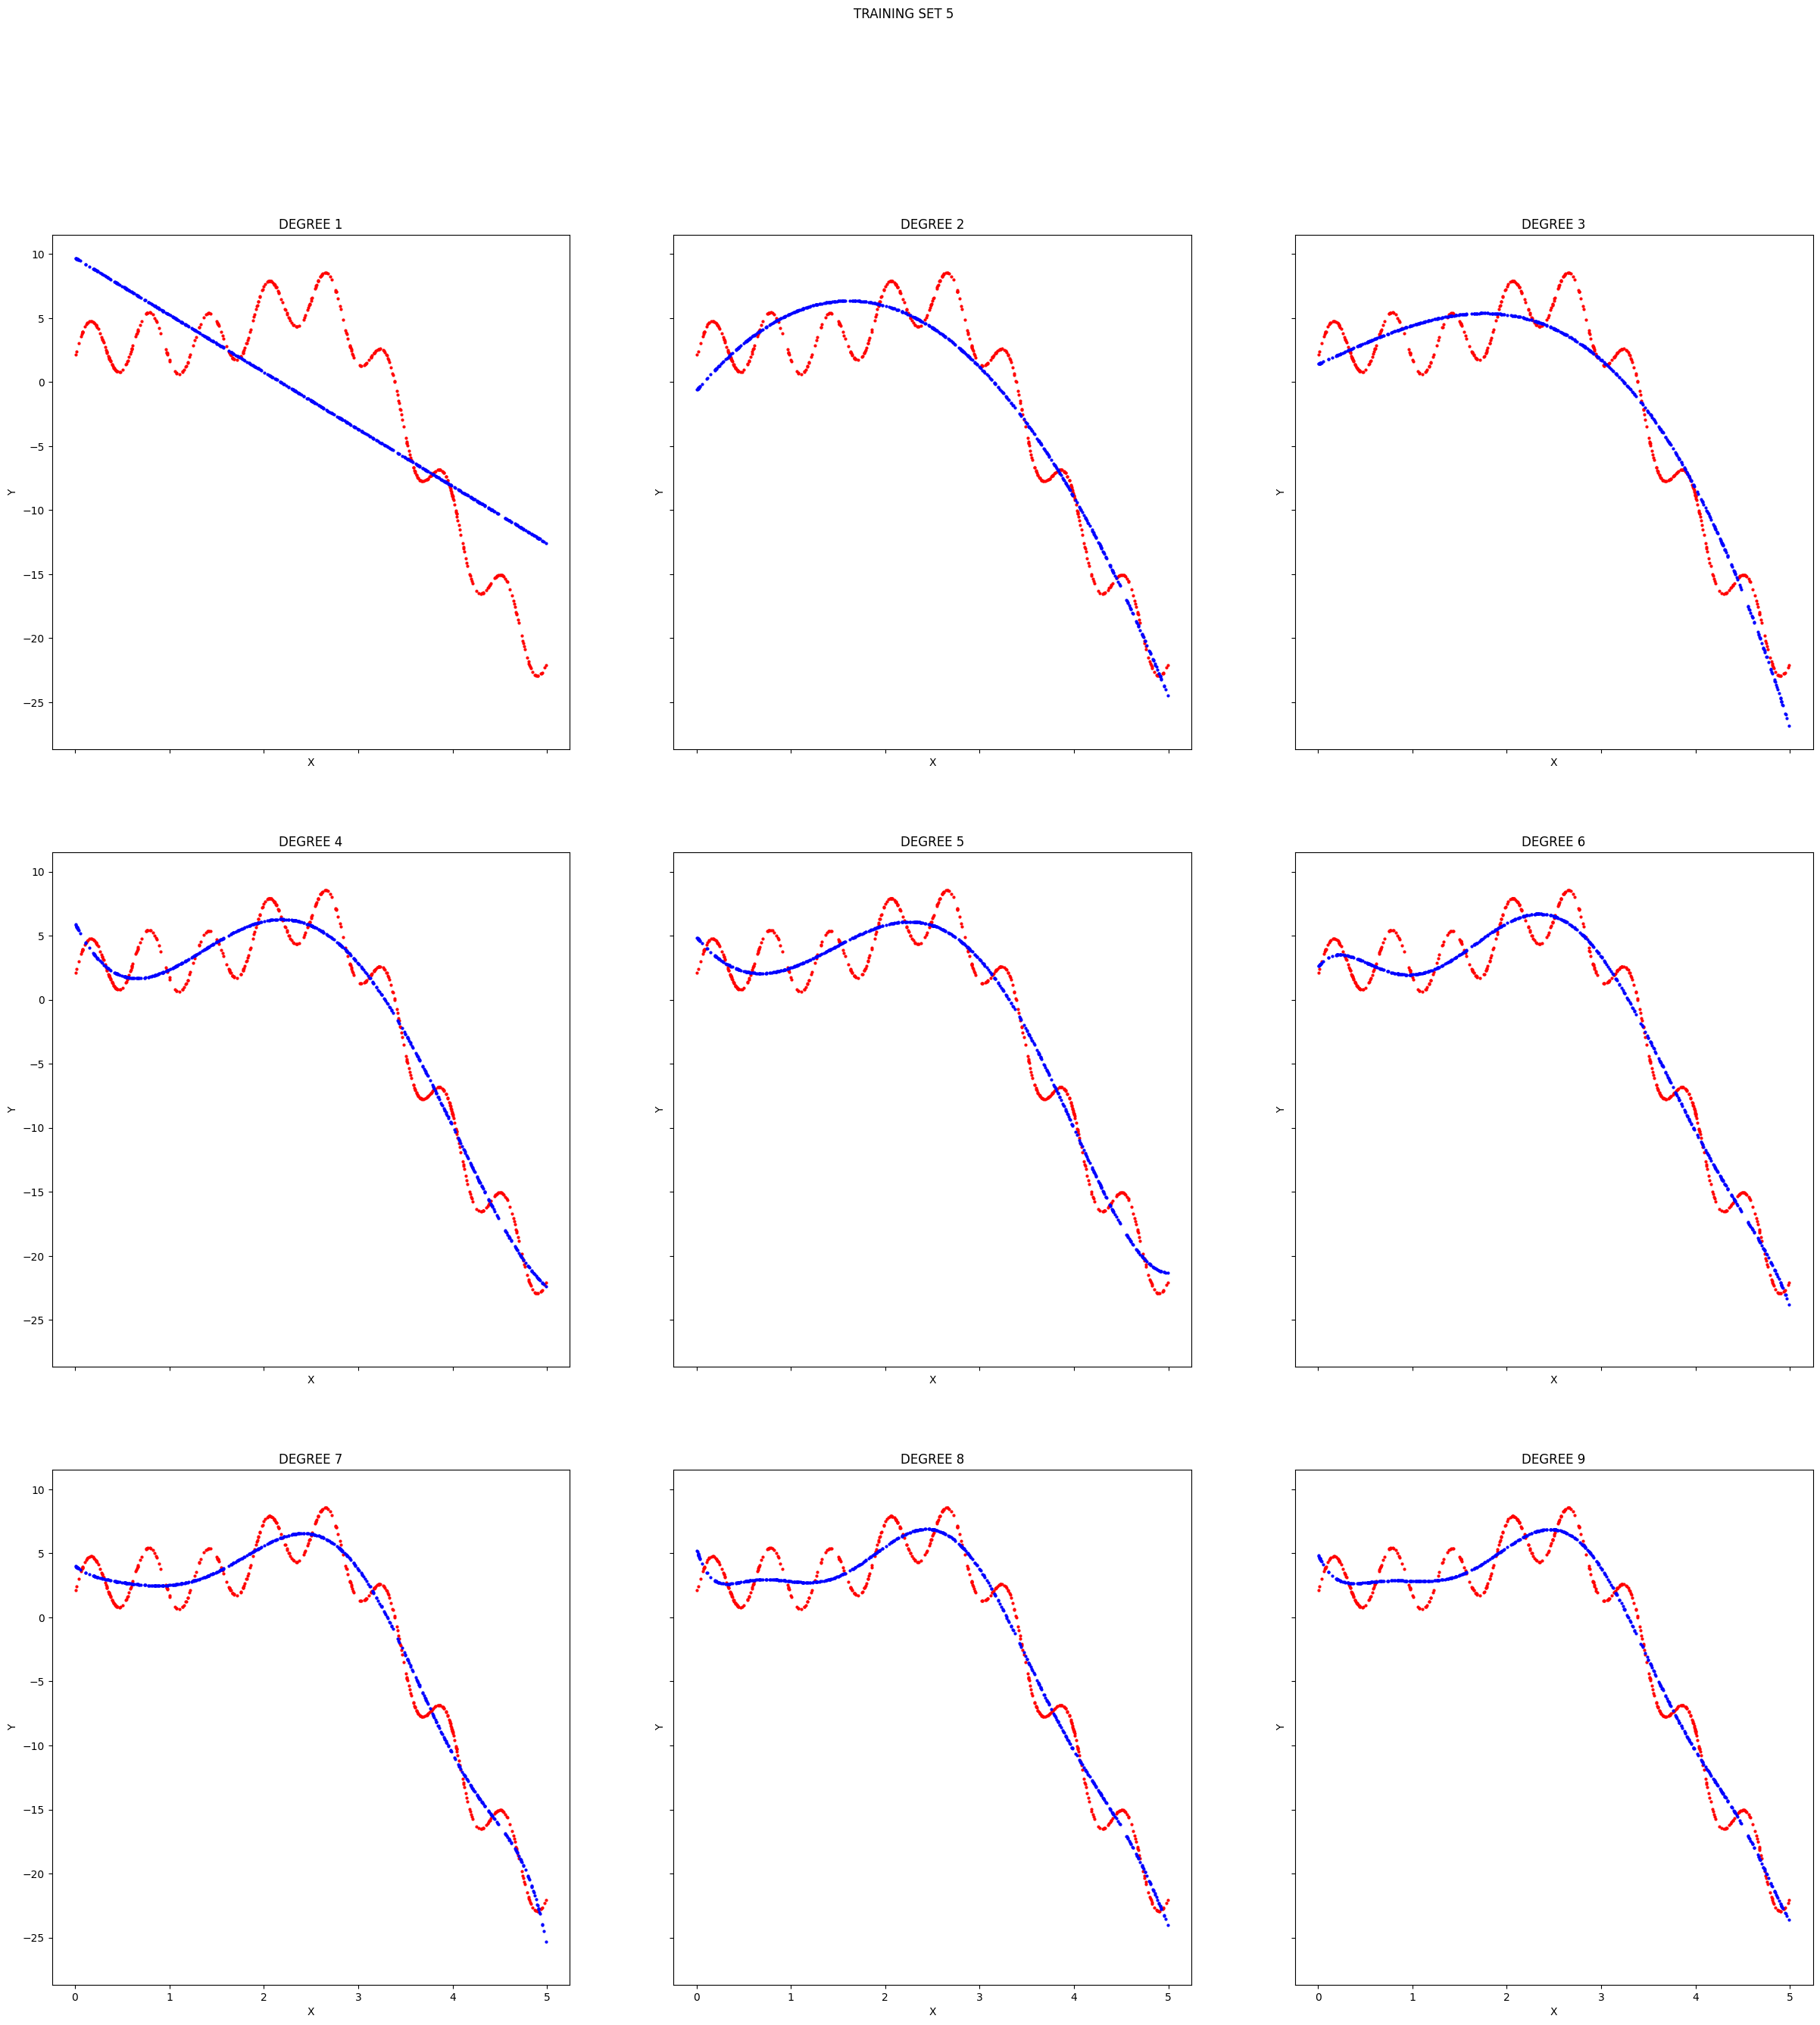

<Figure size 640x480 with 0 Axes>

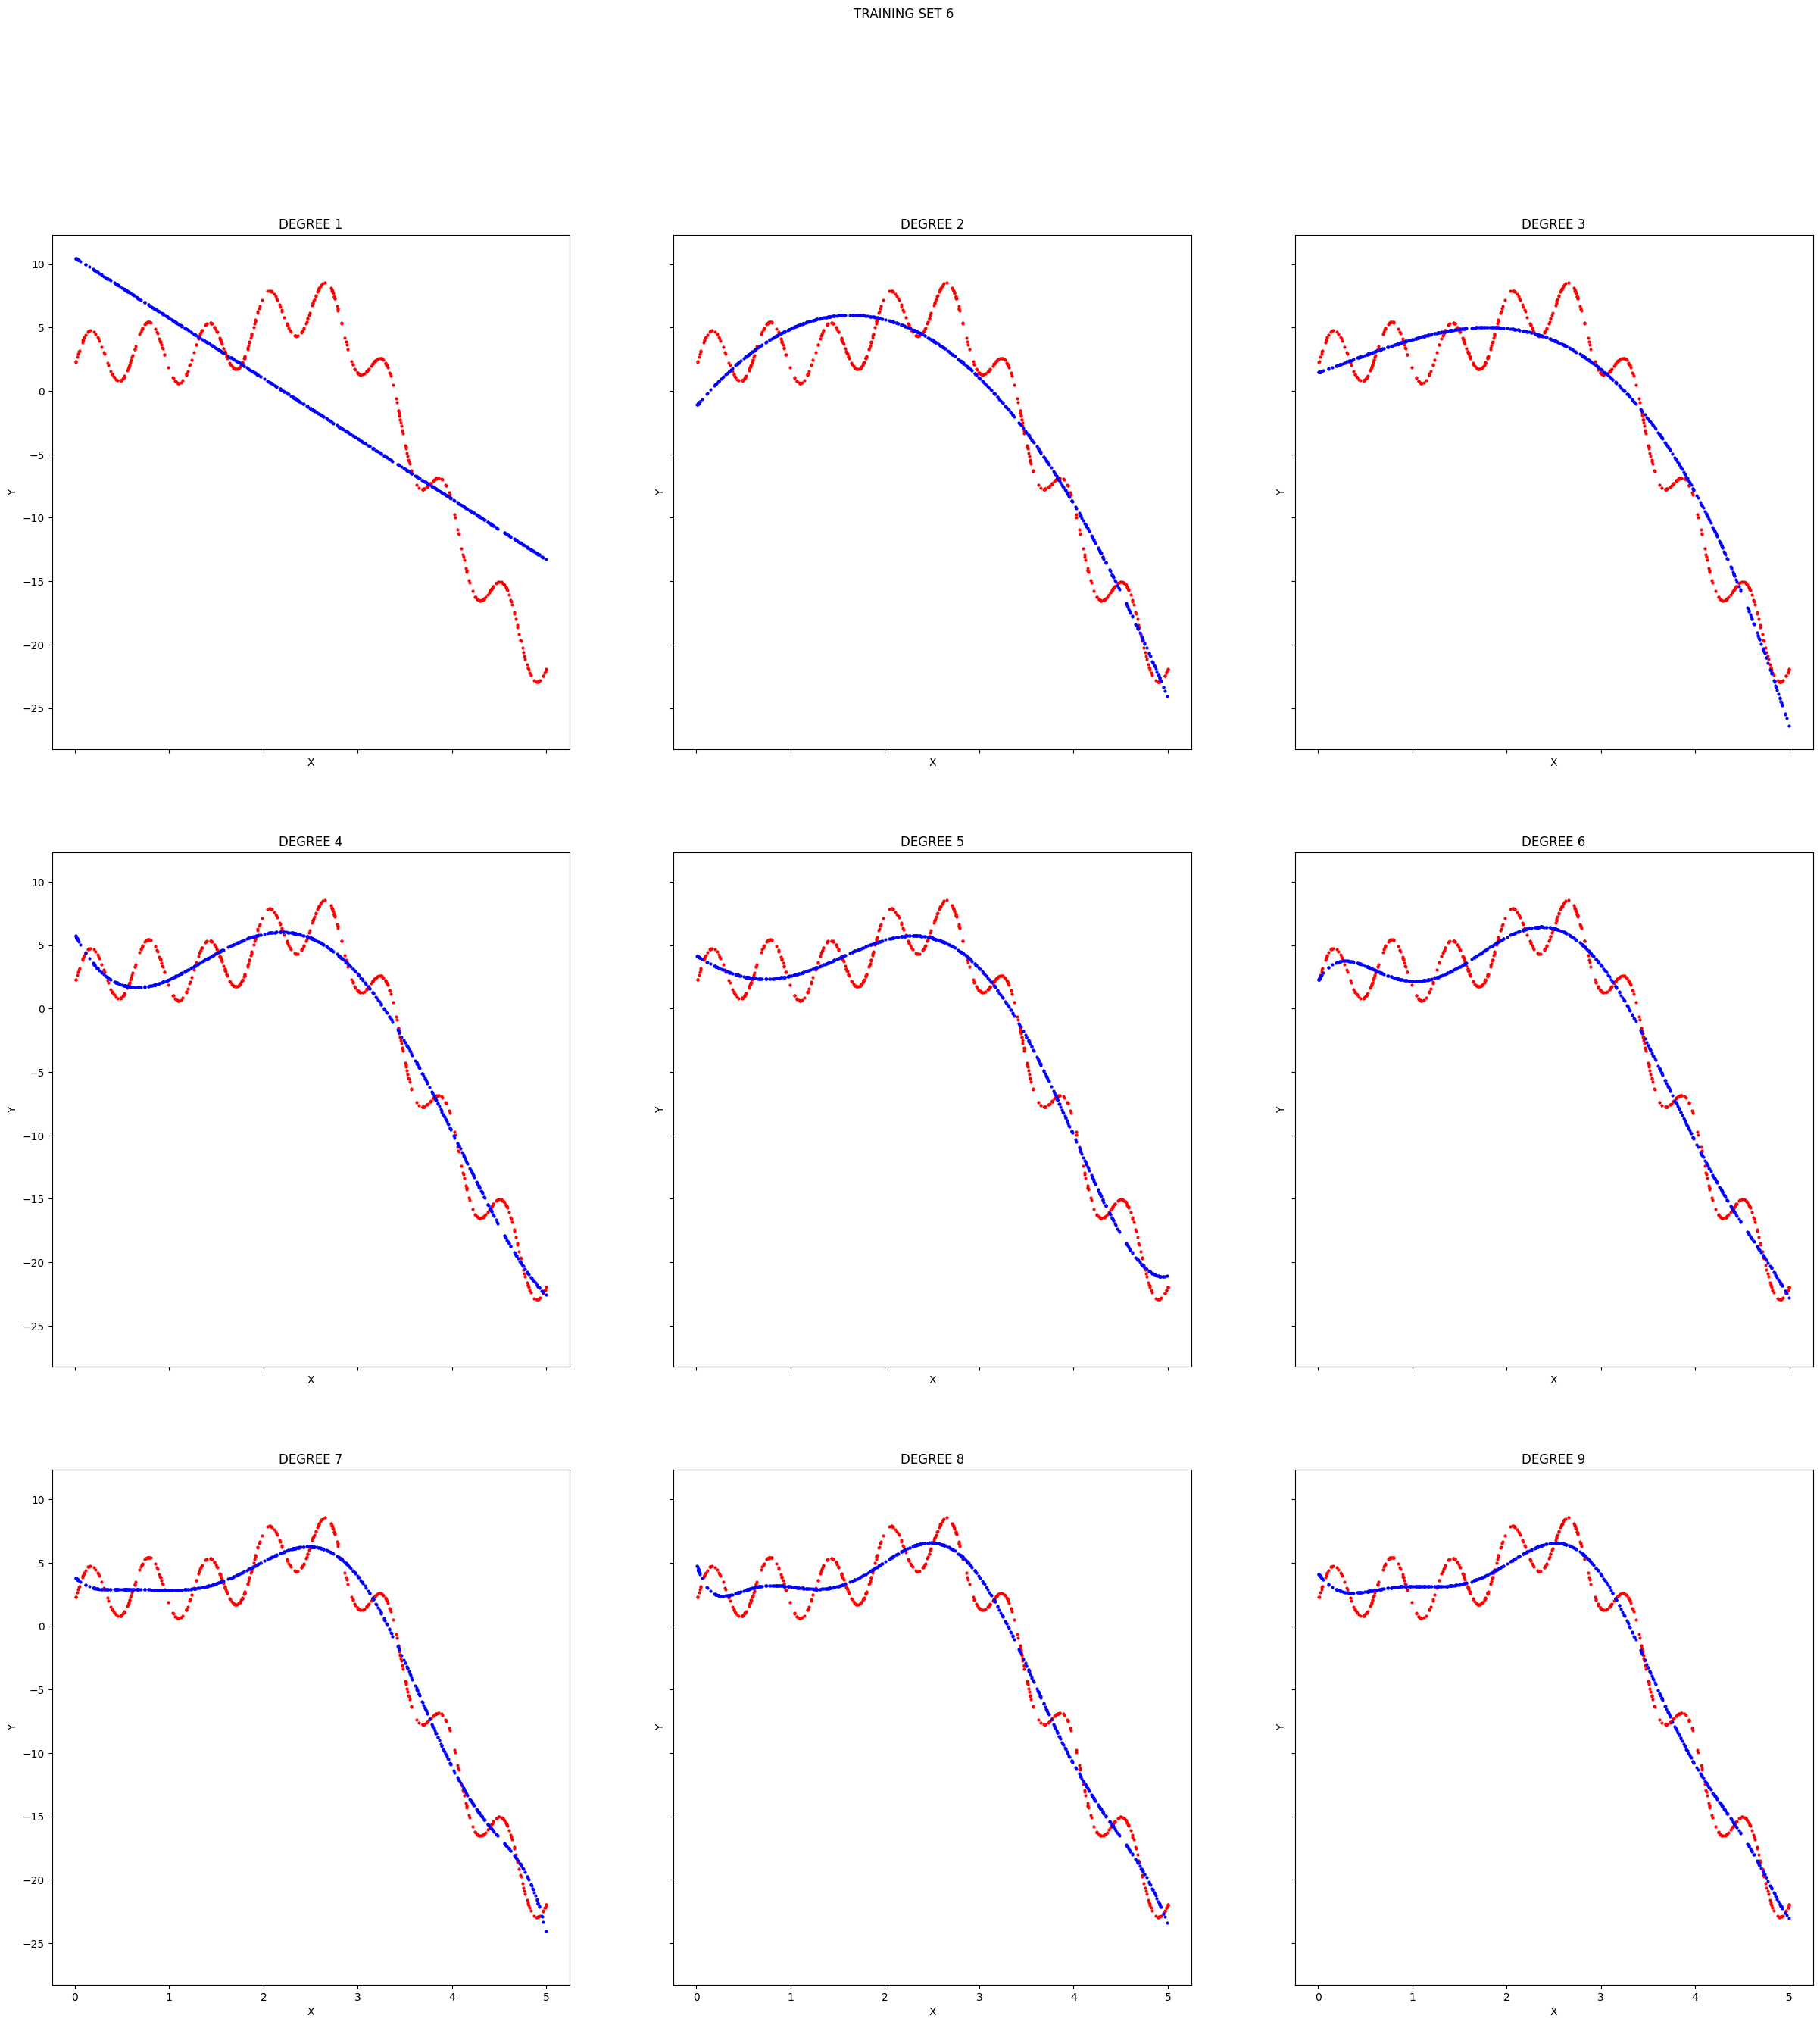

<Figure size 640x480 with 0 Axes>

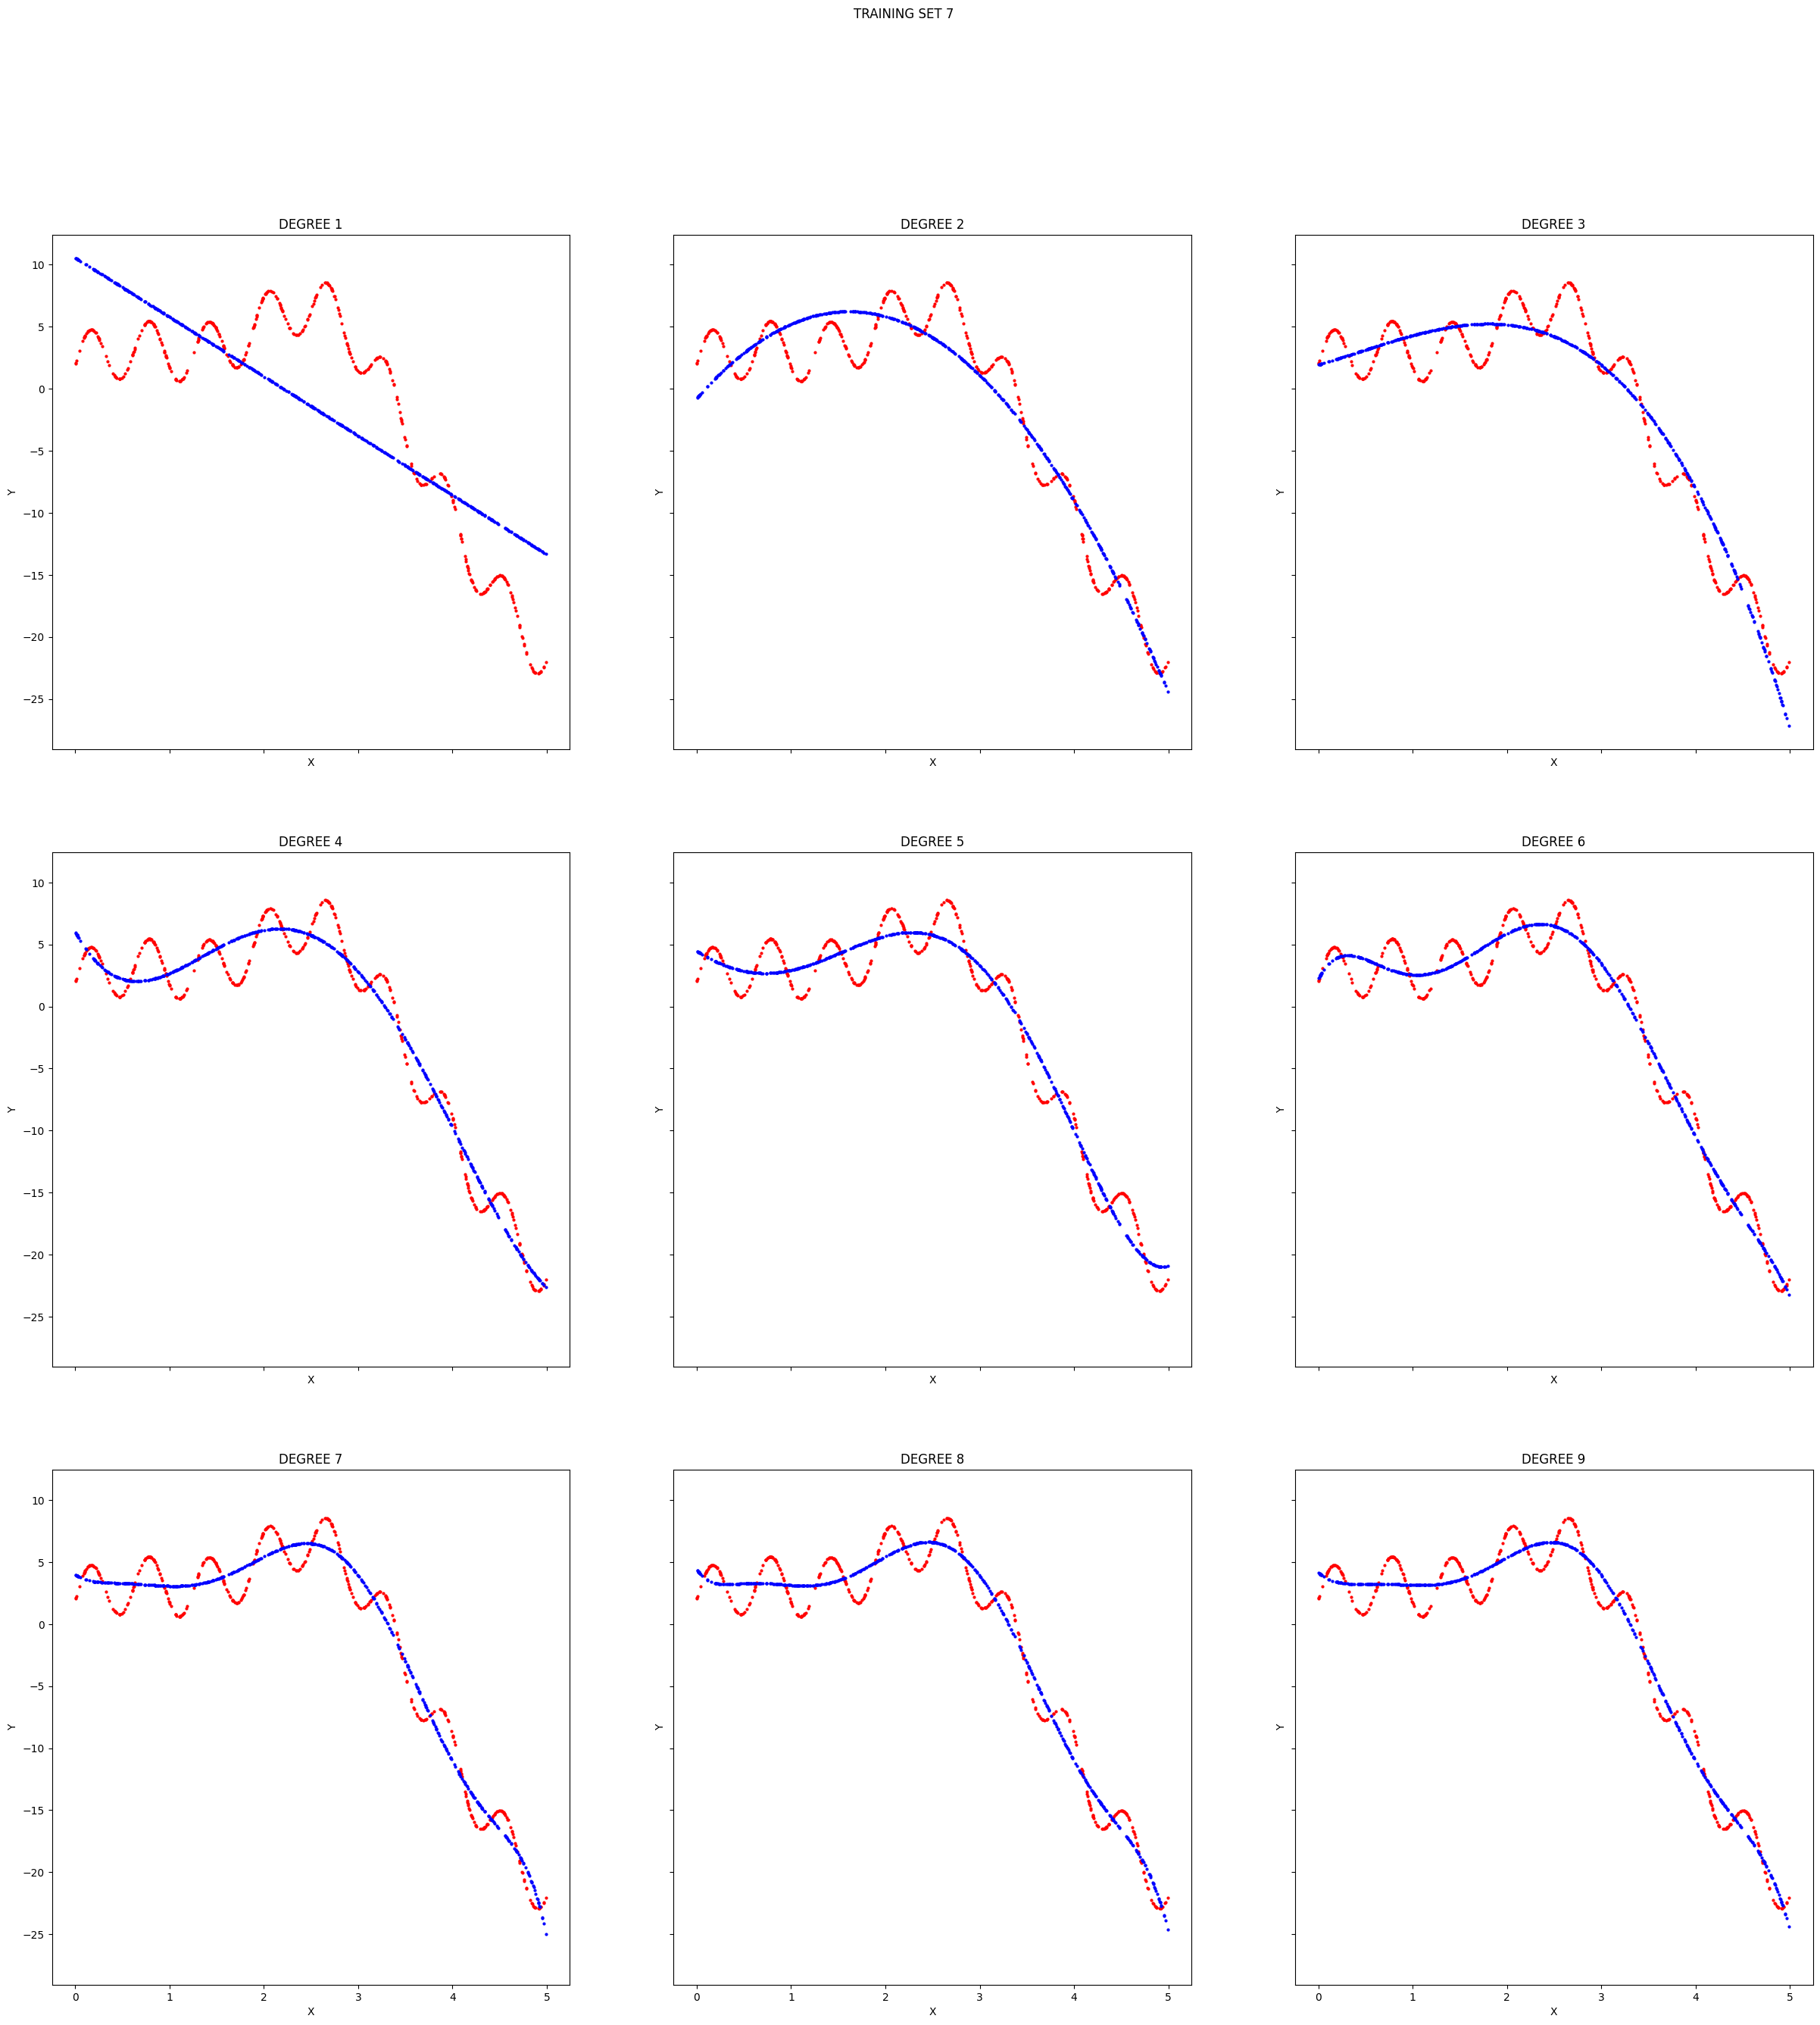

<Figure size 640x480 with 0 Axes>

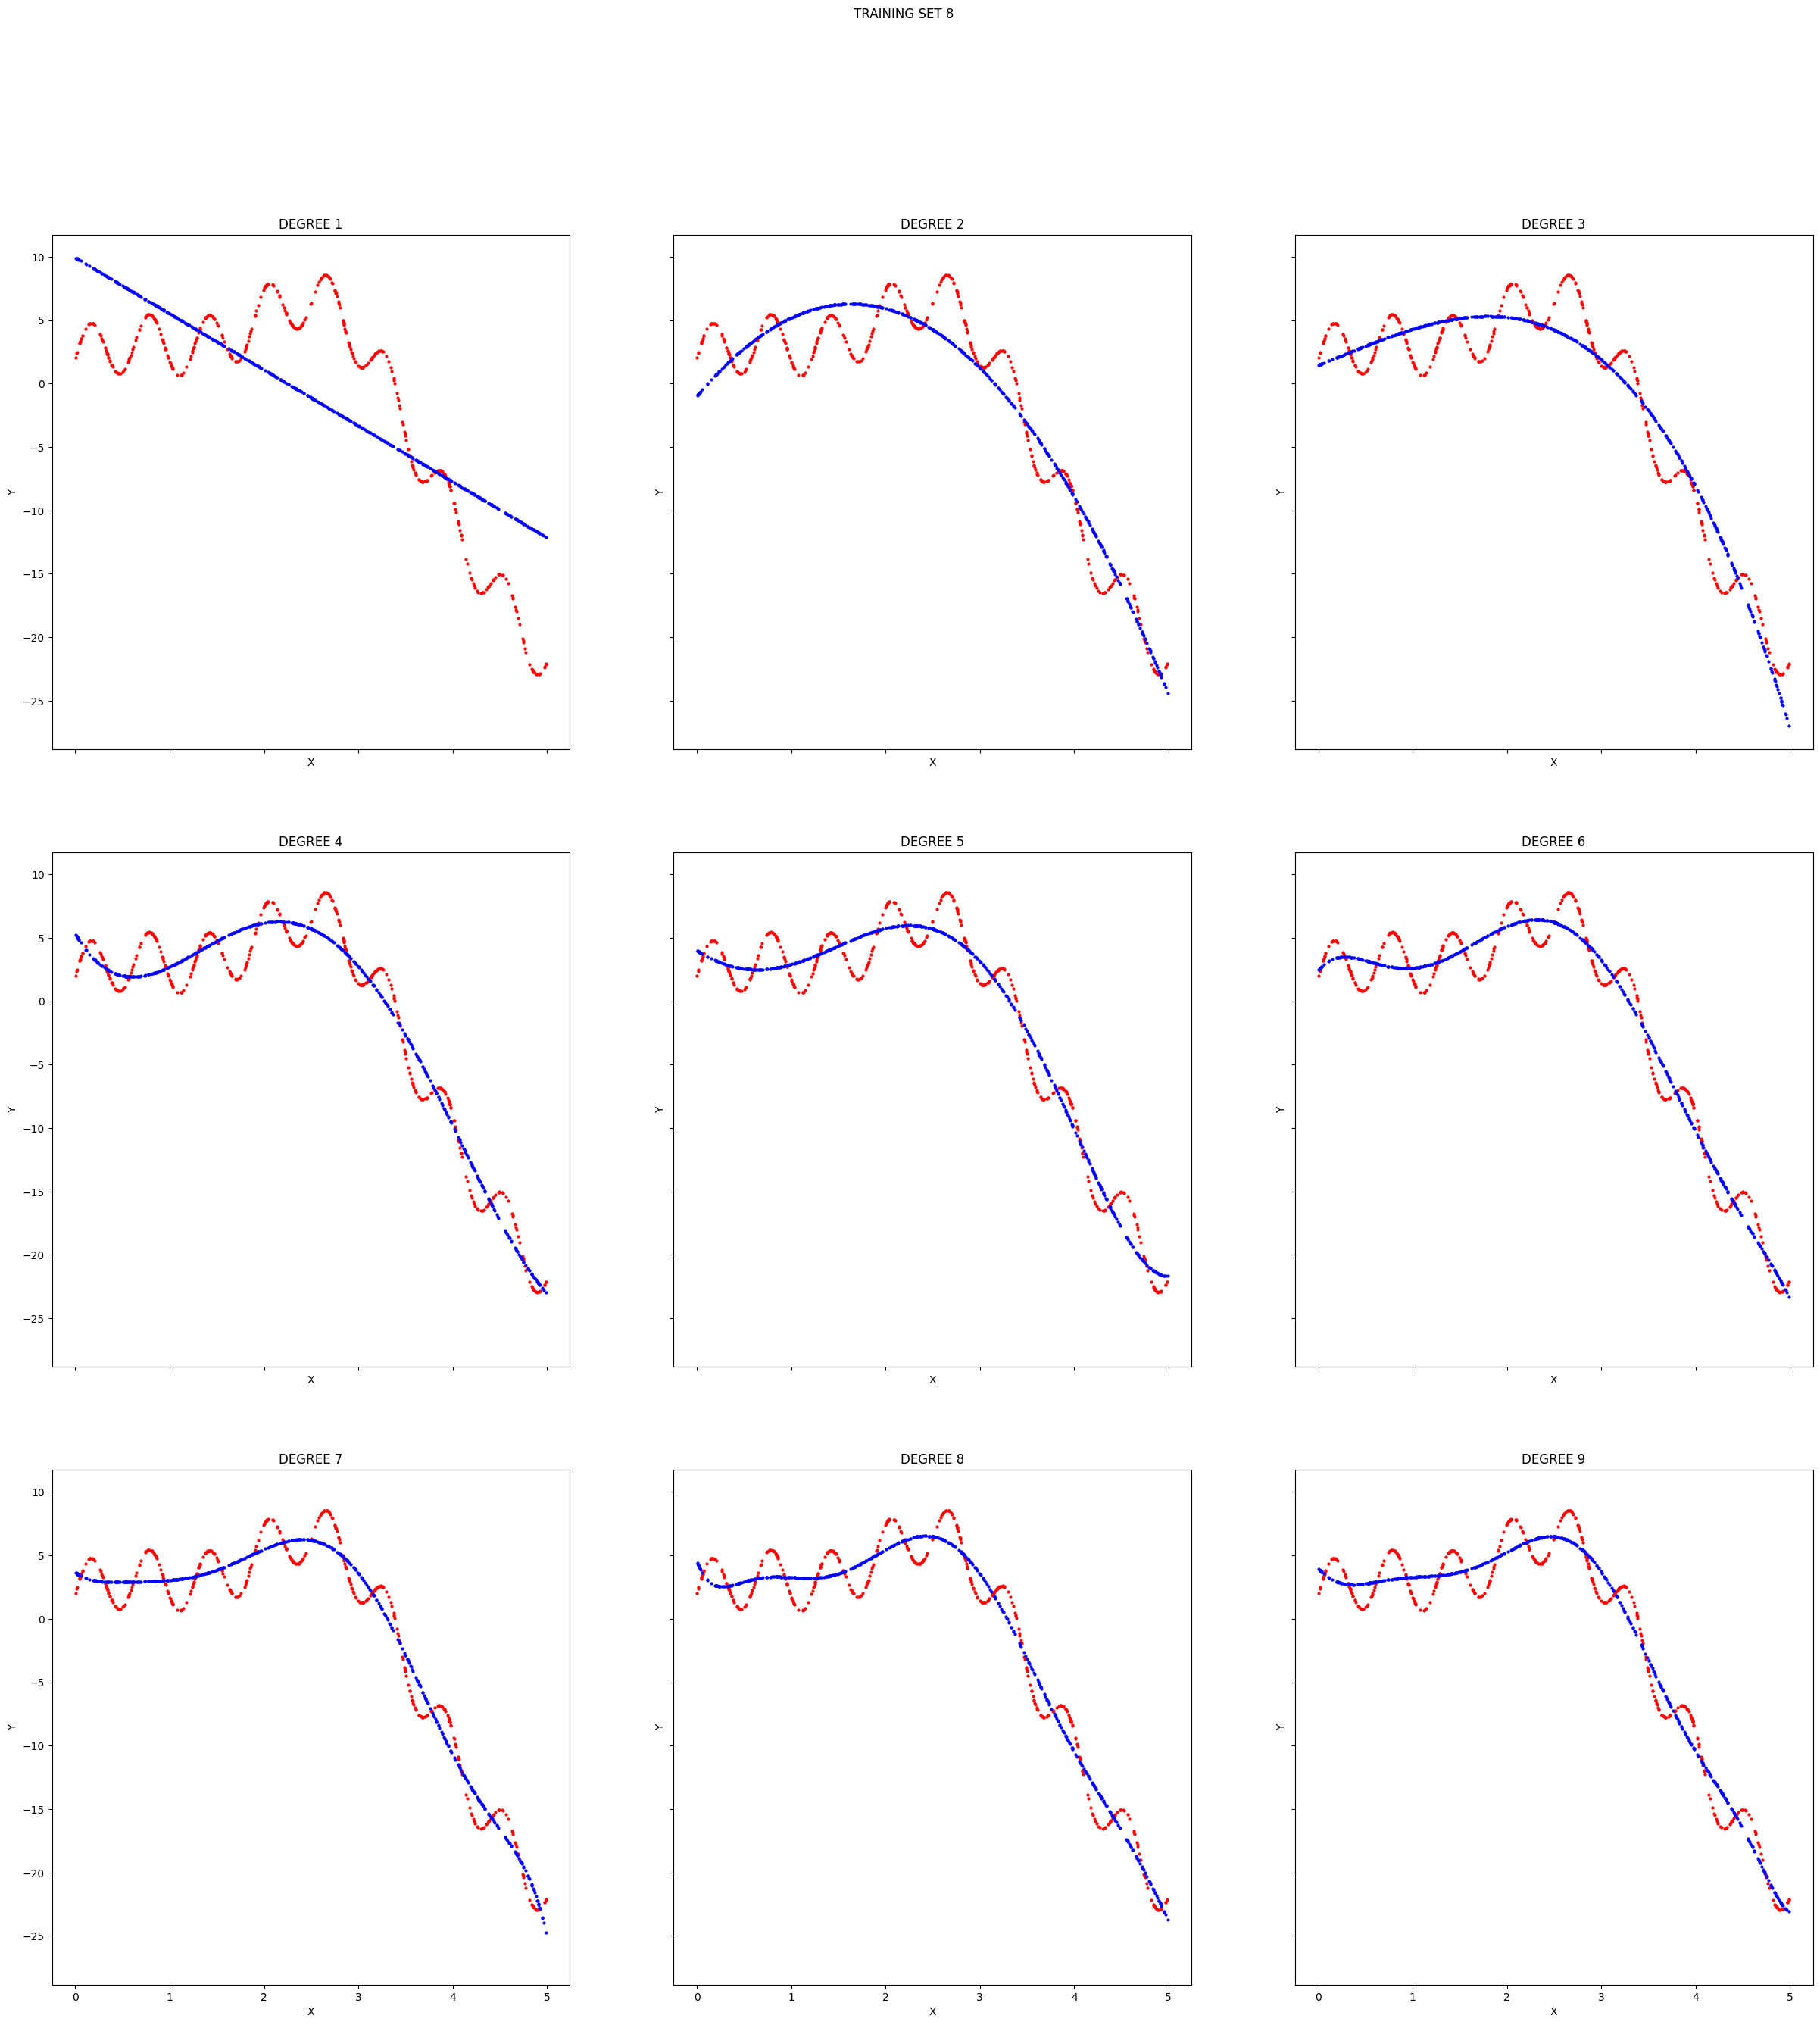

<Figure size 640x480 with 0 Axes>

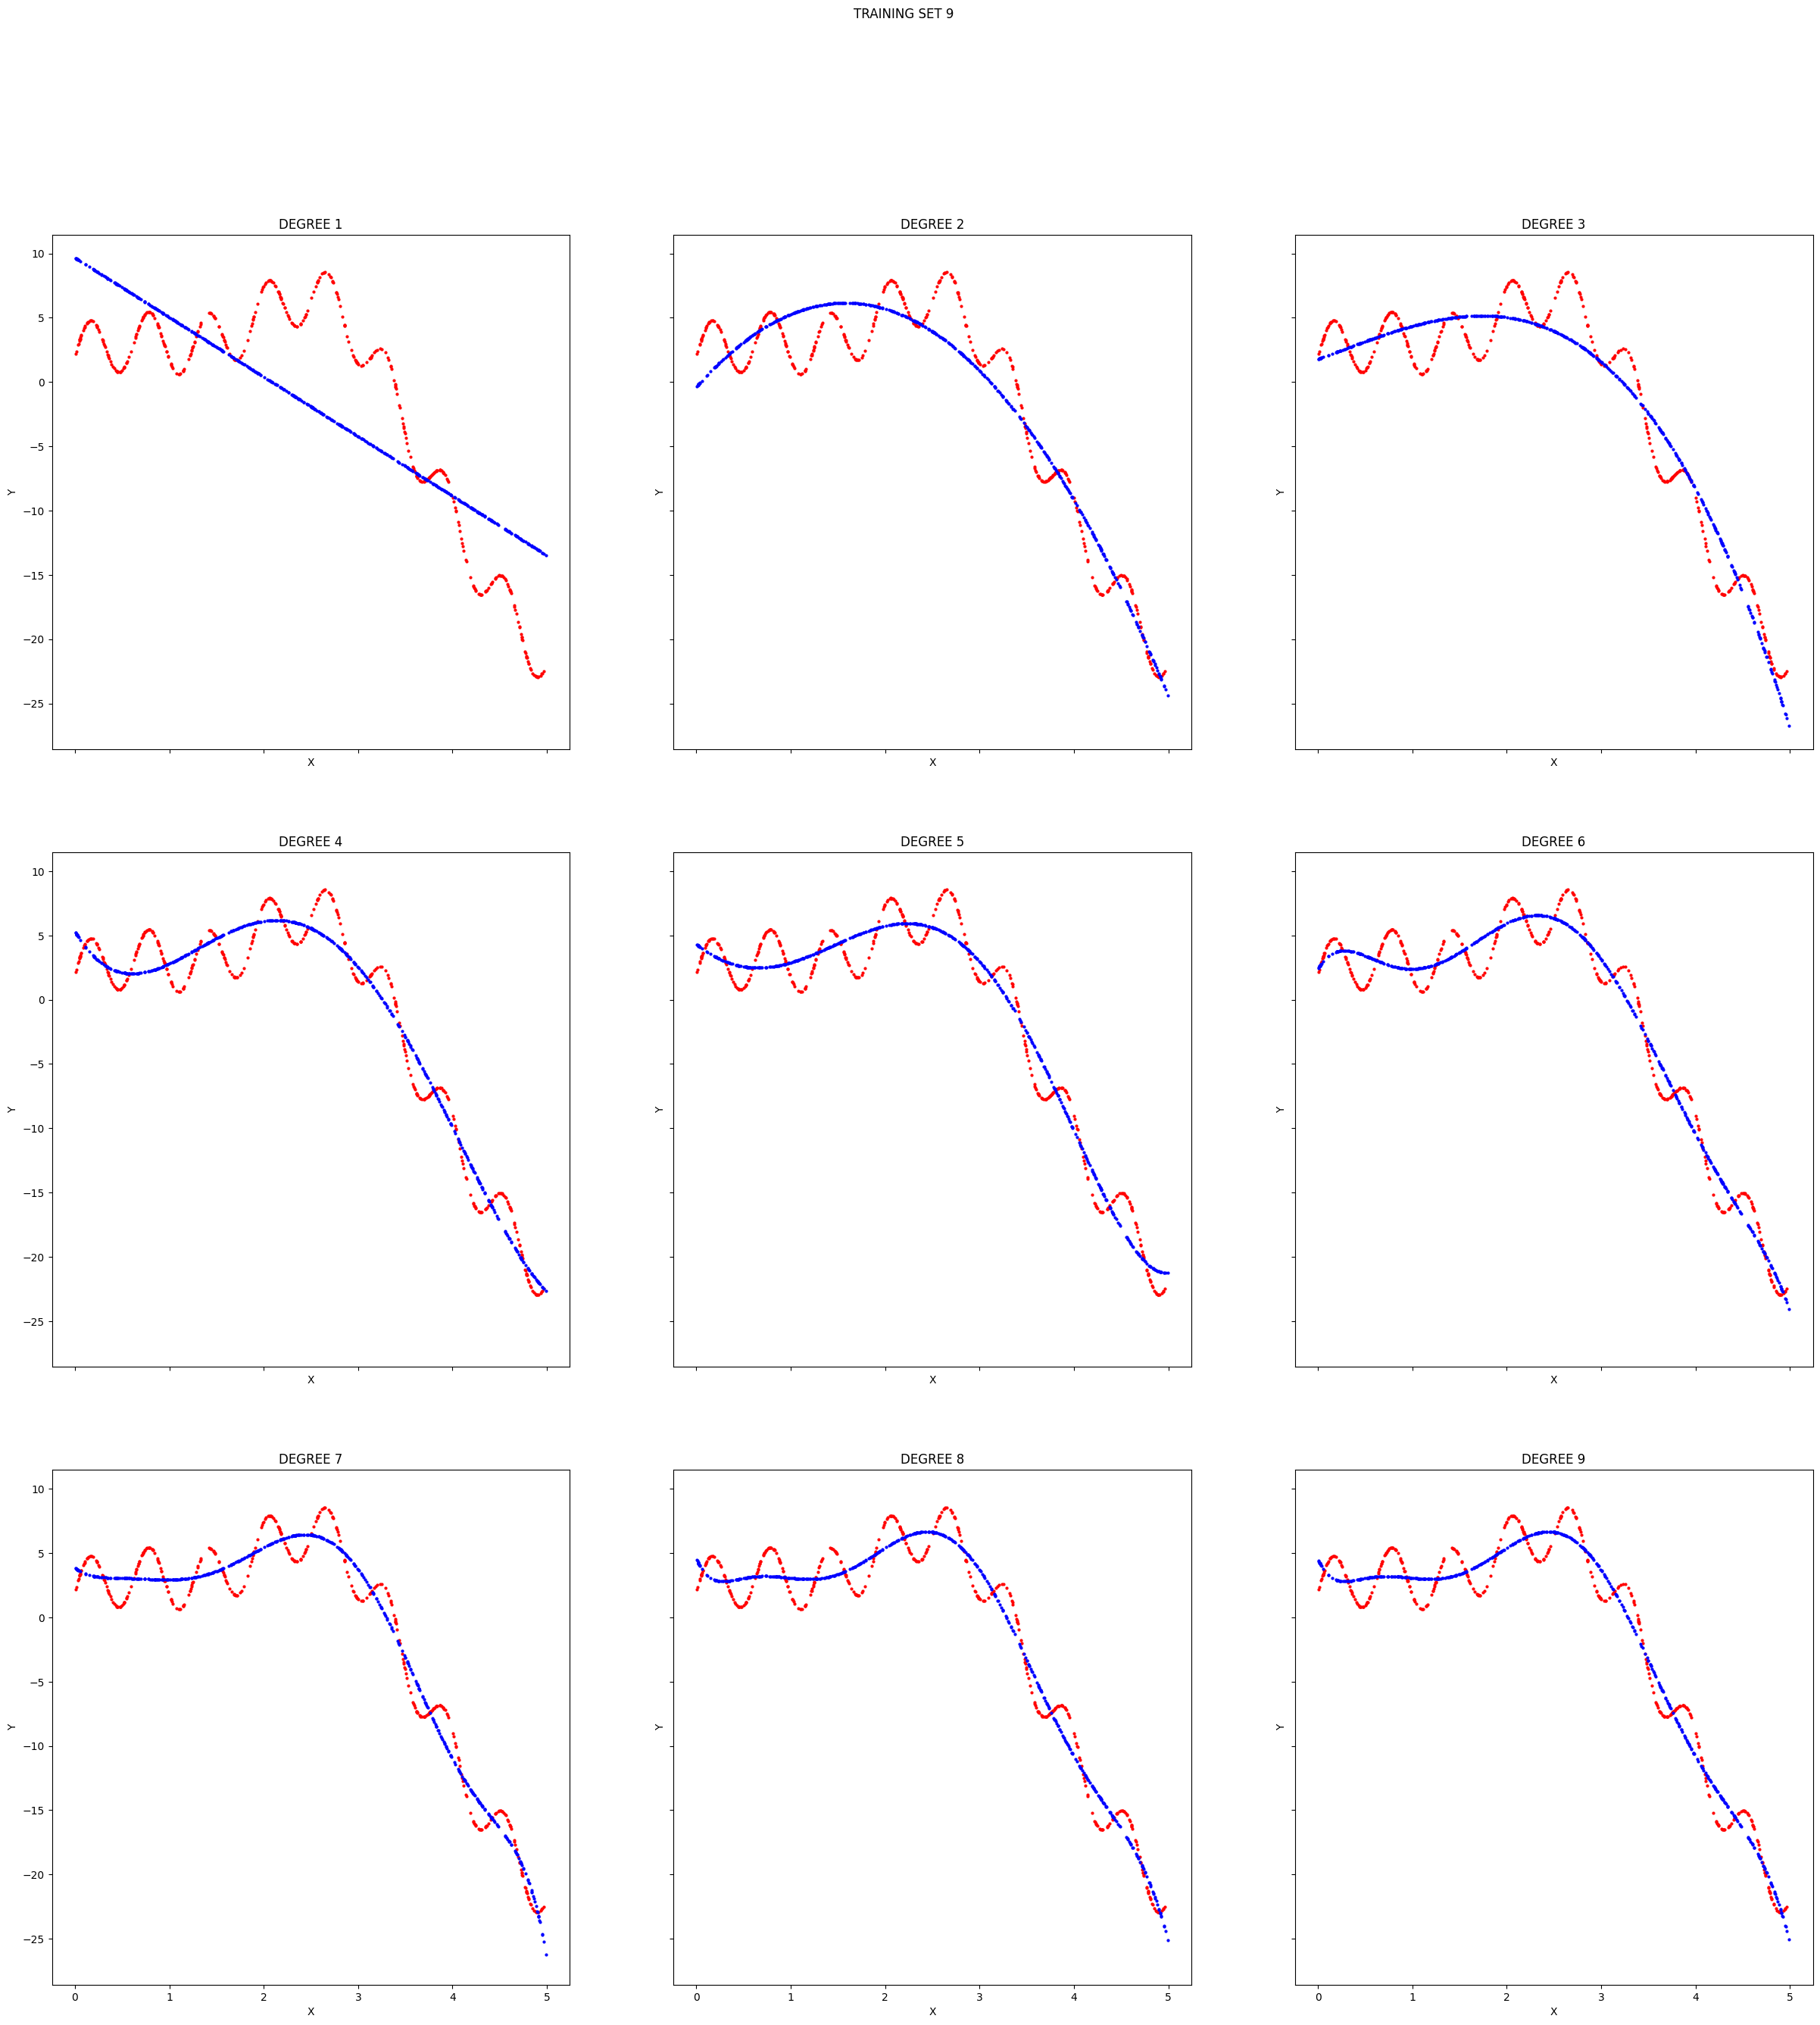

<Figure size 640x480 with 0 Axes>

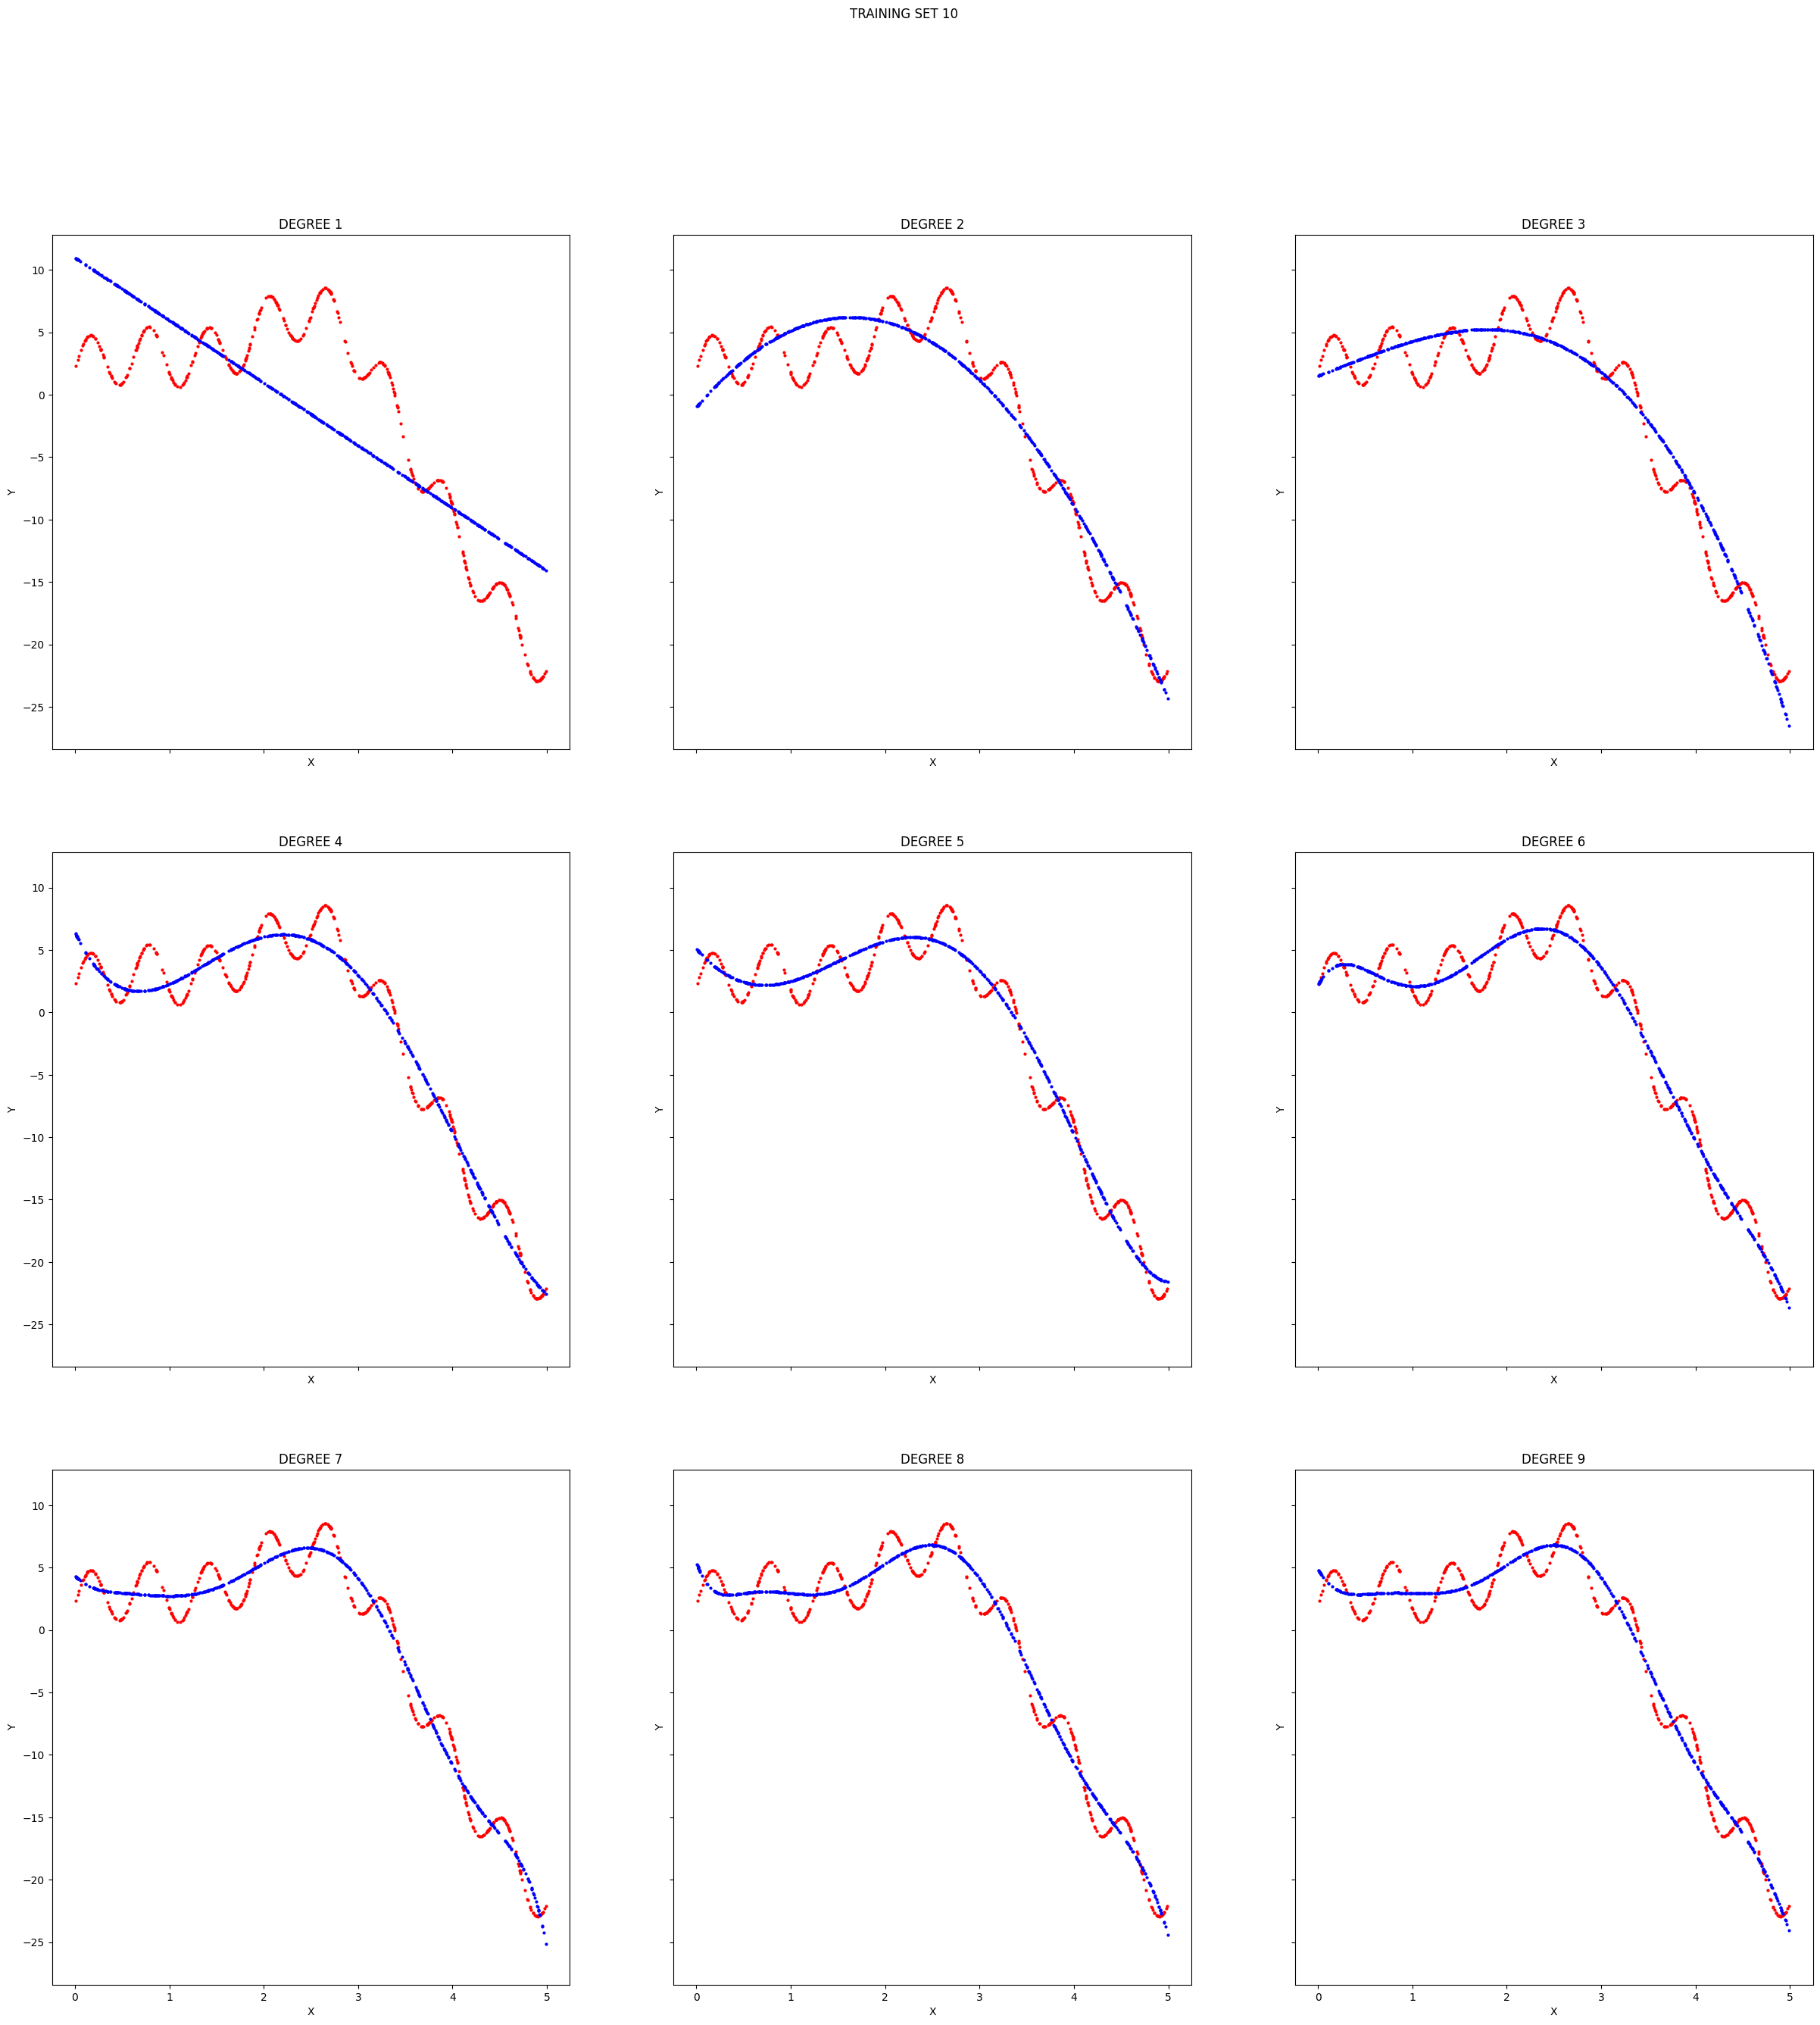

In [16]:
y_predicted = []
for i in range(10):
    f = plt.figure()
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(30, 30))
    f.suptitle(f'TRAINING SET {i+1}')
    # Here I added .squeeze() for consistency with other cells. The value returned from X_train_data_sets[i] will have the
    # shape (450, 1) so we need to need to squeeze it to (450, )
    x = X_train_data_sets[i].squeeze() # [:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i].squeeze()
    temp = []
    for degree in range(0, 9):
        axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
        #TODO: Create polynomial features of current degree + 1 using PolynomialFeatures function
        poly_features = PolynomialFeatures(degree=degree+1)
        #TODO: Fit the polynomial features on the current training set using the fit_transform method
        X_train_poly = poly_features.fit_transform(X=x[:, np.newaxis])
        #TODO: Create a plolynomial regression model using LinearRegression class
        poly_model = LinearRegression()
        #TODO: Fit the model to the current training set
        poly_model.fit(X_train_poly, y[:, np.newaxis])
        #TODO: Predict the value of y for the testing set using the predict method Hint: fit the polynomial features on the xTest[:, numpy.newaxis] then predict the value of y for the polynomial features
        X_test_poly = poly_features.transform(xTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        #TODO: append the current prediction to the temp list
        temp.append(y_test_predict)
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:, np.newaxis], y_test_predict, 'b.', markersize=4)
        # plt.title("DEGREE "+str(degree+1)) # <---- This is not working as expected so I replaced it with the next line.
        axes[int(degree/3)][int(degree % 3)].set_title(f'DEGREE {degree+1}')
        # plt.xlabel("X")
        # plt.ylabel("Y") # See the next two lines.
        axes[int(degree/3)][int(degree % 3)].set_xlabel("X")
        axes[int(degree/3)][int(degree % 3)].set_ylabel("Y")
    #TODO: append the prediction of all 9 models to the y_predicted list Hint: the prediction of all models are saved in temp
    y_predicted.append(temp)
    plt.show()


## STEP 4: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

## Function for calculating the bias and the variance

 we calculate the bias and variance as follows:
- For a given degree we append the values of the y_predicted for each dataset to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the prediction of the model for each training set from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list

In [17]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = np.asarray(y_predicted_part)
    #TODO: calculate the bias using np.mean and np.abs
    bias=np.mean(np.abs(y_predicted_part - xTest),axis=0)
    #TODO: calculate the variance using np.var
    variance=np.var(np.abs(y_predicted_part - np.mean(y_predicted_part)),axis=0) 
    return(np.mean(bias), np.mean(variance))


Then we call the function as follows, in order to populate the lists, bias and variance.

In [18]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)


Bias: [6.688369438654382, 6.428585419997007, 6.009337901596908, 6.402313728207137, 6.328624237594765, 6.440588043985434, 6.440848902803924, 6.47193113043421, 6.473737492849539]
Variance: [0.20793246541283342, 0.04039042380165172, 0.027311837183896553, 0.028412153002295198, 0.027749204195425845, 0.030423566408934545, 0.038490211143538205, 0.04271941215063818, 0.05187974416163341]


The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

## Tabulate the values

We use the pandas library in order to display the required items in a table format

In [19]:
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)


   DEGREE      BIAS     BIAS^2  VARIANCE        MSE
0       1  6.688369  44.734286  0.207932  44.942218
1       2  6.428585  41.326711  0.040390  41.367101
2       3  6.009338  36.112142  0.027312  36.139454
3       4  6.402314  40.989621  0.028412  41.018033
4       5  6.328624  40.051485  0.027749  40.079234
5       6  6.440588  41.481174  0.030424  41.511598
6       7  6.440849  41.484535  0.038490  41.523025
7       8  6.471931  41.885893  0.042719  41.928612
8       9  6.473737  41.909277  0.051880  41.961157


## Plot the bias-variance tradeoff

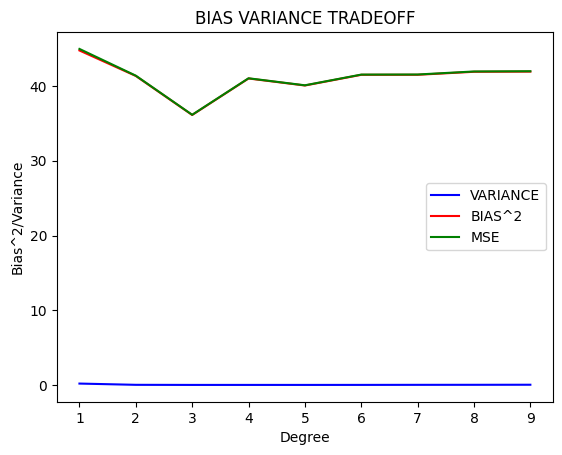

In [20]:
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()


# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 640x480 with 0 Axes>

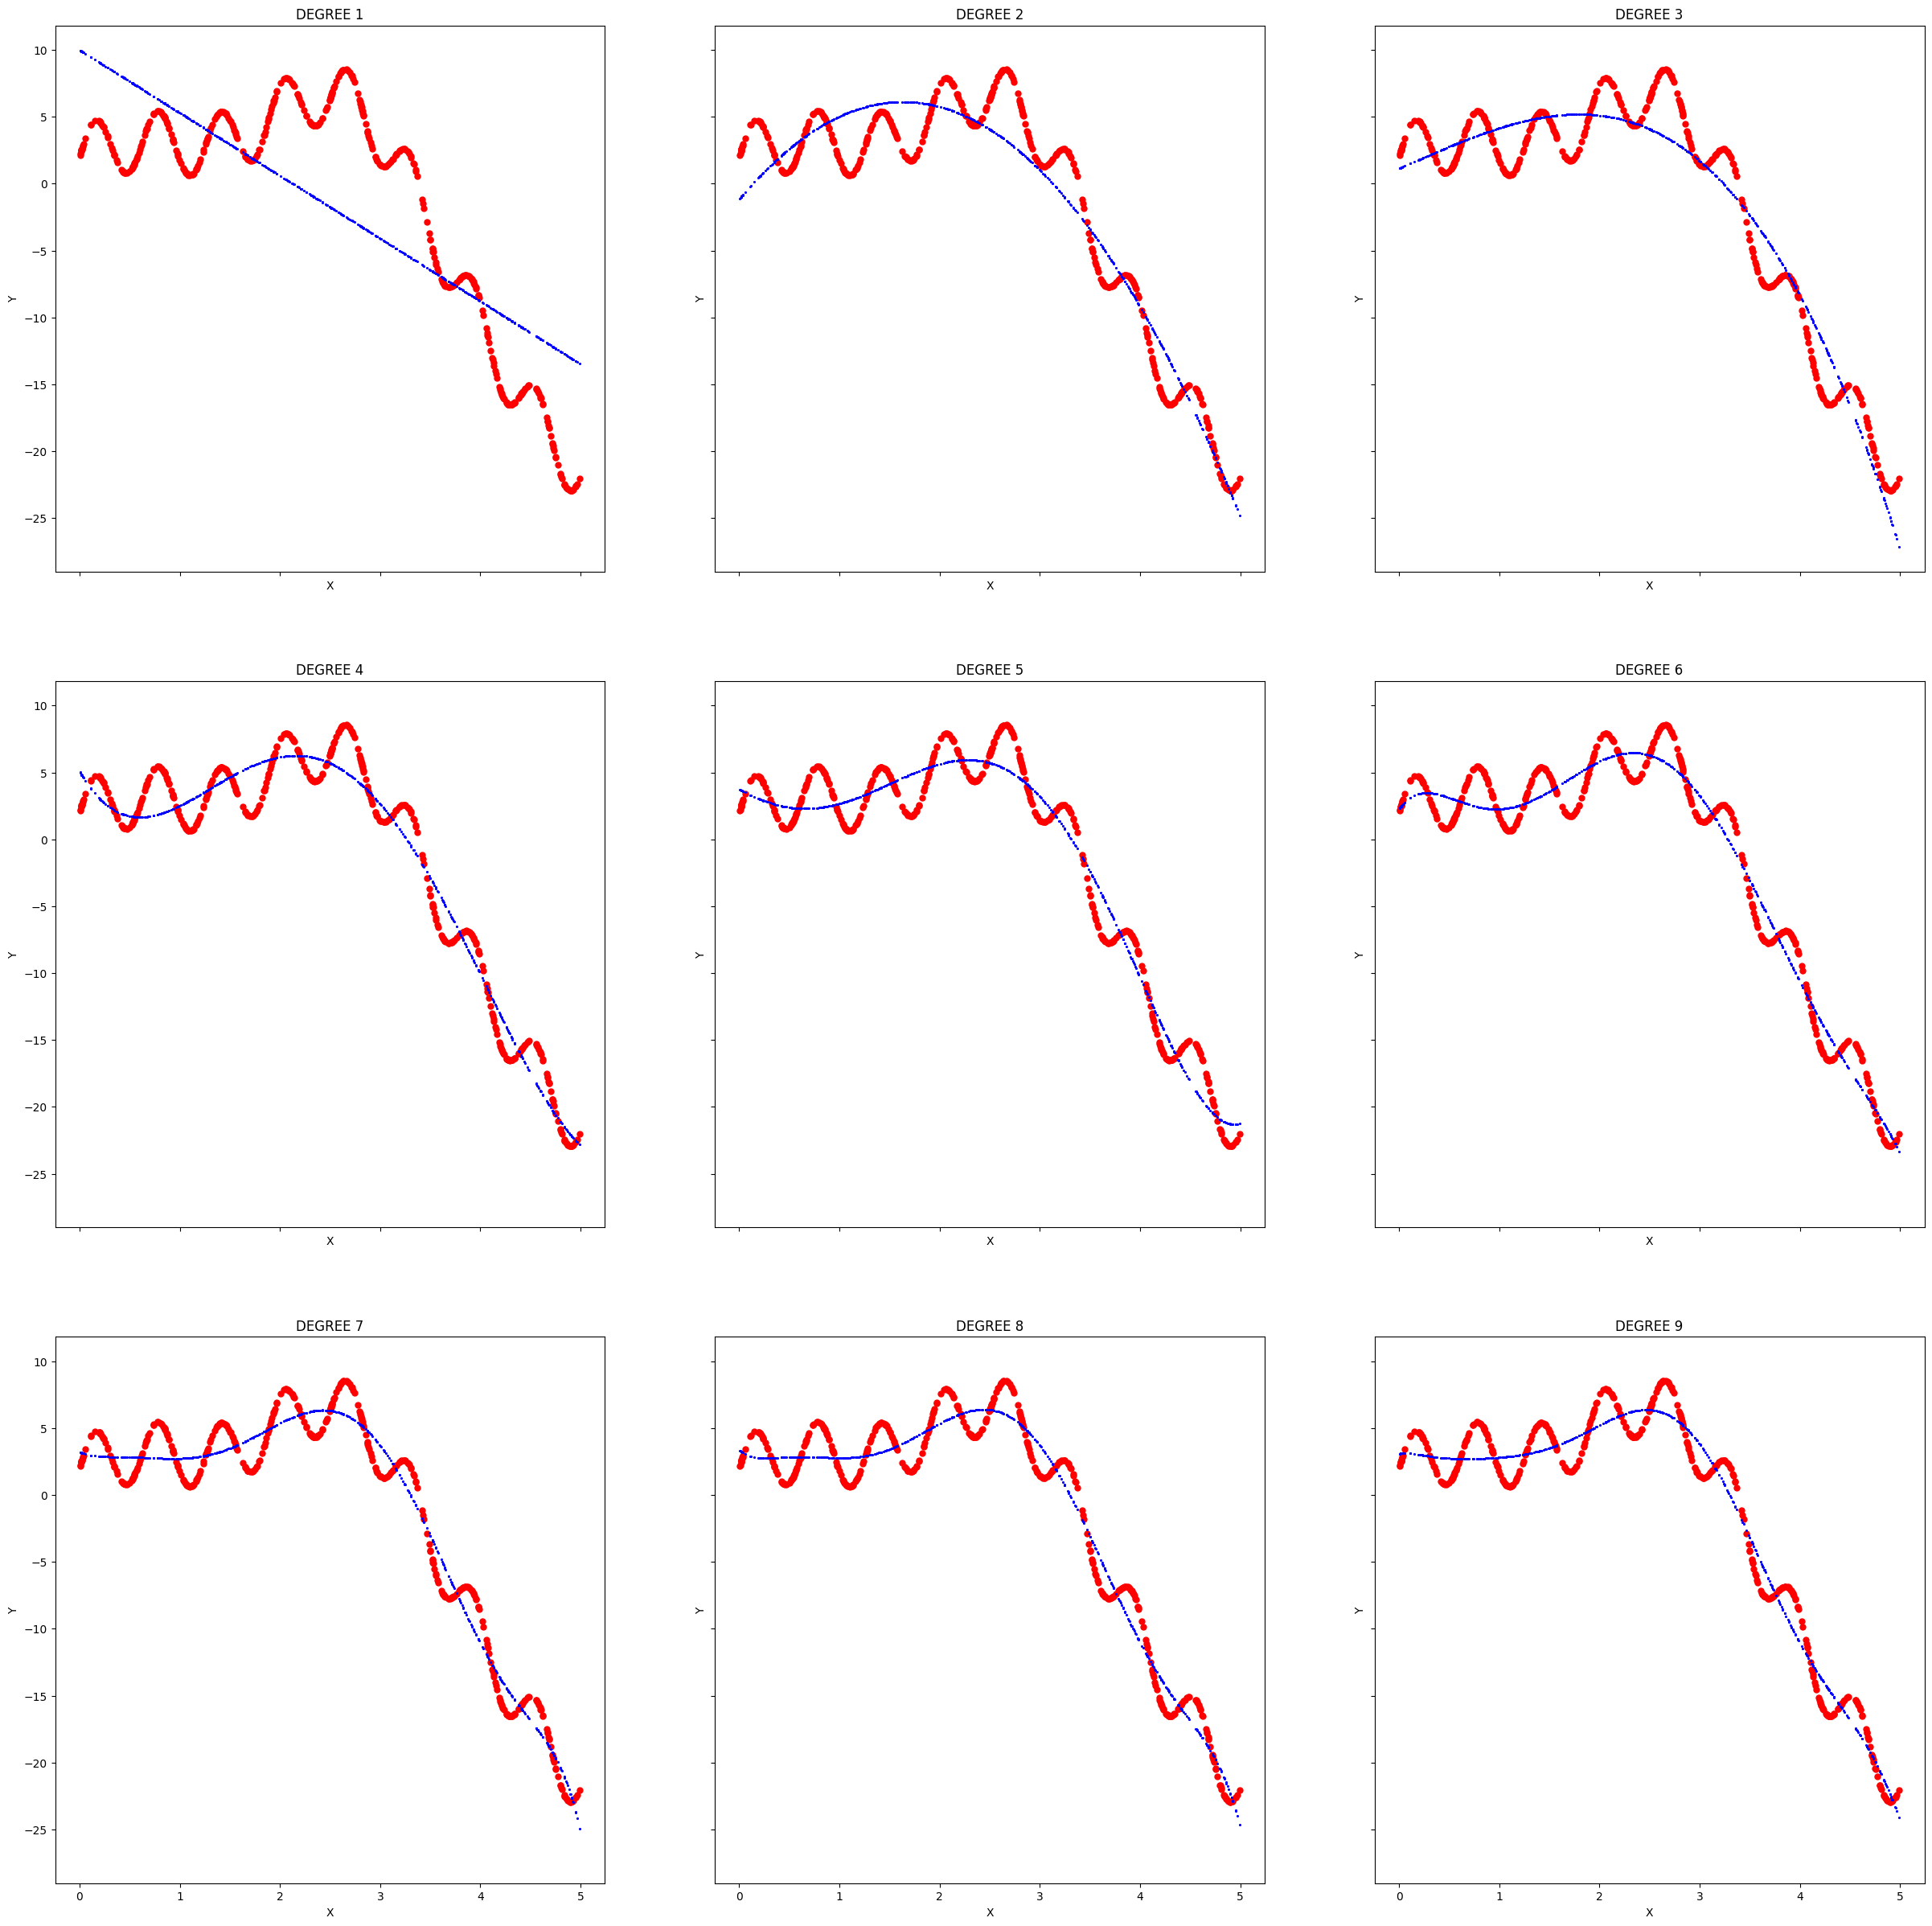

In [21]:
f = plt.figure()
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=True, sharey = True,figsize=(30,30))
for degree in range(0,9):
    xtemp=np.concatenate([xTest for i in range(10)])
    y_predicted_part=[]
    for i in range(10):
        #TODO Append the prediction of the model with the current degree for each dataset to y_predicted_part
        poly_features = PolynomialFeatures(degree=degree+1)
        X_test_poly = poly_features.fit_transform(X=xTest[:, np.newaxis])
        poly_model = LinearRegression()
        poly_model.fit(X_test_poly, yTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        y_predicted_part.append(y_test_predict)
    ytemp=np.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree)%3)].plot(xTest, yTest, 'r.',markersize=10)
    axes[int((degree)/3)][int((degree)%3)].plot(xtemp, ytemp,'b.',markersize=1)
    axes[int(degree/3)][int(degree % 3)].set_title(f'DEGREE {degree+1}') # I added this line.
    axes[int(degree/3)][int(degree % 3)].set_xlabel("X") # I added this line.
    axes[int(degree/3)][int(degree % 3)].set_ylabel("Y") # I added this line.
# plt.xlabel("X")
# plt.ylabel("Y")
plt.show()


**TASK**:  
- You have been provided with a training data and a testing data. You need to fit the given data to polynomials of degree 1 to 9(both inclusive). 
- Specifically, you have been given 20 subsets of training data containing 400 samples each. For each polynomial, create 20 models trained on the 20 different subsets and find the variance of the predictions on the testing data. Also, find the bias of your trained models on the testing data. Finally plot the bias-variance trade-Off graph. 
- Write your observations in the report with respect to underfitting, overfitting and also comment on the type of data just by looking at the bias-variance plot.

#### Usefull imports

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy
import random
import pickle
import pandas
import matplotlib.pyplot as plt


# STEP 1: LOADING THE DATASET AND VISUALISING IT

Here we load the data_set from multiple files stored in the same directory as the current notebook.

In [23]:
# Get x train dataset
f = open('X_train.pkl', 'rb')
X_train_data_sets = pickle.load(f)
f.close()
# Get y train dataset
f = open('Y_train.pkl', 'rb')
Y_train_data_sets = pickle.load(f)
f.close()
# Get x test dataset
f = open('X_test.pkl', 'rb')
xTest = pickle.load(f)
f.close()
# Get y test dataset
f = open('Fx_test.pkl', 'rb')
yTest = pickle.load(f)
f.close()


In [24]:
if(debug == 1): #TODO: Print training dataset and testing dataset and the length of the training dataset
    print('Training data: ')
    print('X_train dataset: ', X_train_data_sets)
    print('Y_train dataset: ', Y_train_data_sets) 
    print('--------------------------------------------------------------')
    print('Testing data: ') 
    print('X test: ',xTest) 
    print('y test: ',yTest)
    print (len(X_train_data_sets))


Training data: 
X_train dataset:  [[ 39.18236666  -7.08833508 -39.80170787 ... -39.91722818 -32.1922517
  -34.59690847]
 [  3.65397031 -23.00911309  30.09446289 ...  36.35403106   8.9512678
   22.57524484]
 [ 33.67587032 -19.08946213  18.09819893 ...  41.5257231   44.8411174
  -17.78096981]
 ...
 [ 44.49194225 -45.57639101  46.74878519 ... -26.08145893 -42.46265146
    2.37850948]
 [-10.09926802  30.83303774   5.34475387 ...  -2.19280553 -11.05173998
  -25.4291418 ]
 [ 46.30665334  11.60395221  -2.90249351 ...  39.35145933  12.8210855
  -28.09216372]]
Y_train dataset:  [[ 4765.40421584  3782.0037892    743.90527908 ... -5630.24658622
  -5005.45253661 -1666.82753026]
 [-3600.01952329  -529.7713827   4728.6217621  ...  7748.05032463
   2151.38983951  4138.663436  ]
 [ -230.89980782  3807.45803898  1326.9478248  ...  1423.5623096
   1416.66827697  1152.73496602]
 ...
 [ 6100.39046251 -3699.71674087  7845.91842837 ... -3632.74554305
  -2332.88565019  2529.55917508]
 [ 2135.21629871  1164.8

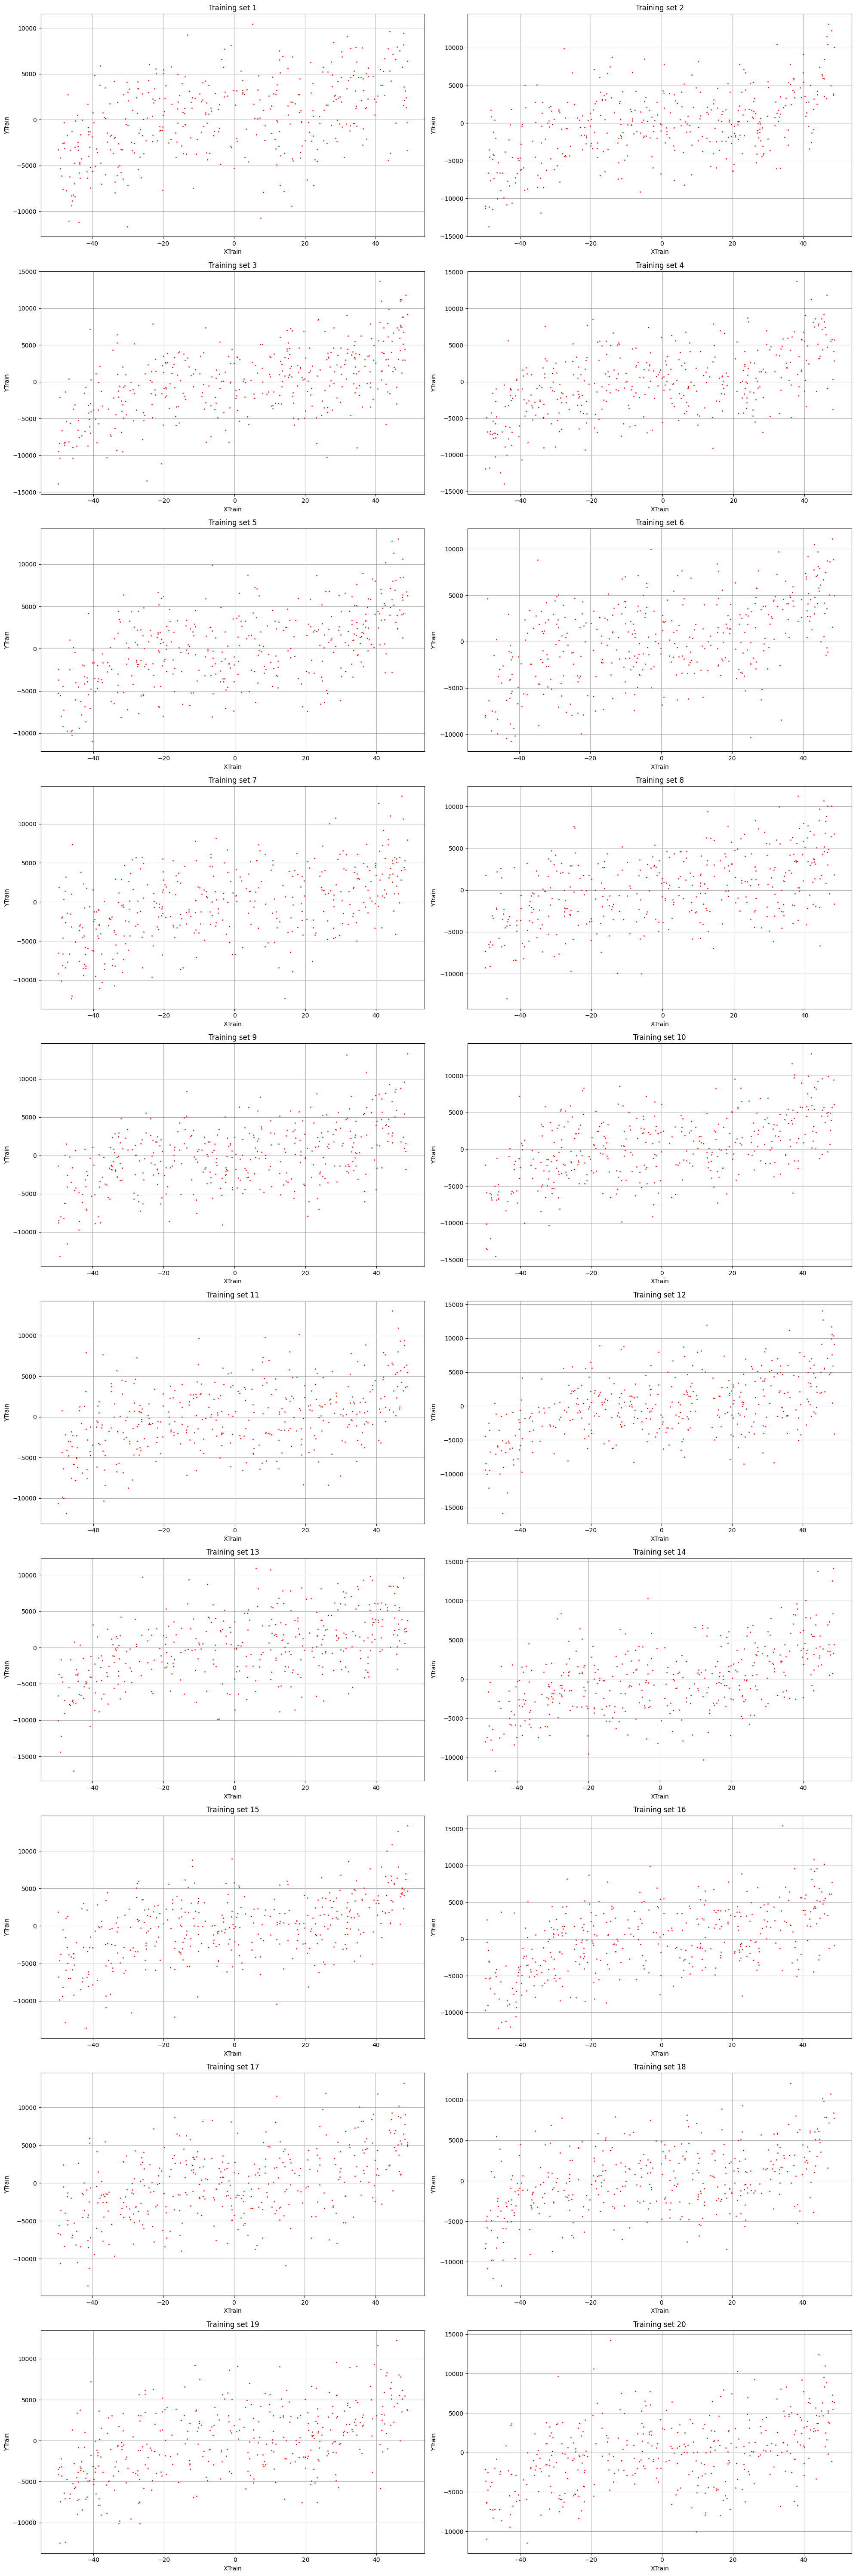

In [25]:
# Create a single figure with 20 separate plots
fig, axes = plt.subplots(10, 2, figsize=(20, 60))
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f'Training set {i+1}')
    ax.set_xlabel('XTrain') 
    ax.set_ylabel('YTrain')
    ax.grid()
    ax.plot(X_train_data_sets[i],Y_train_data_sets[i],"r.",markersize=2)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'YTest')

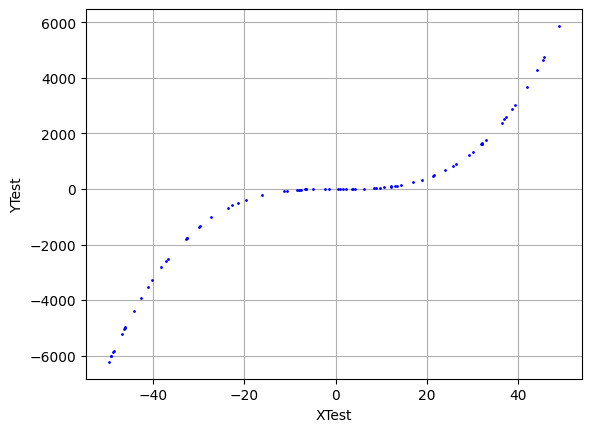

In [26]:
#testing data 
plt.plot(xTest,yTest,"b.",markersize=2) 
plt.grid() 
plt.xlabel('XTest') 
plt.ylabel('YTest')


## Plotting A Graph Of The Trained Polynomial Regression Model

<Figure size 640x480 with 0 Axes>

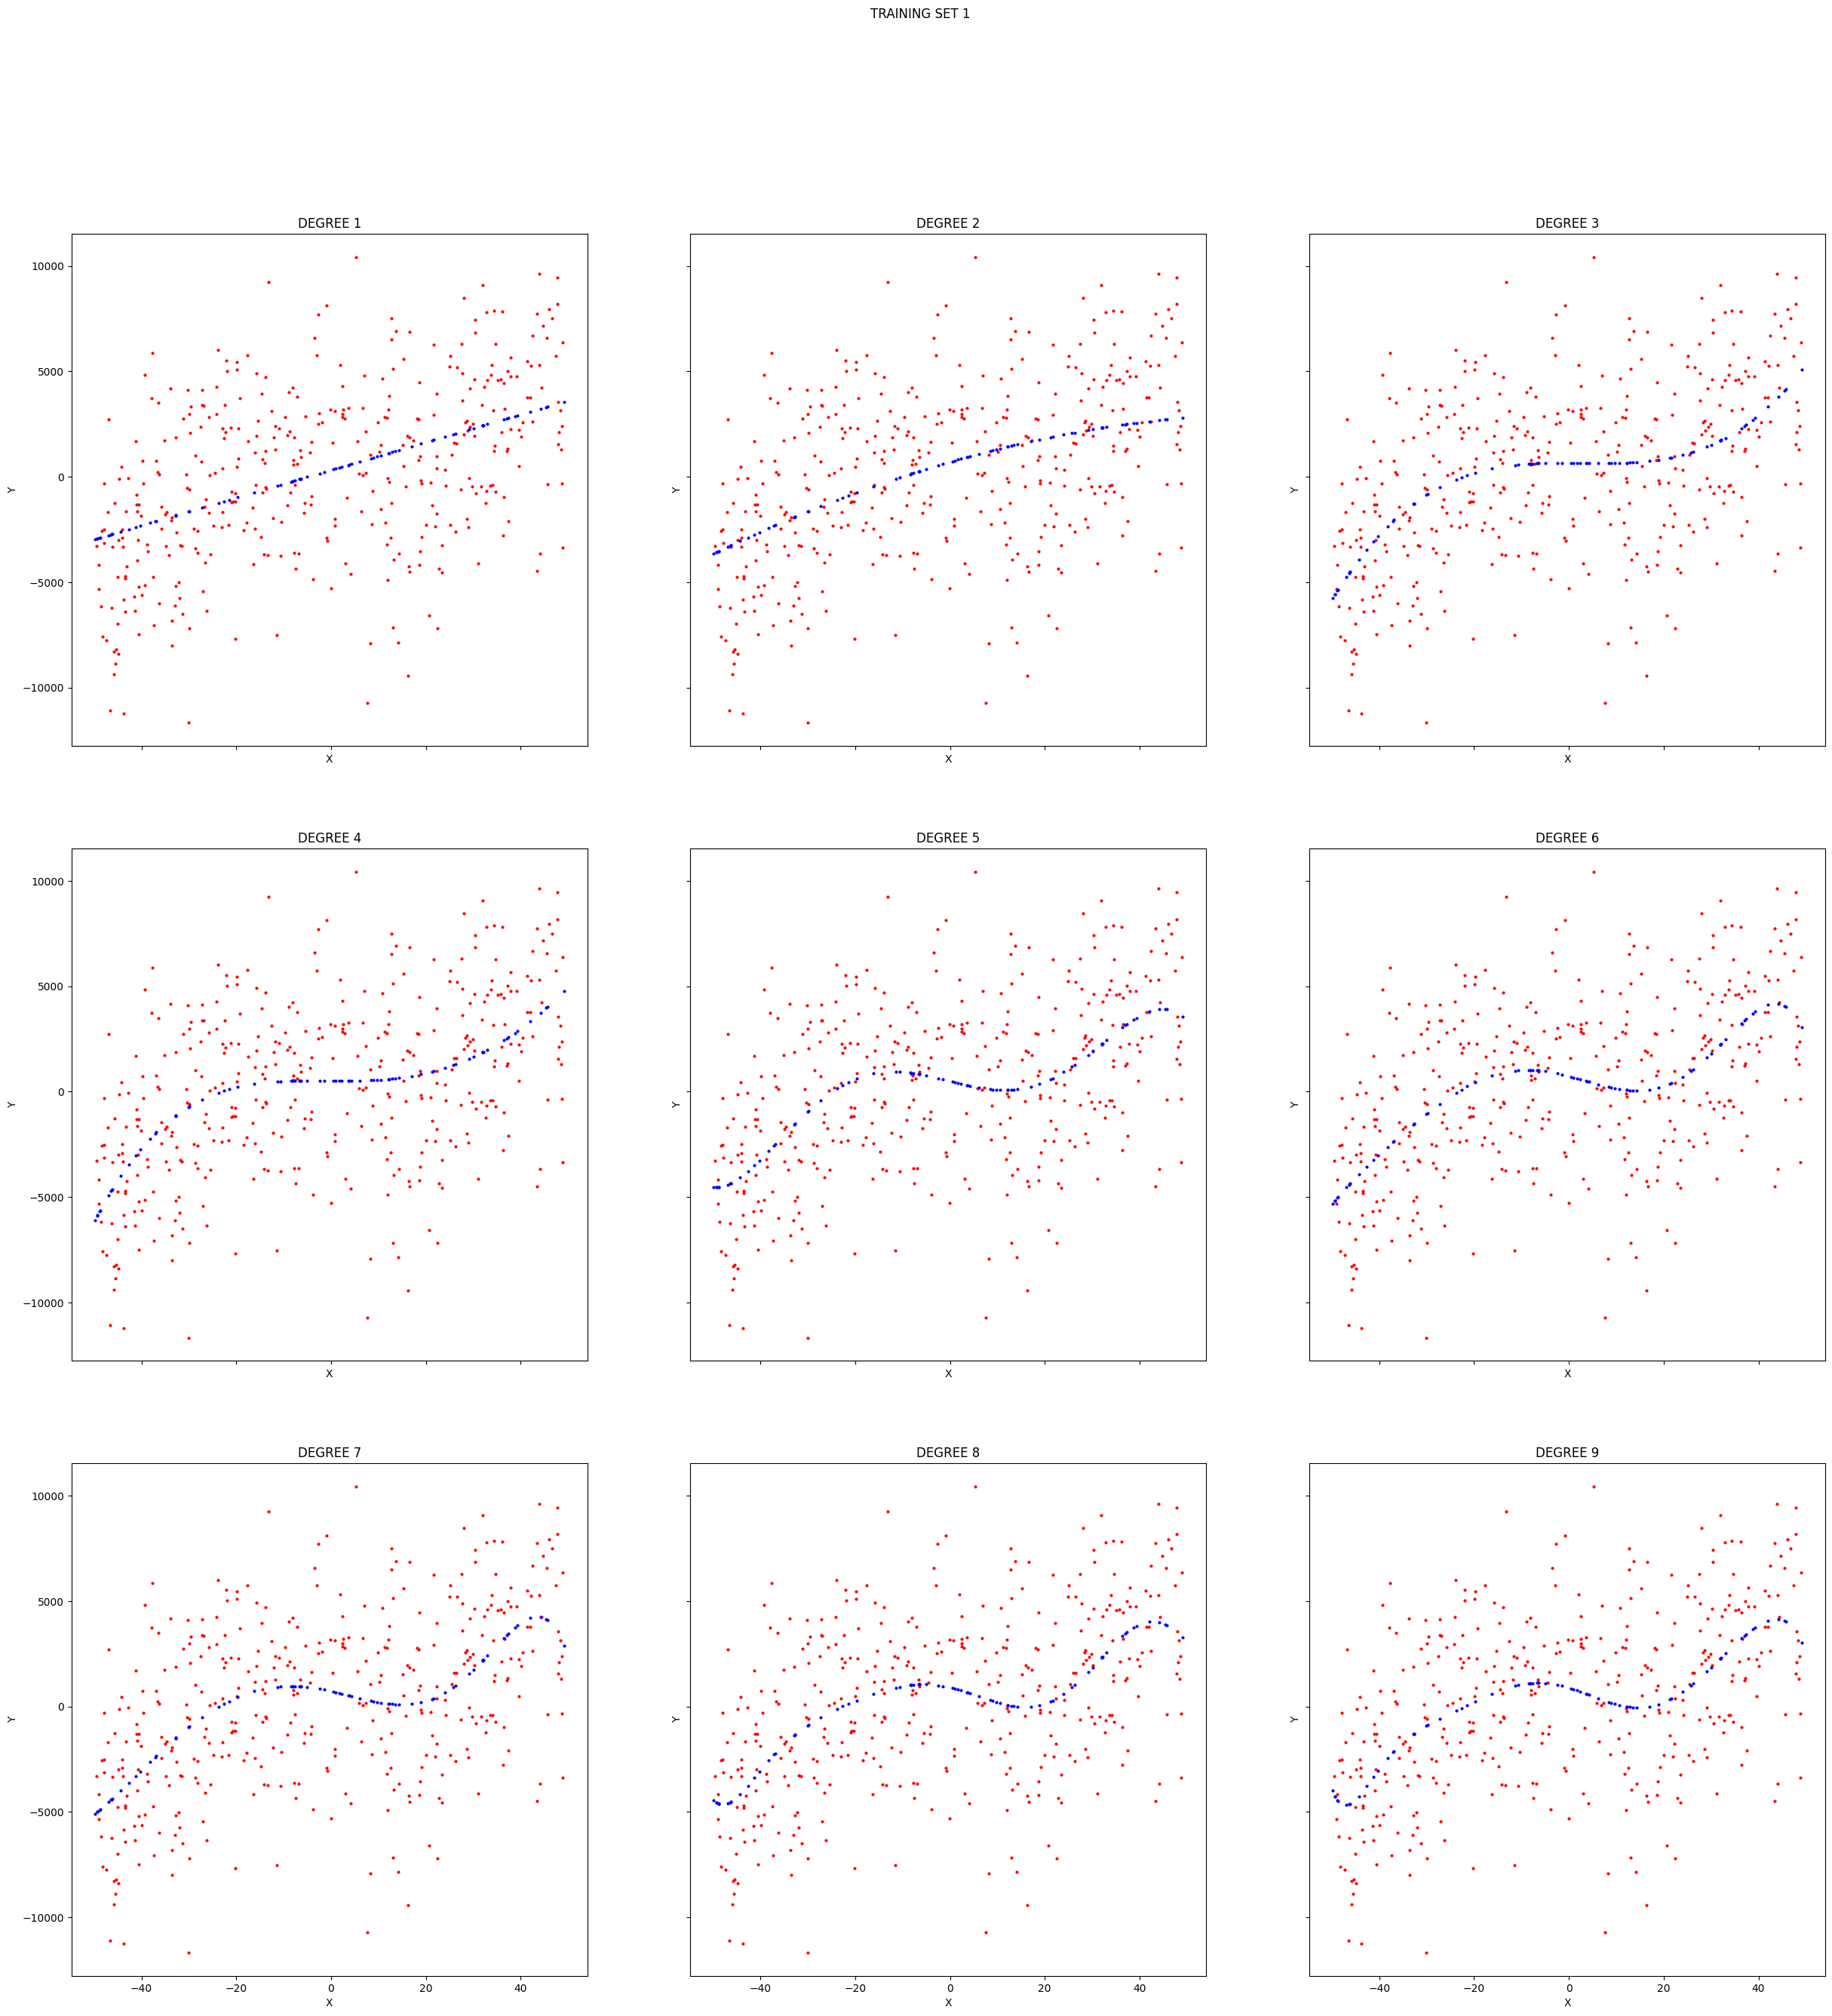

<Figure size 640x480 with 0 Axes>

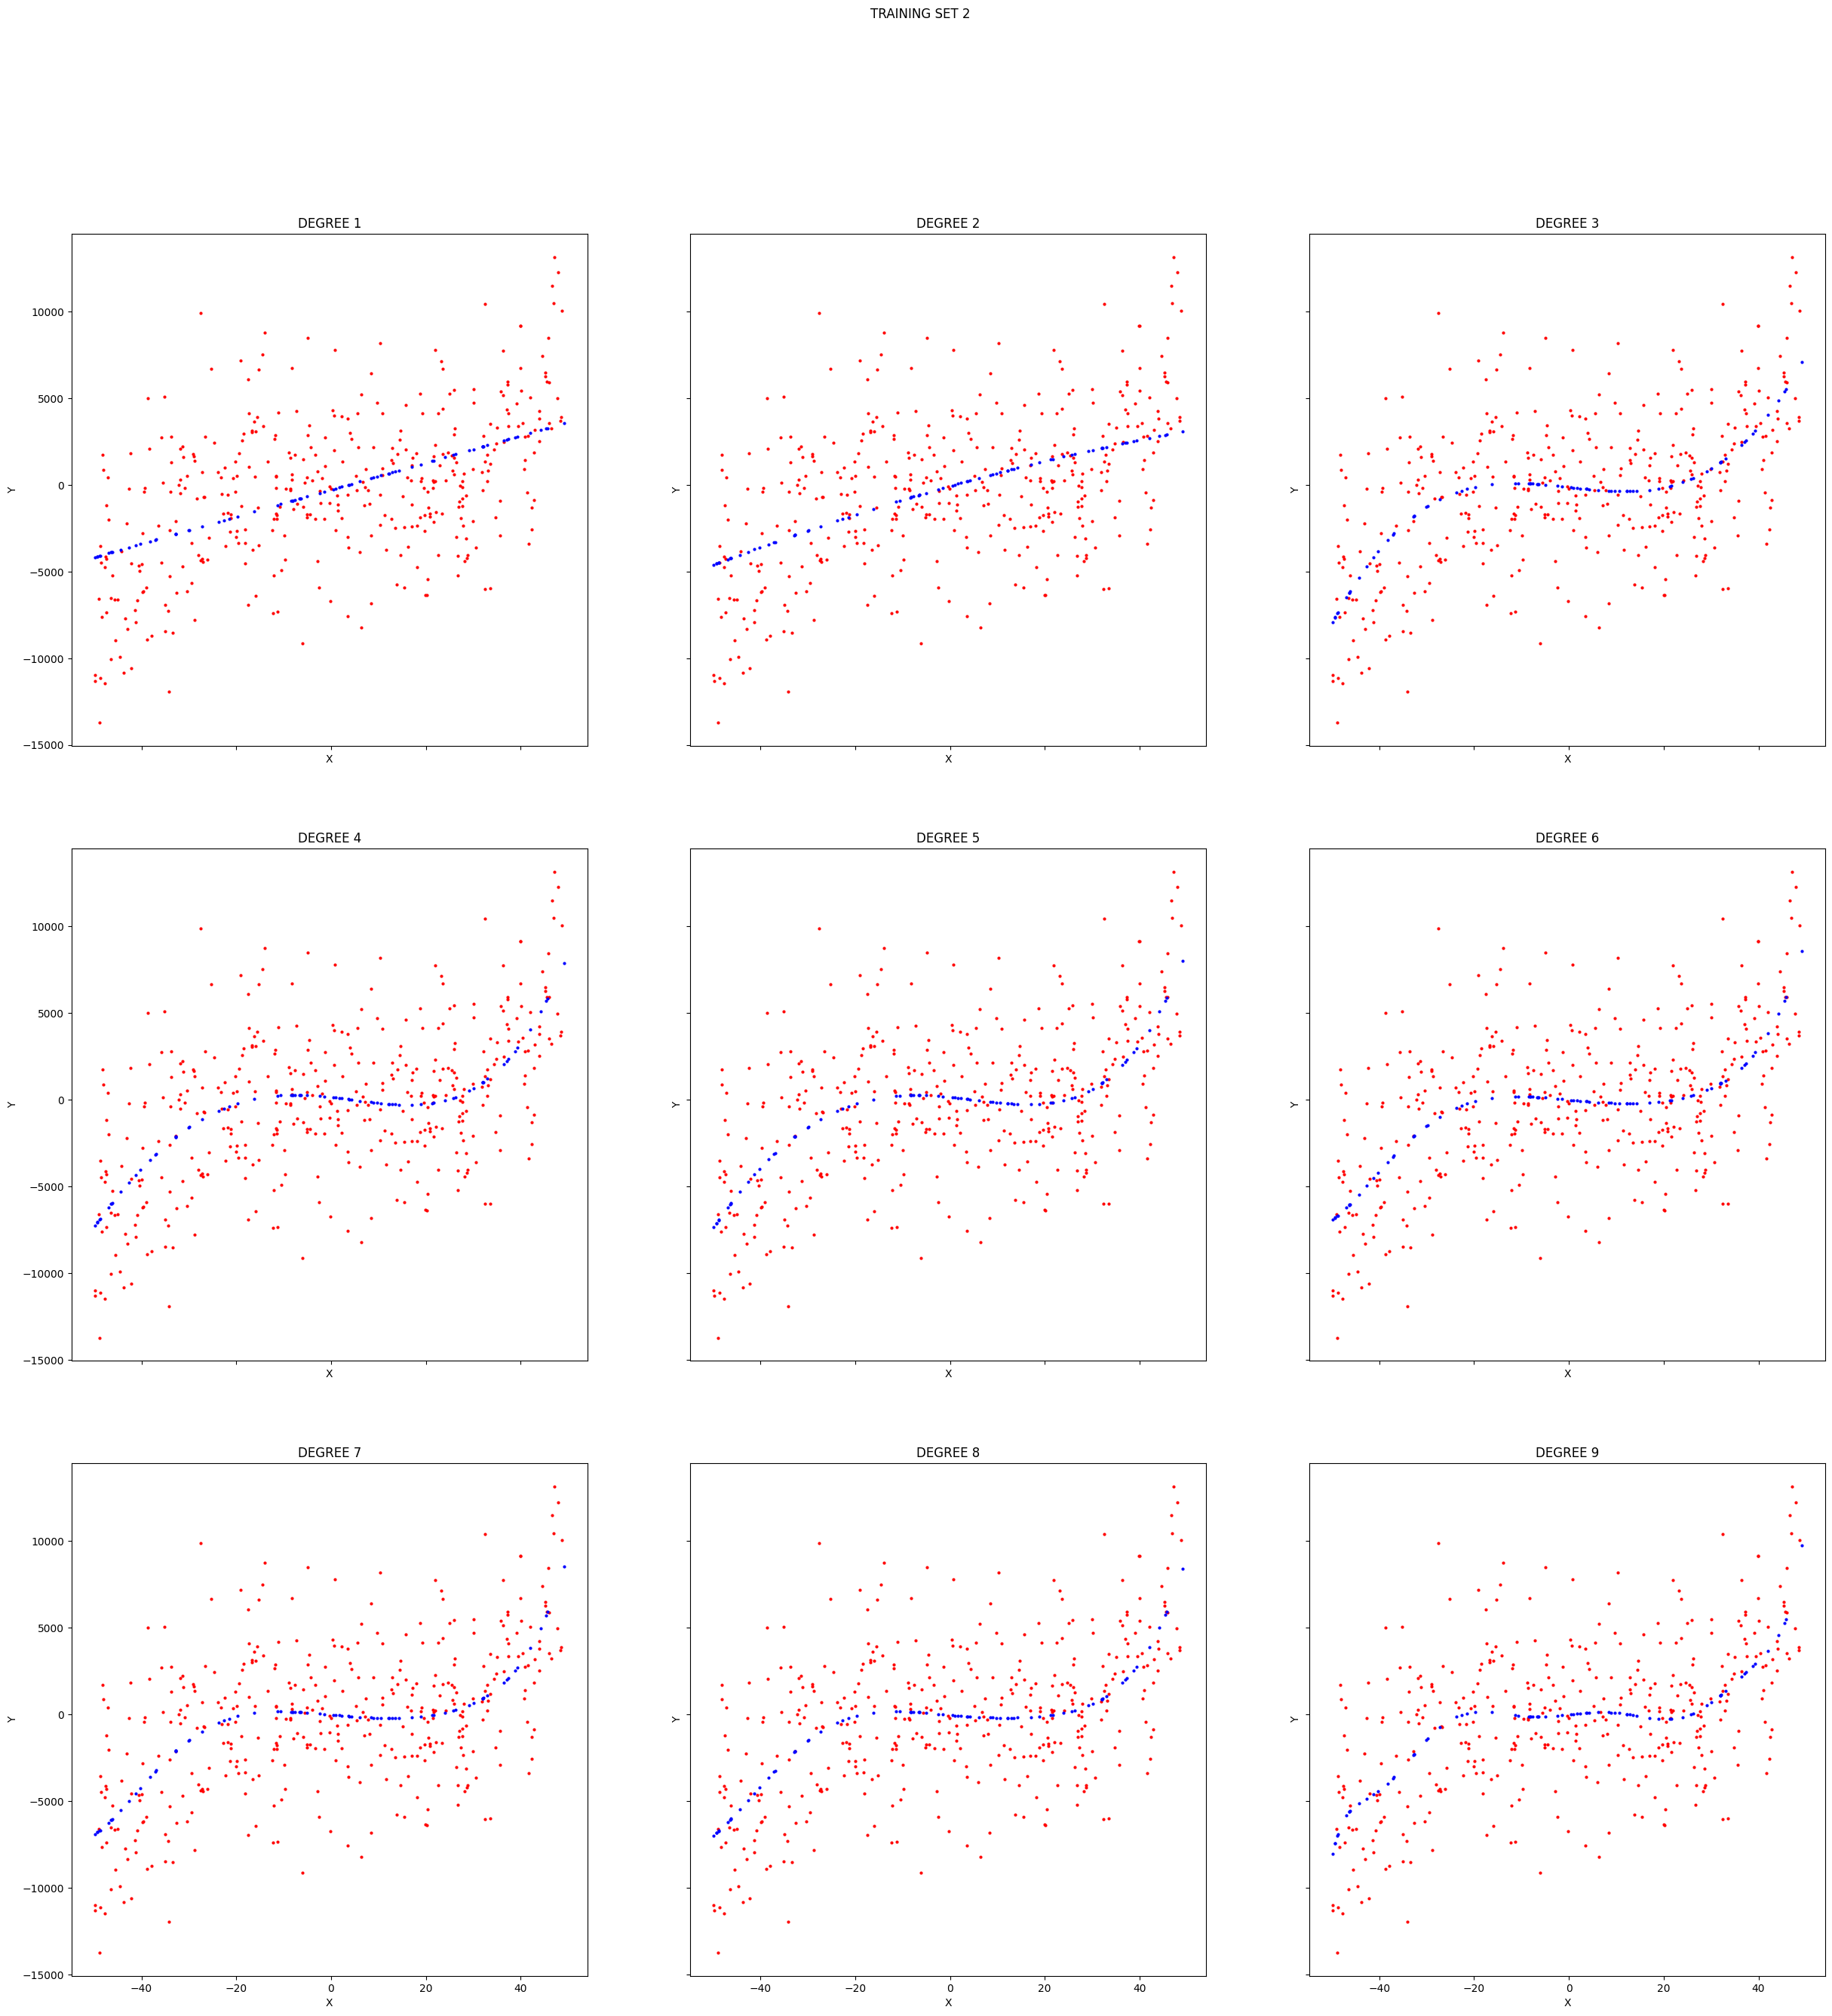

<Figure size 640x480 with 0 Axes>

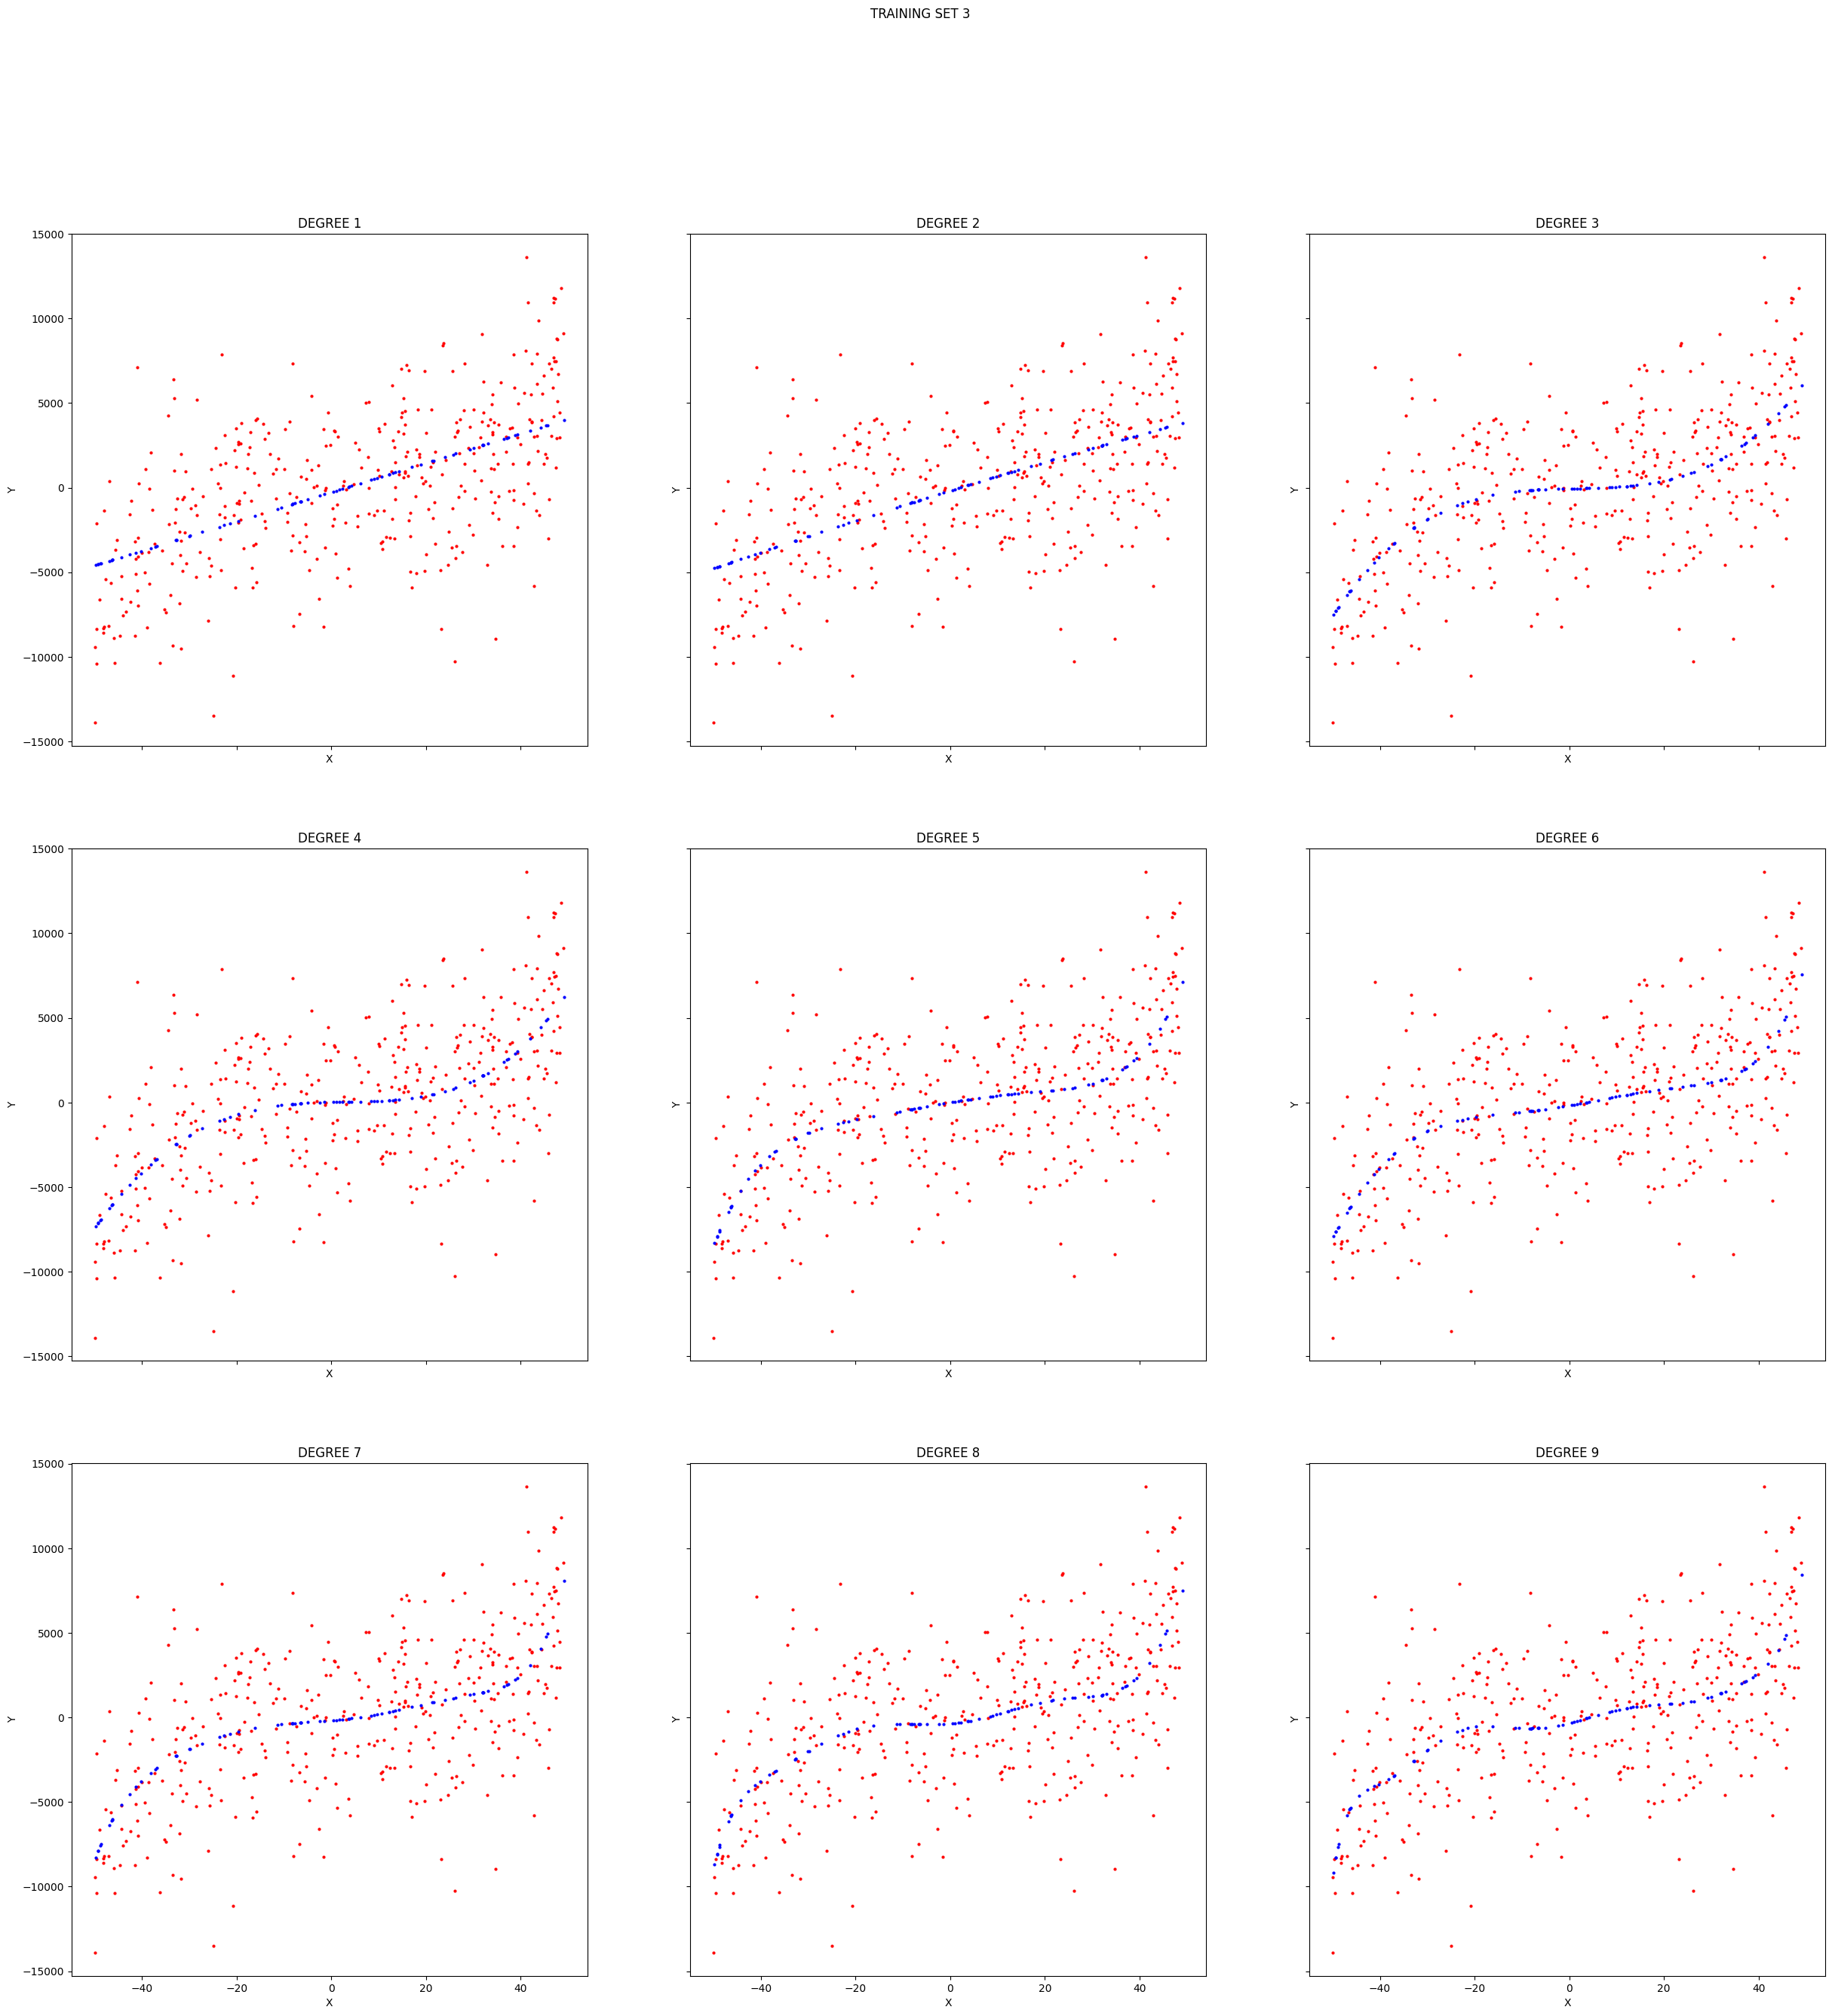

<Figure size 640x480 with 0 Axes>

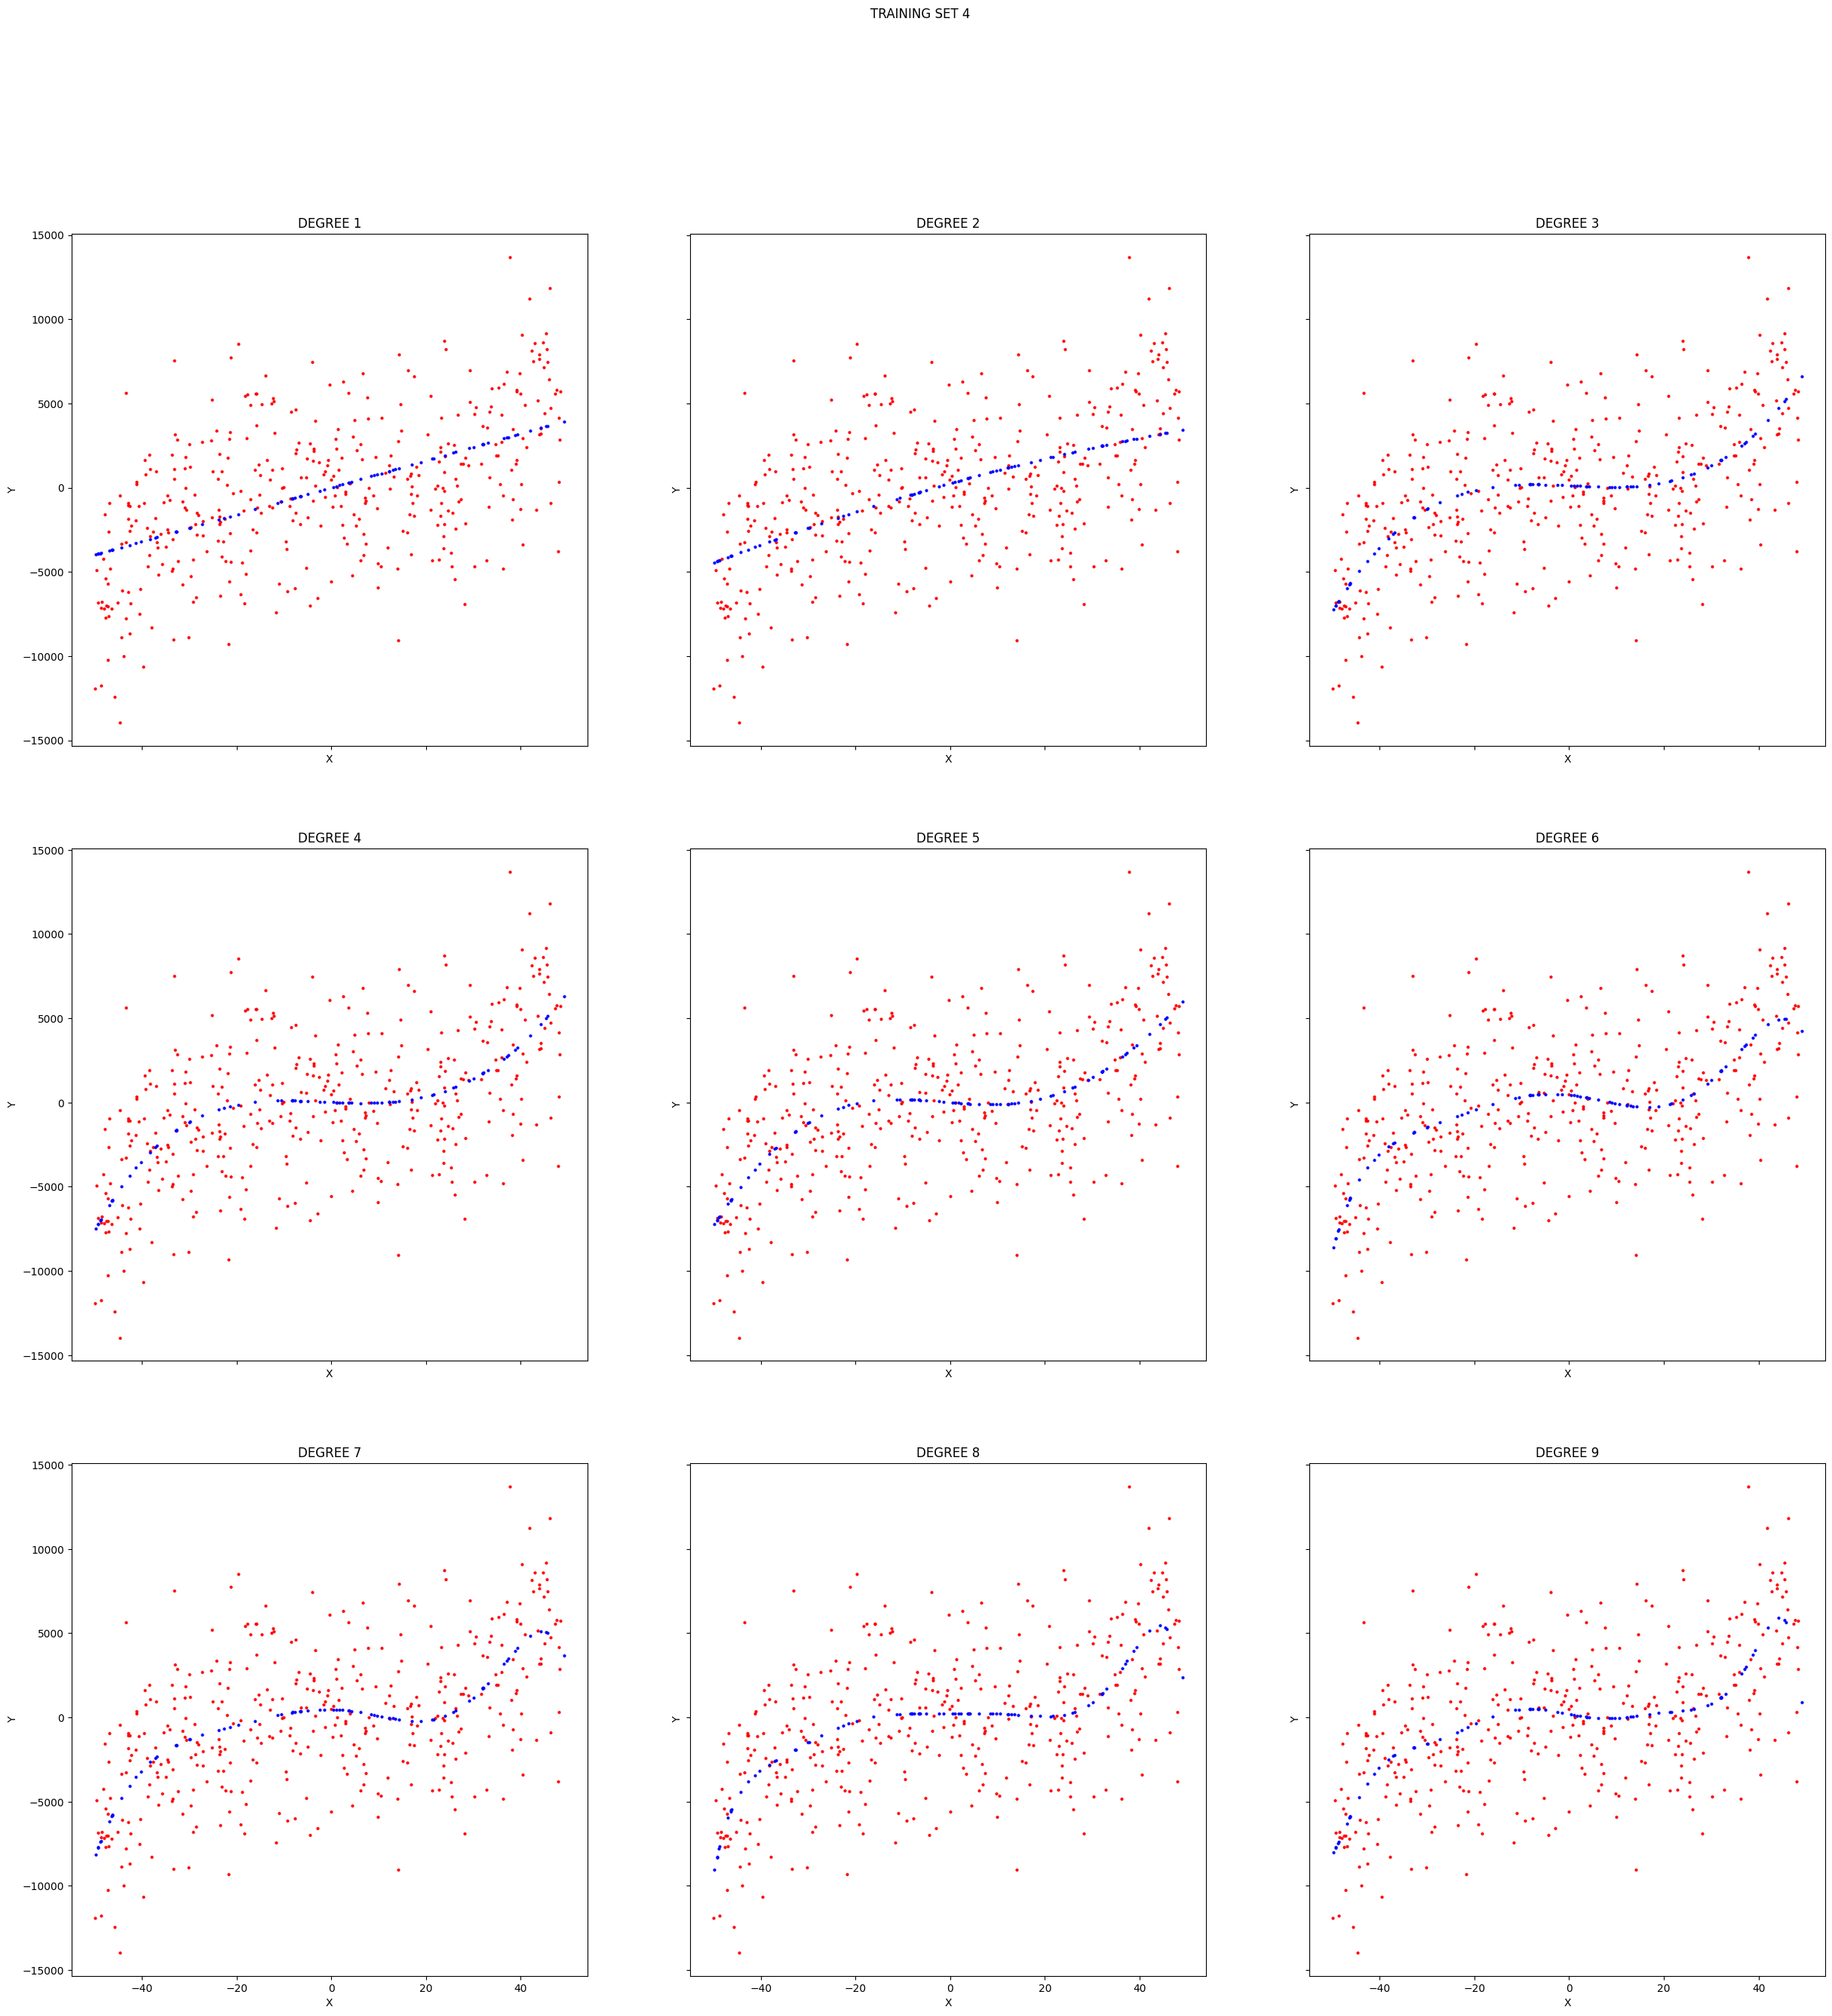

<Figure size 640x480 with 0 Axes>

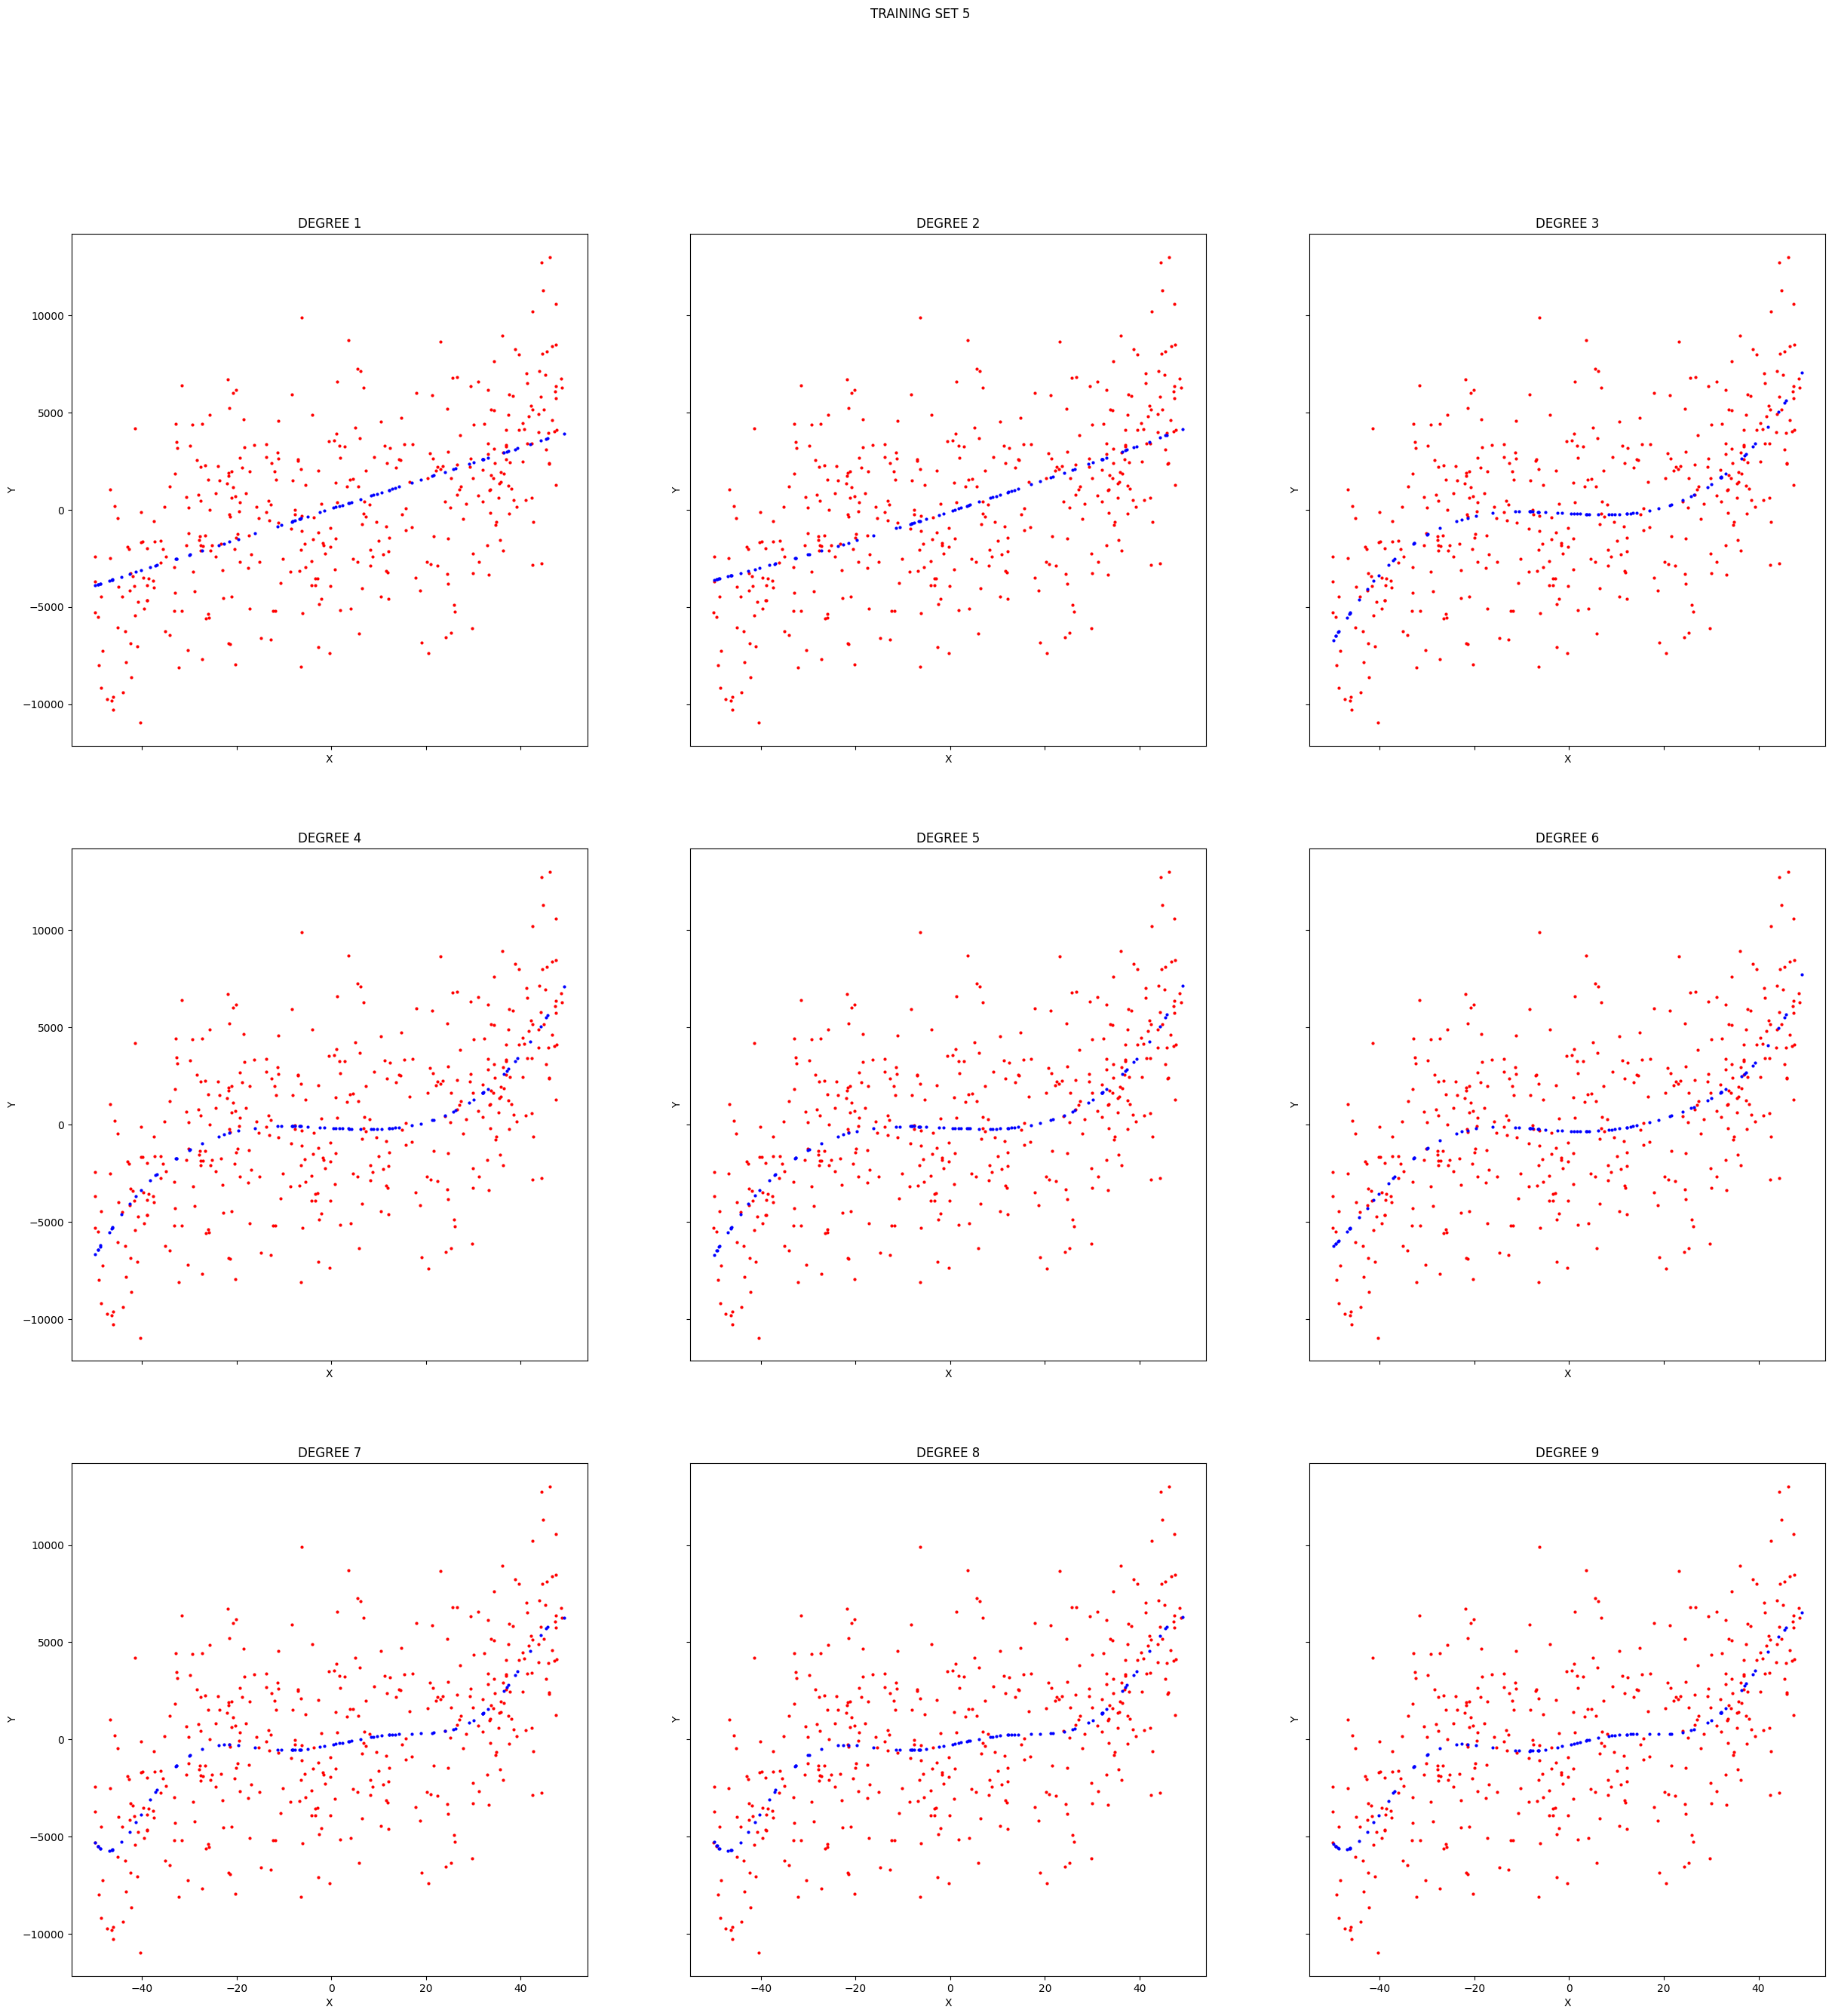

<Figure size 640x480 with 0 Axes>

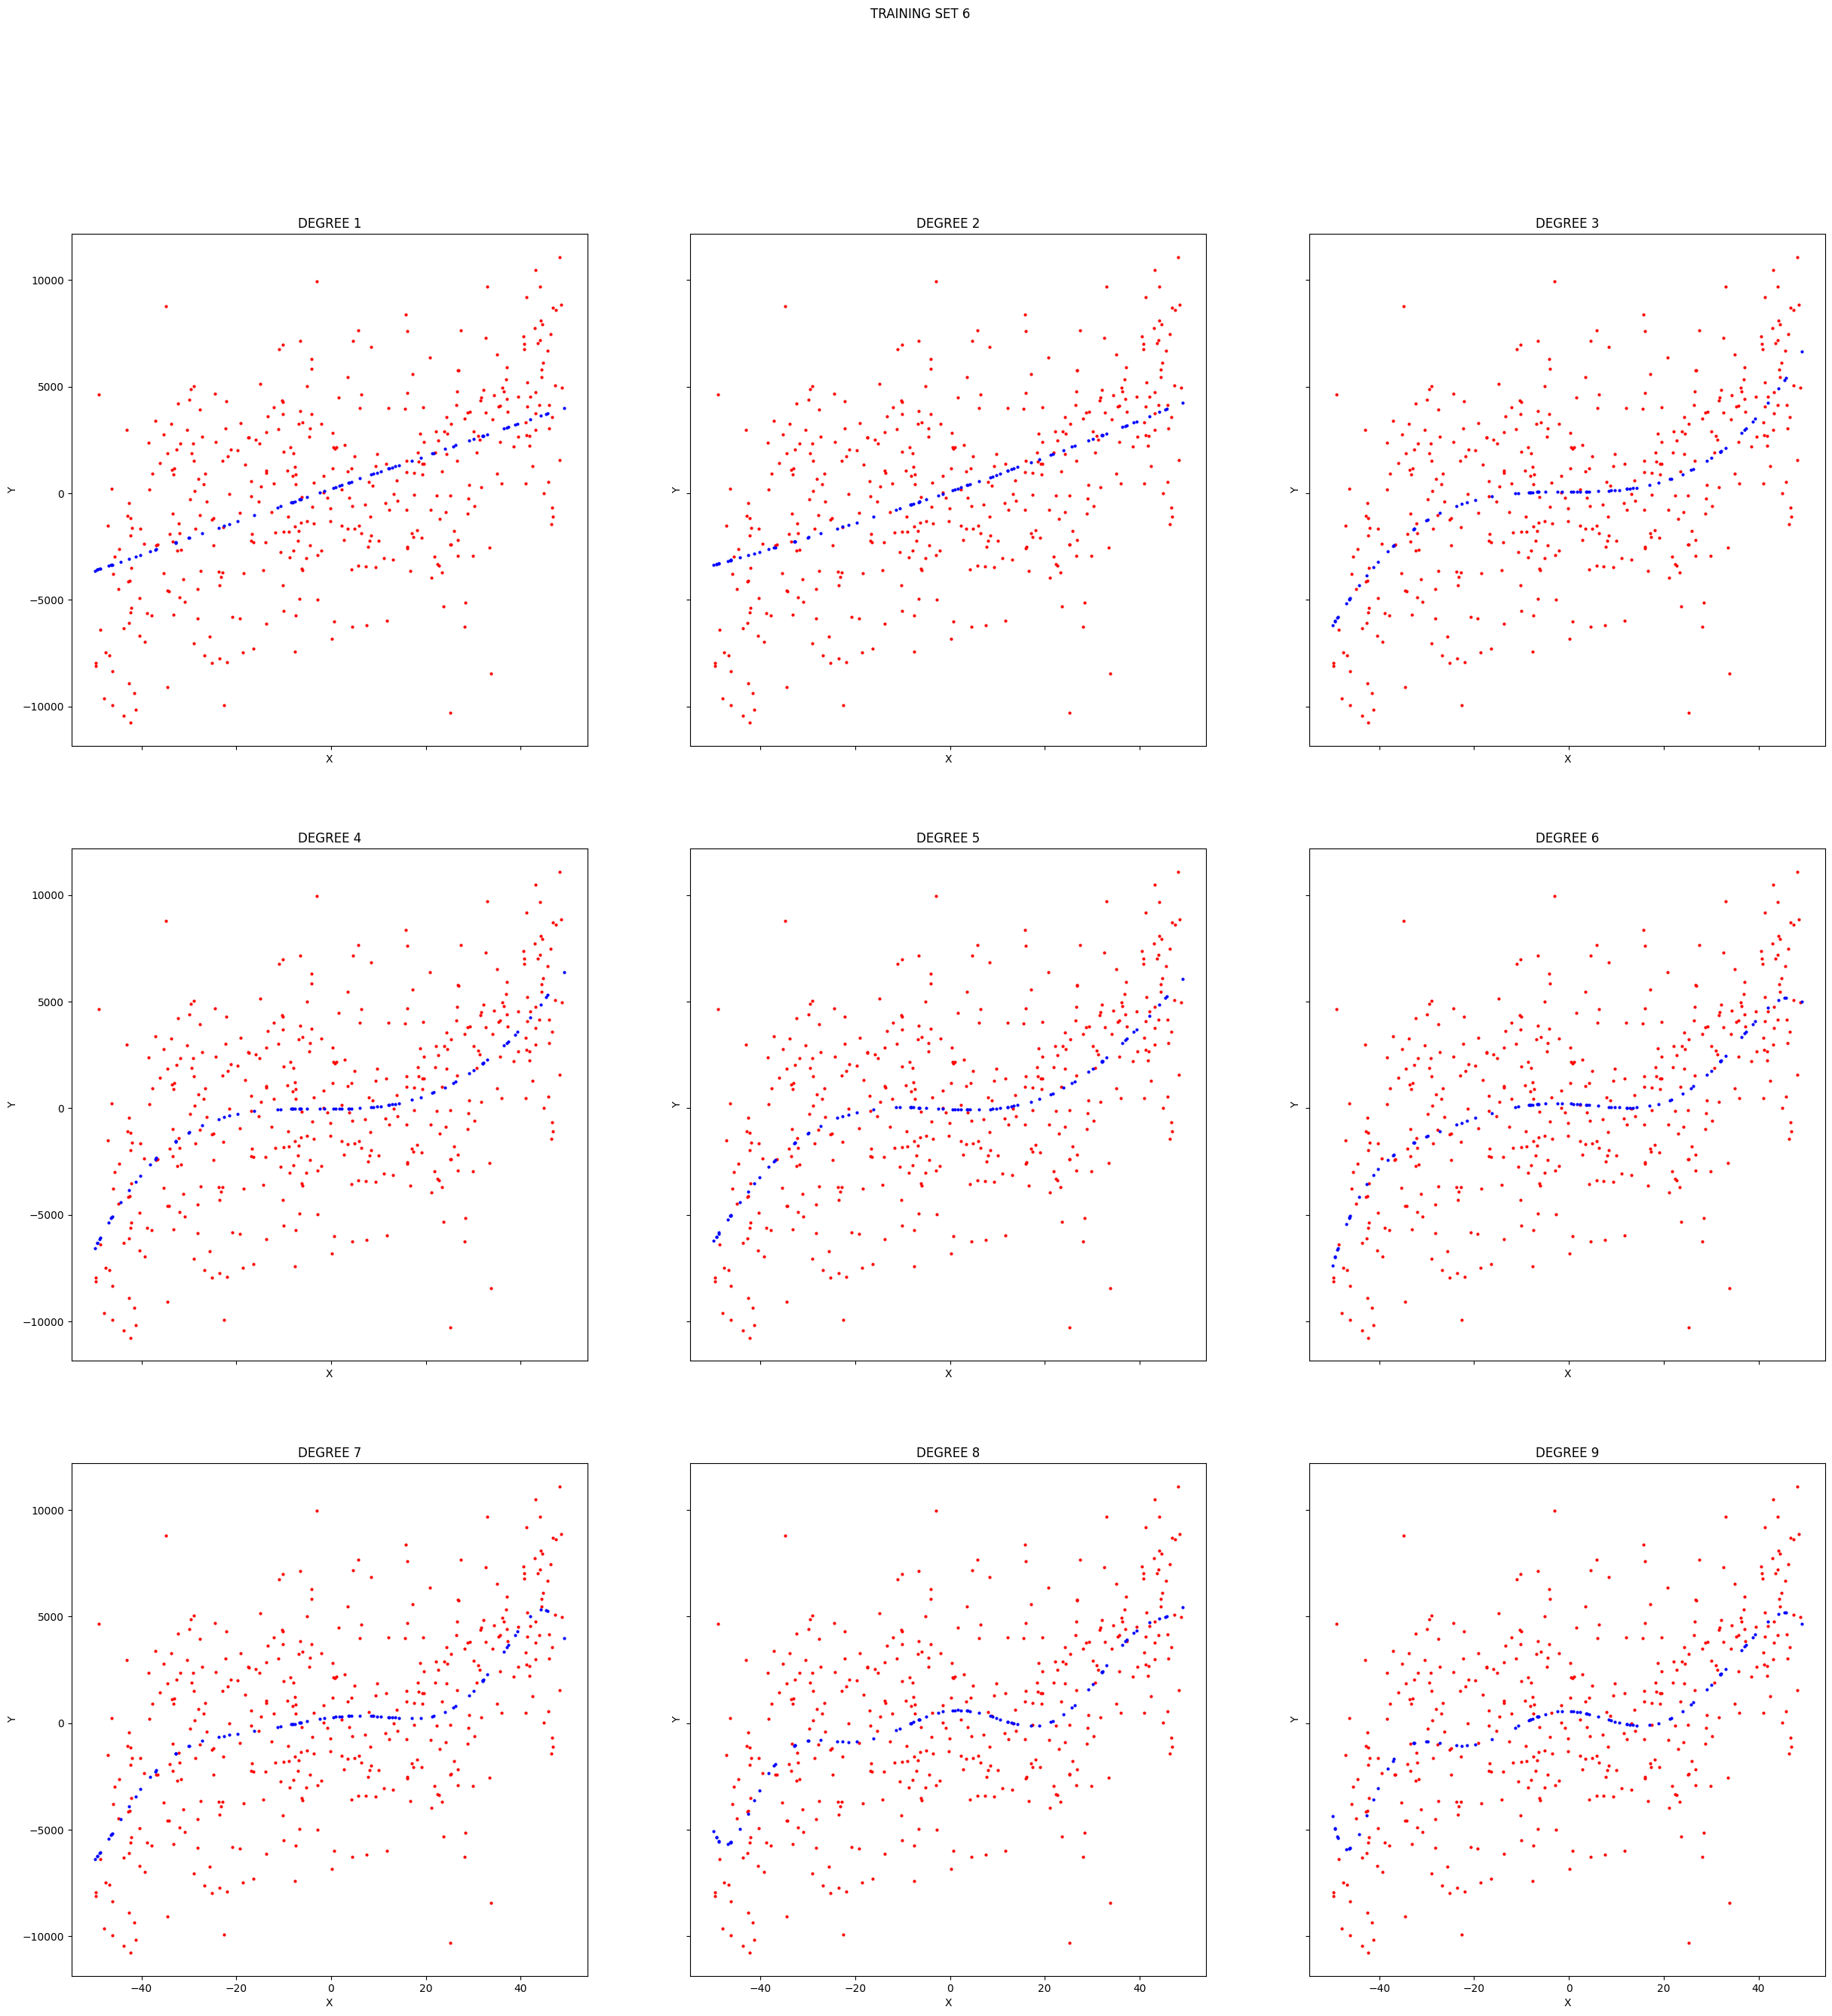

<Figure size 640x480 with 0 Axes>

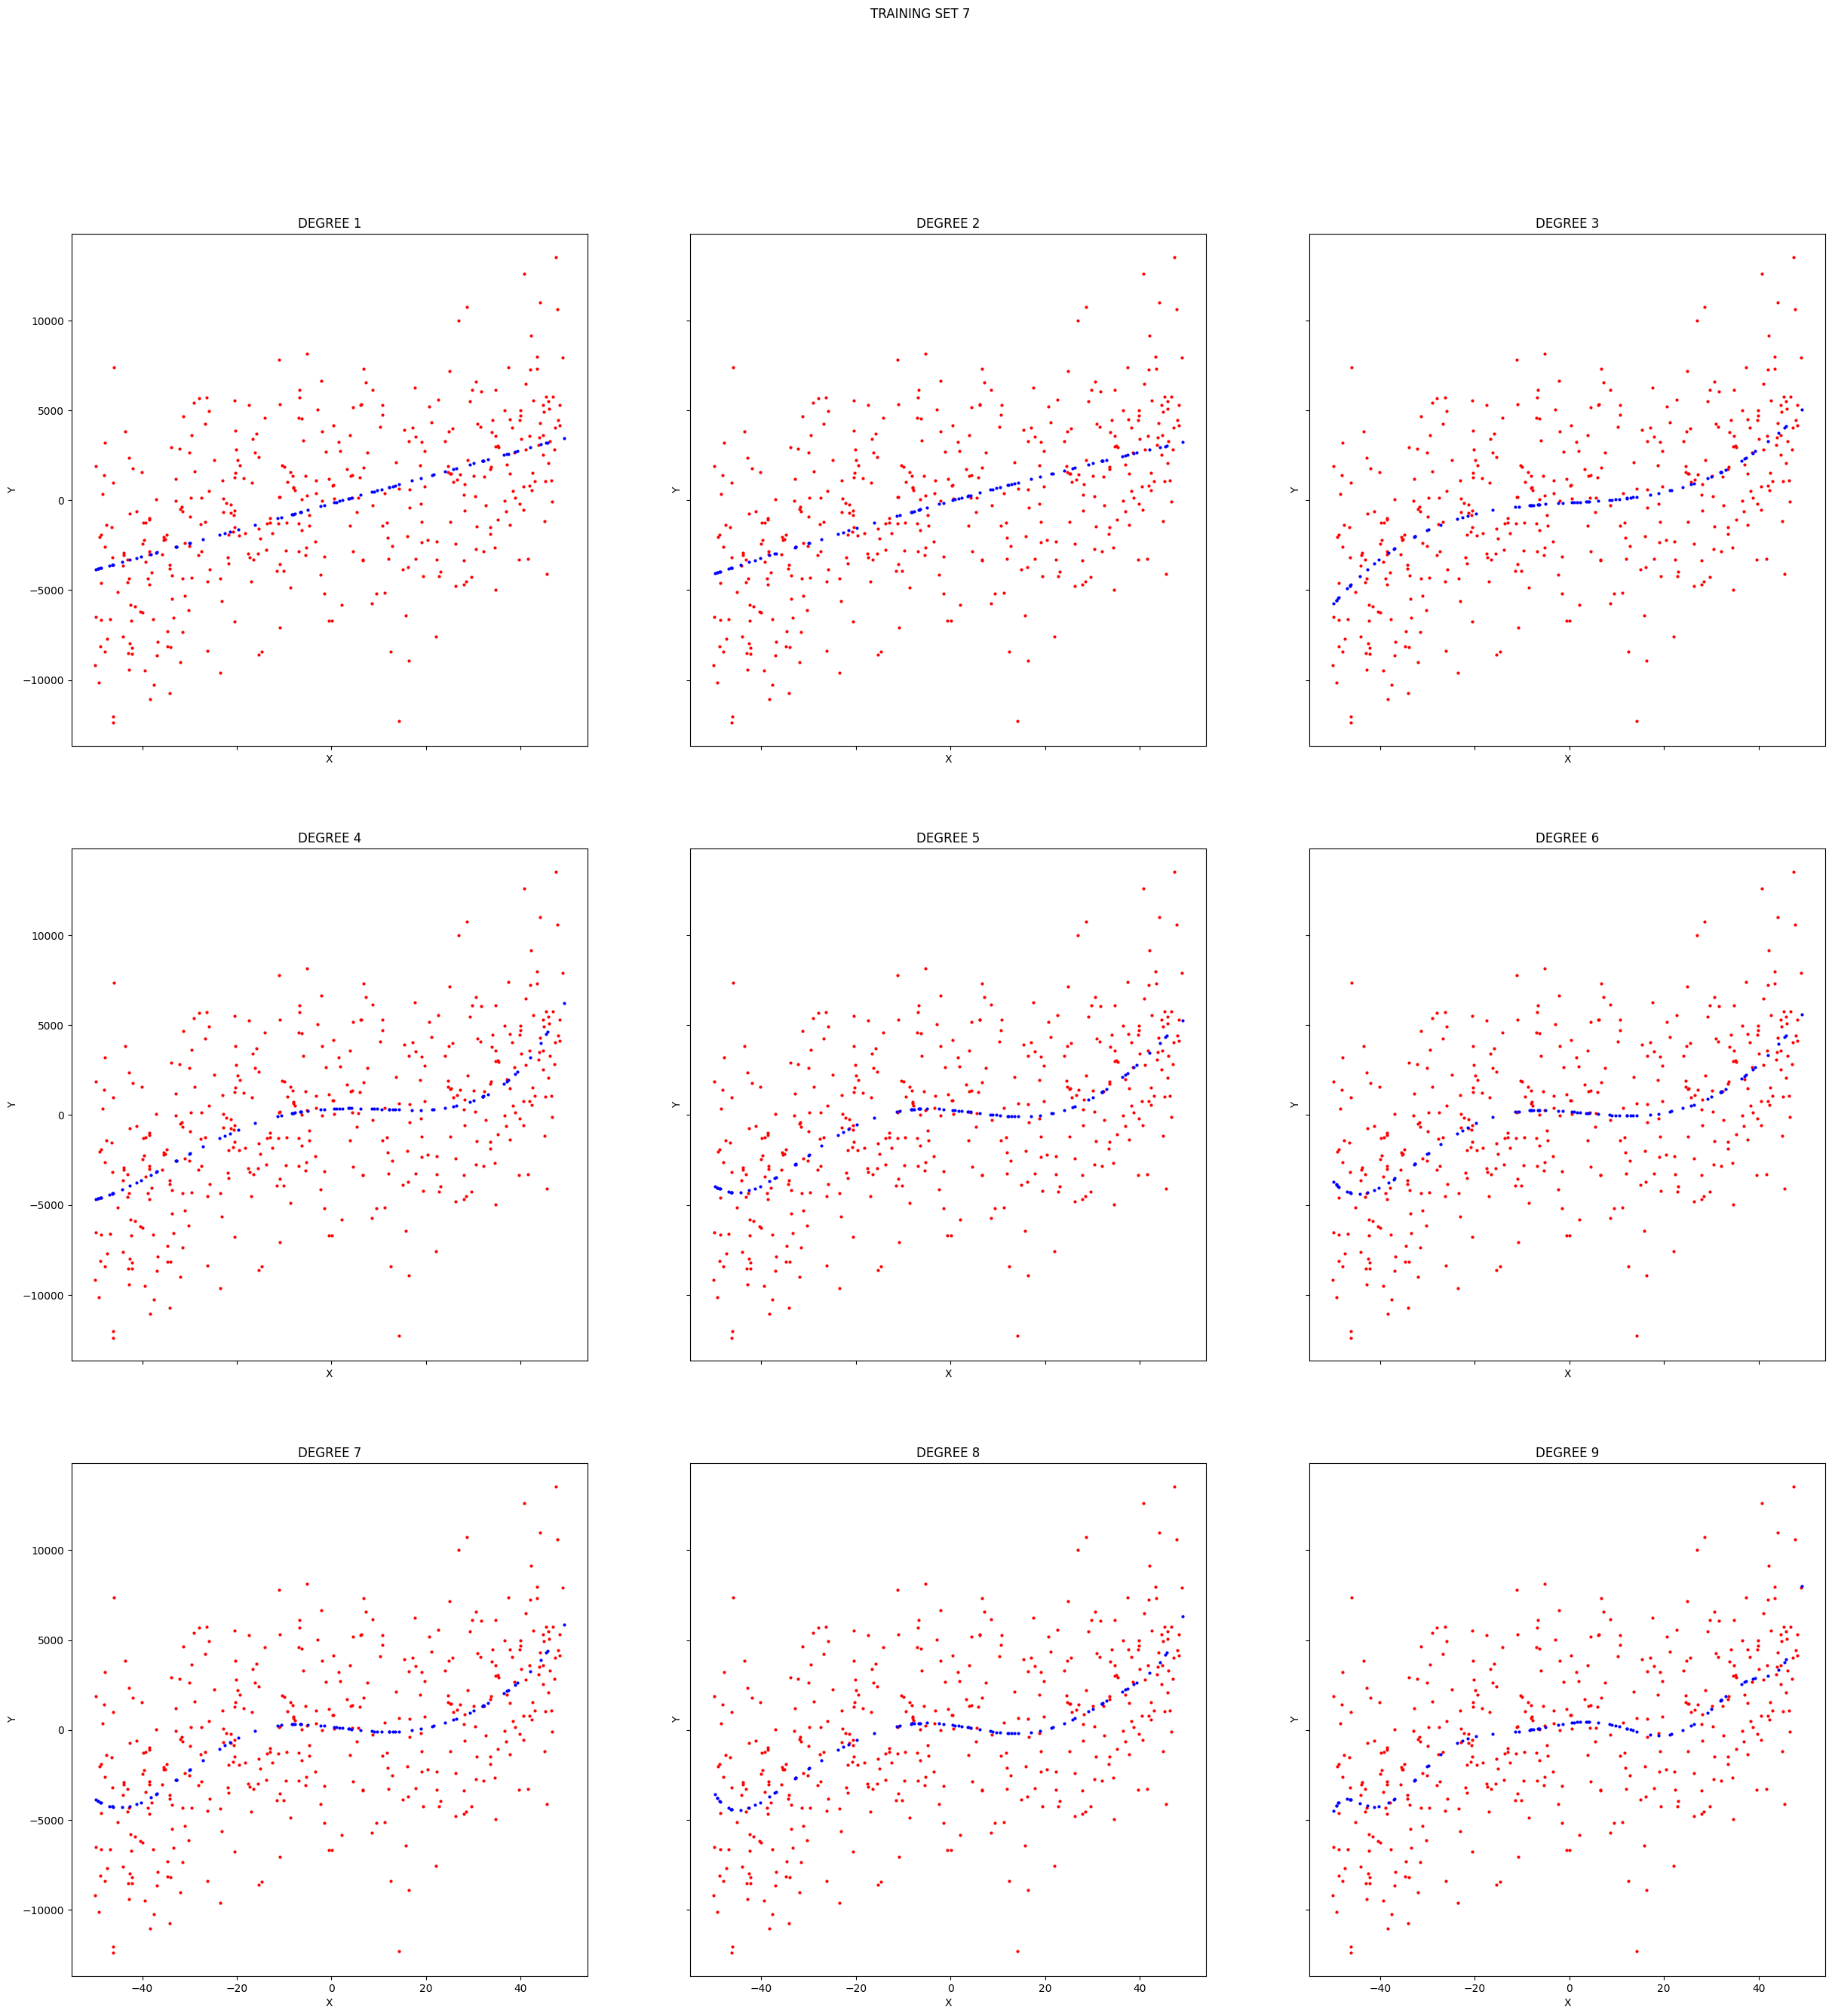

<Figure size 640x480 with 0 Axes>

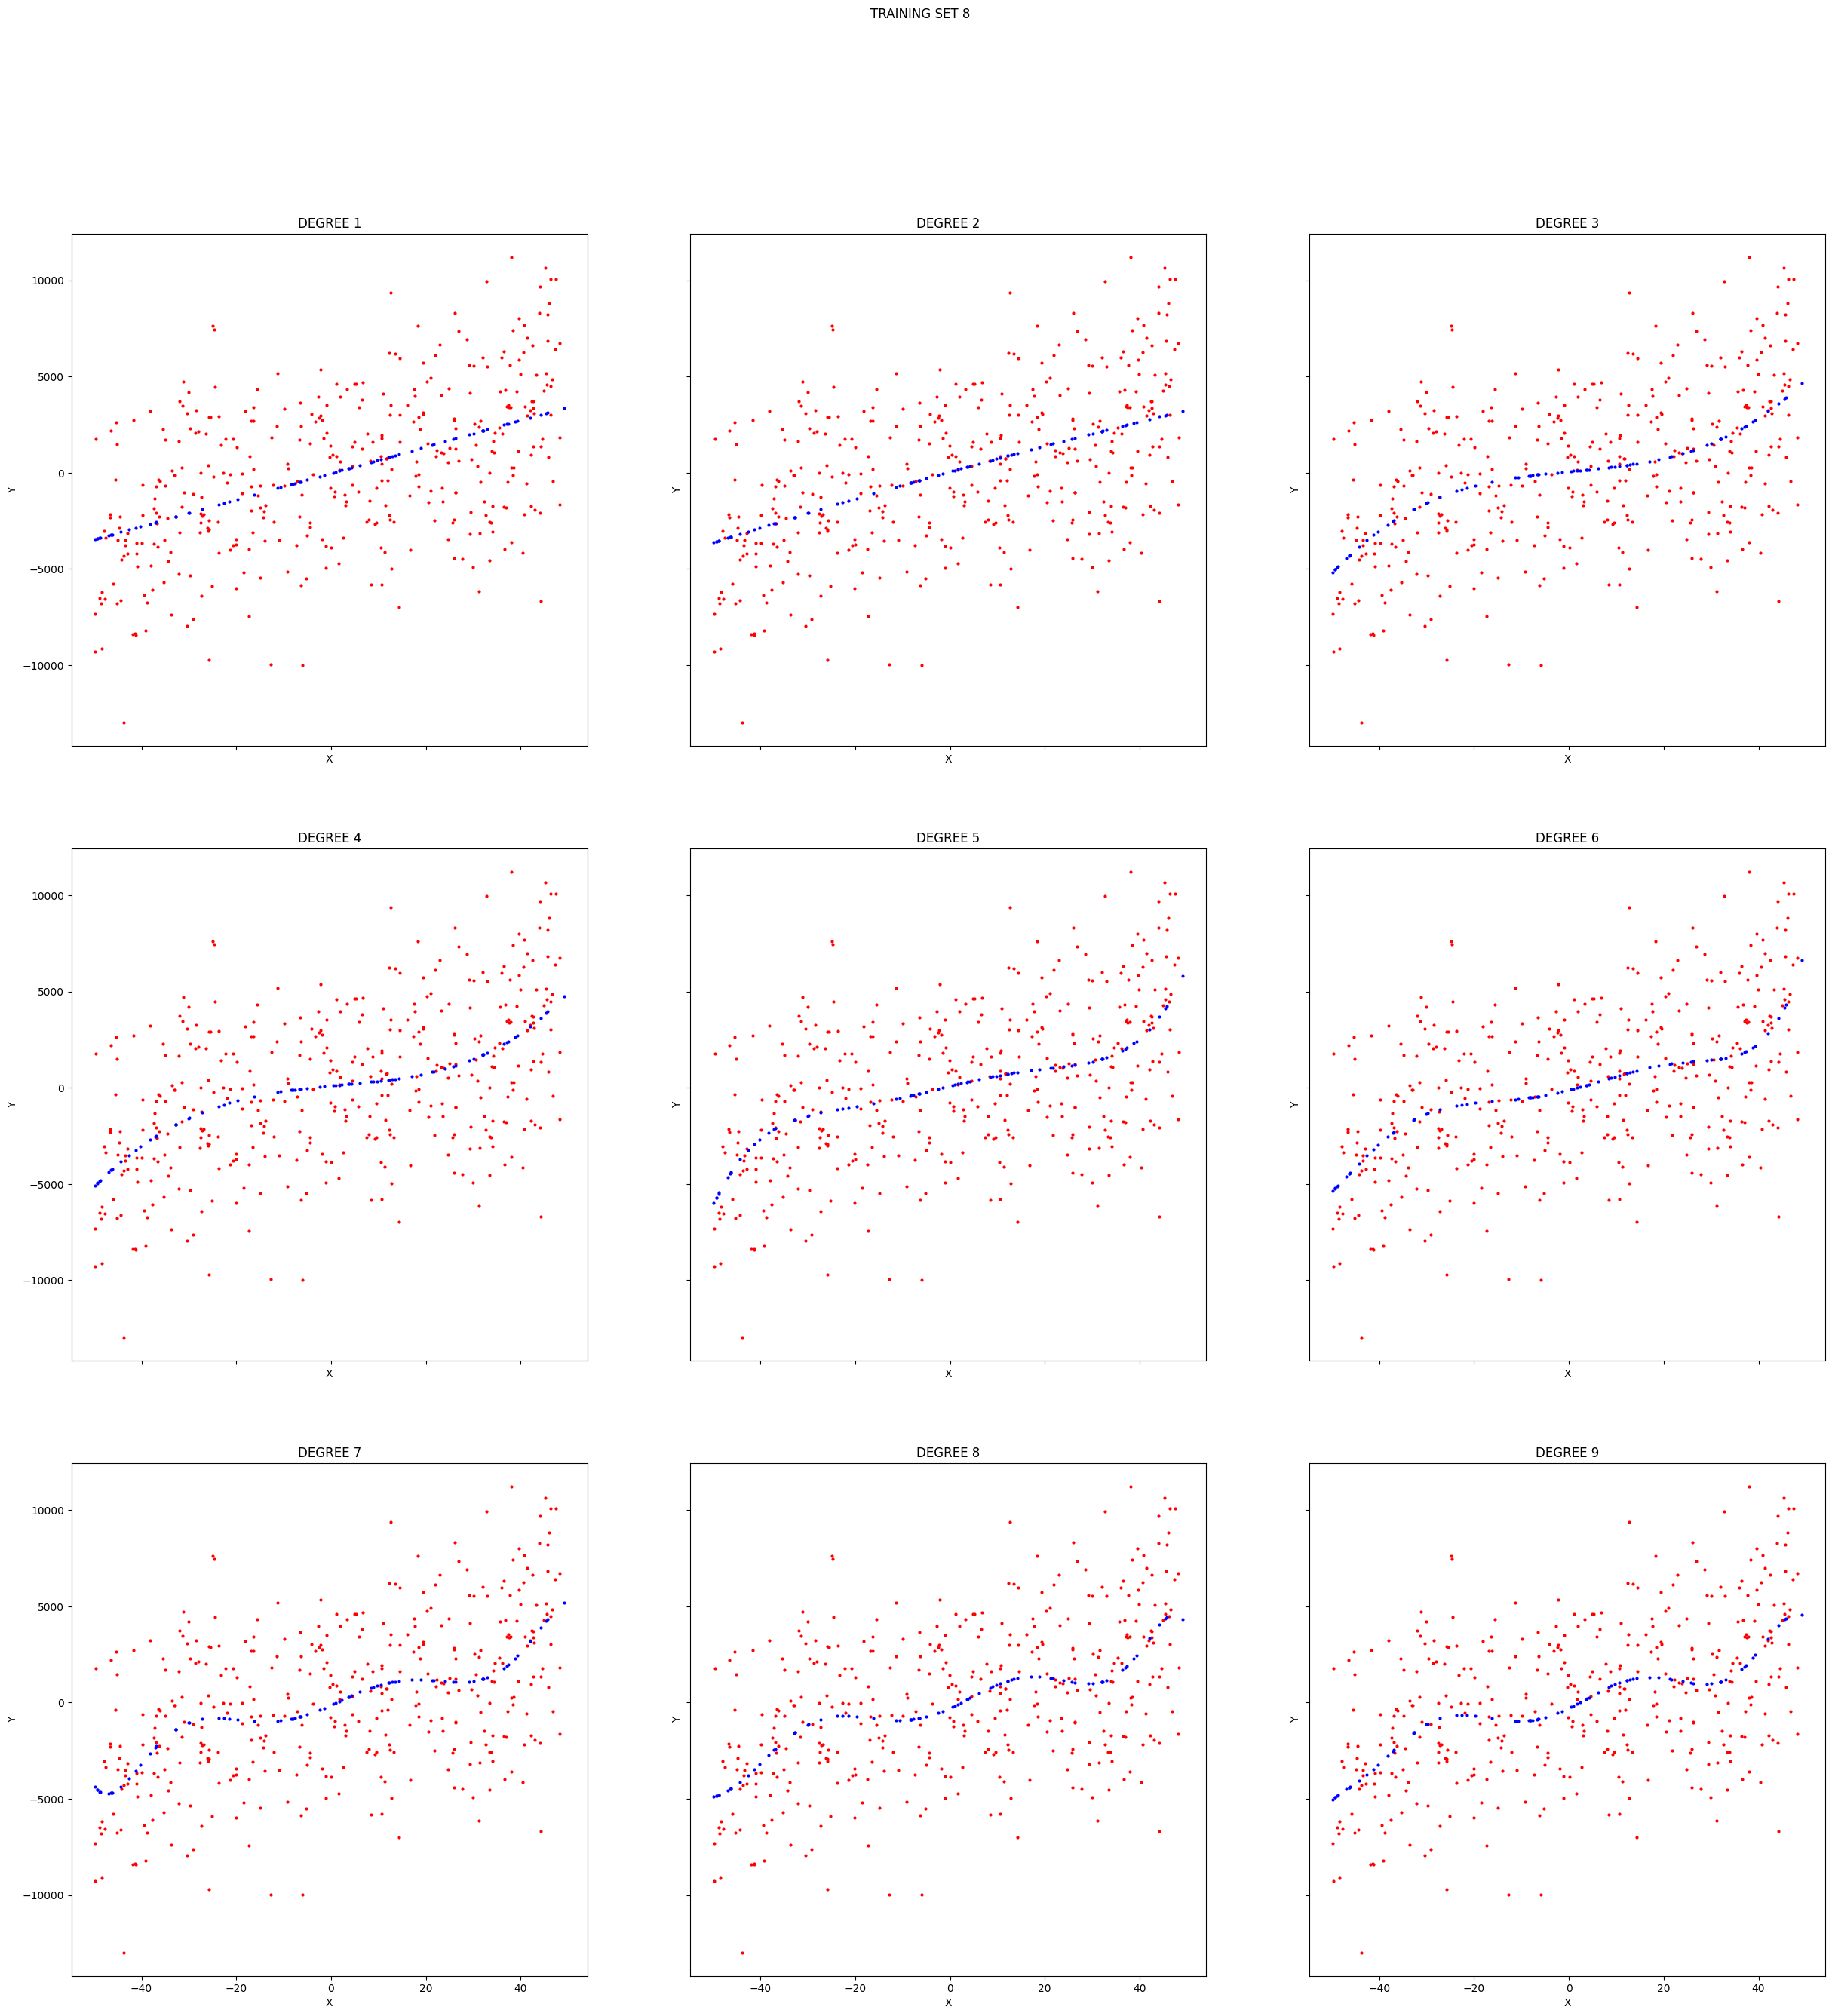

<Figure size 640x480 with 0 Axes>

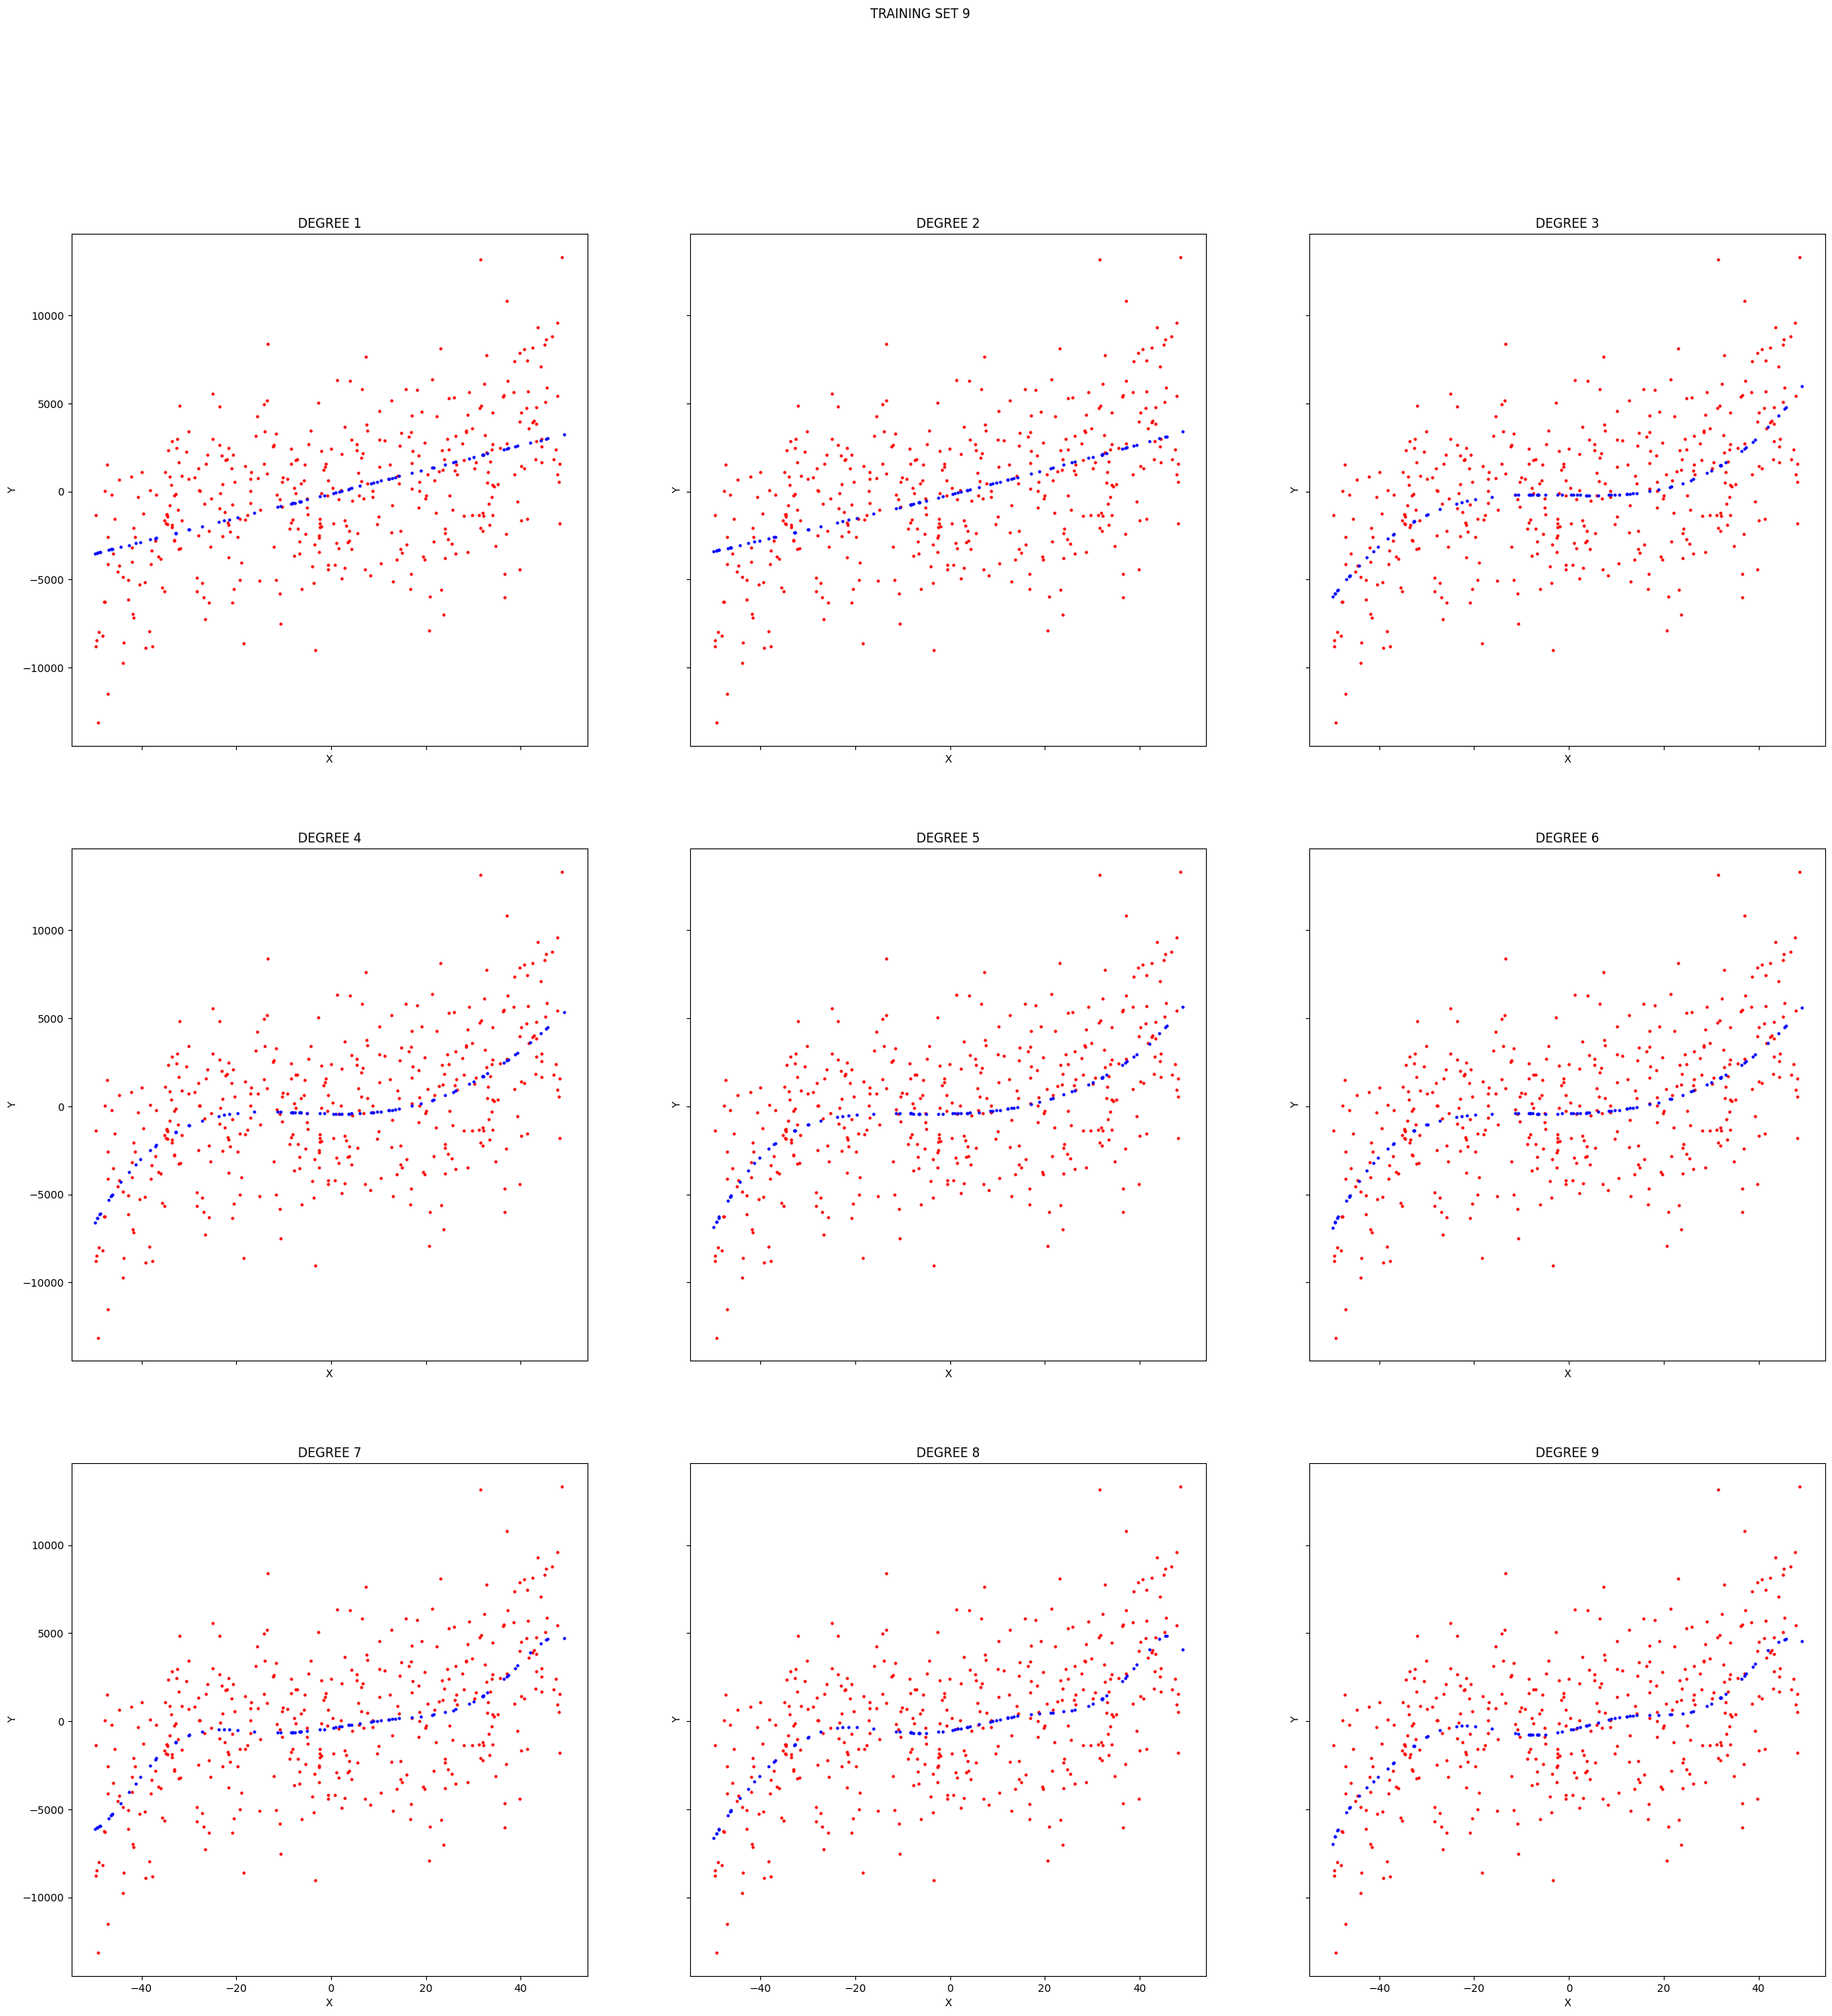

<Figure size 640x480 with 0 Axes>

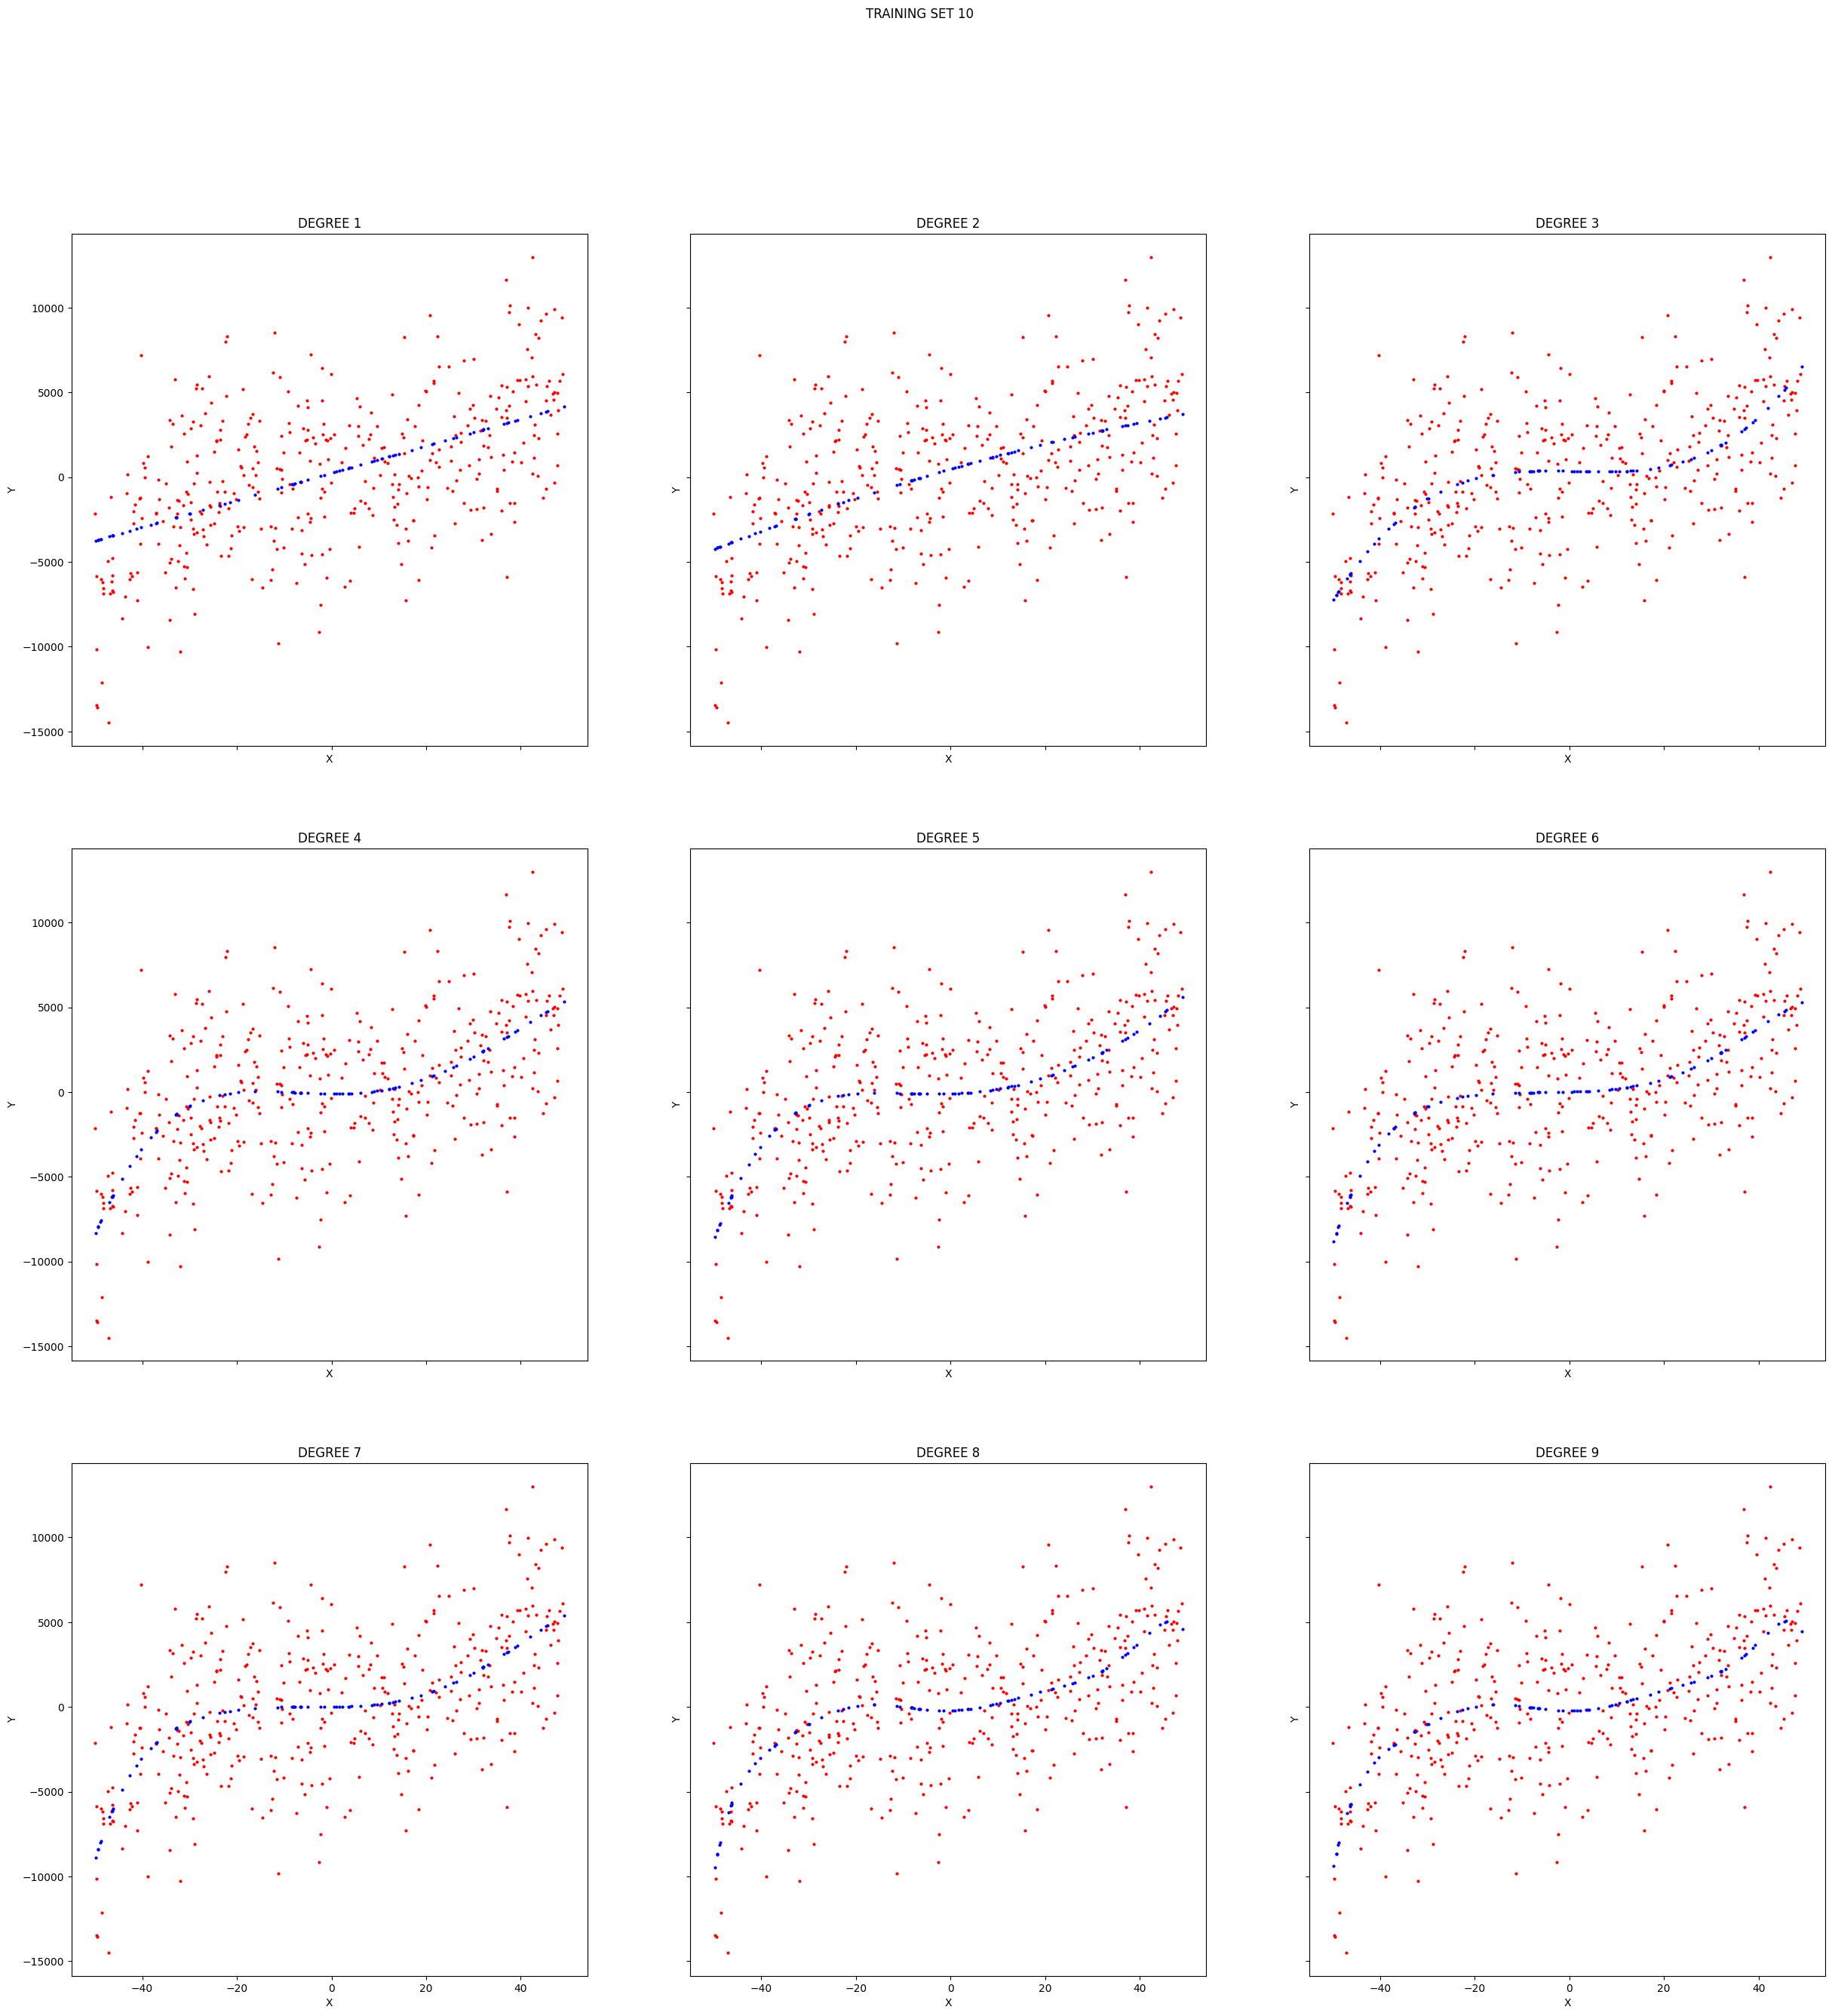

<Figure size 640x480 with 0 Axes>

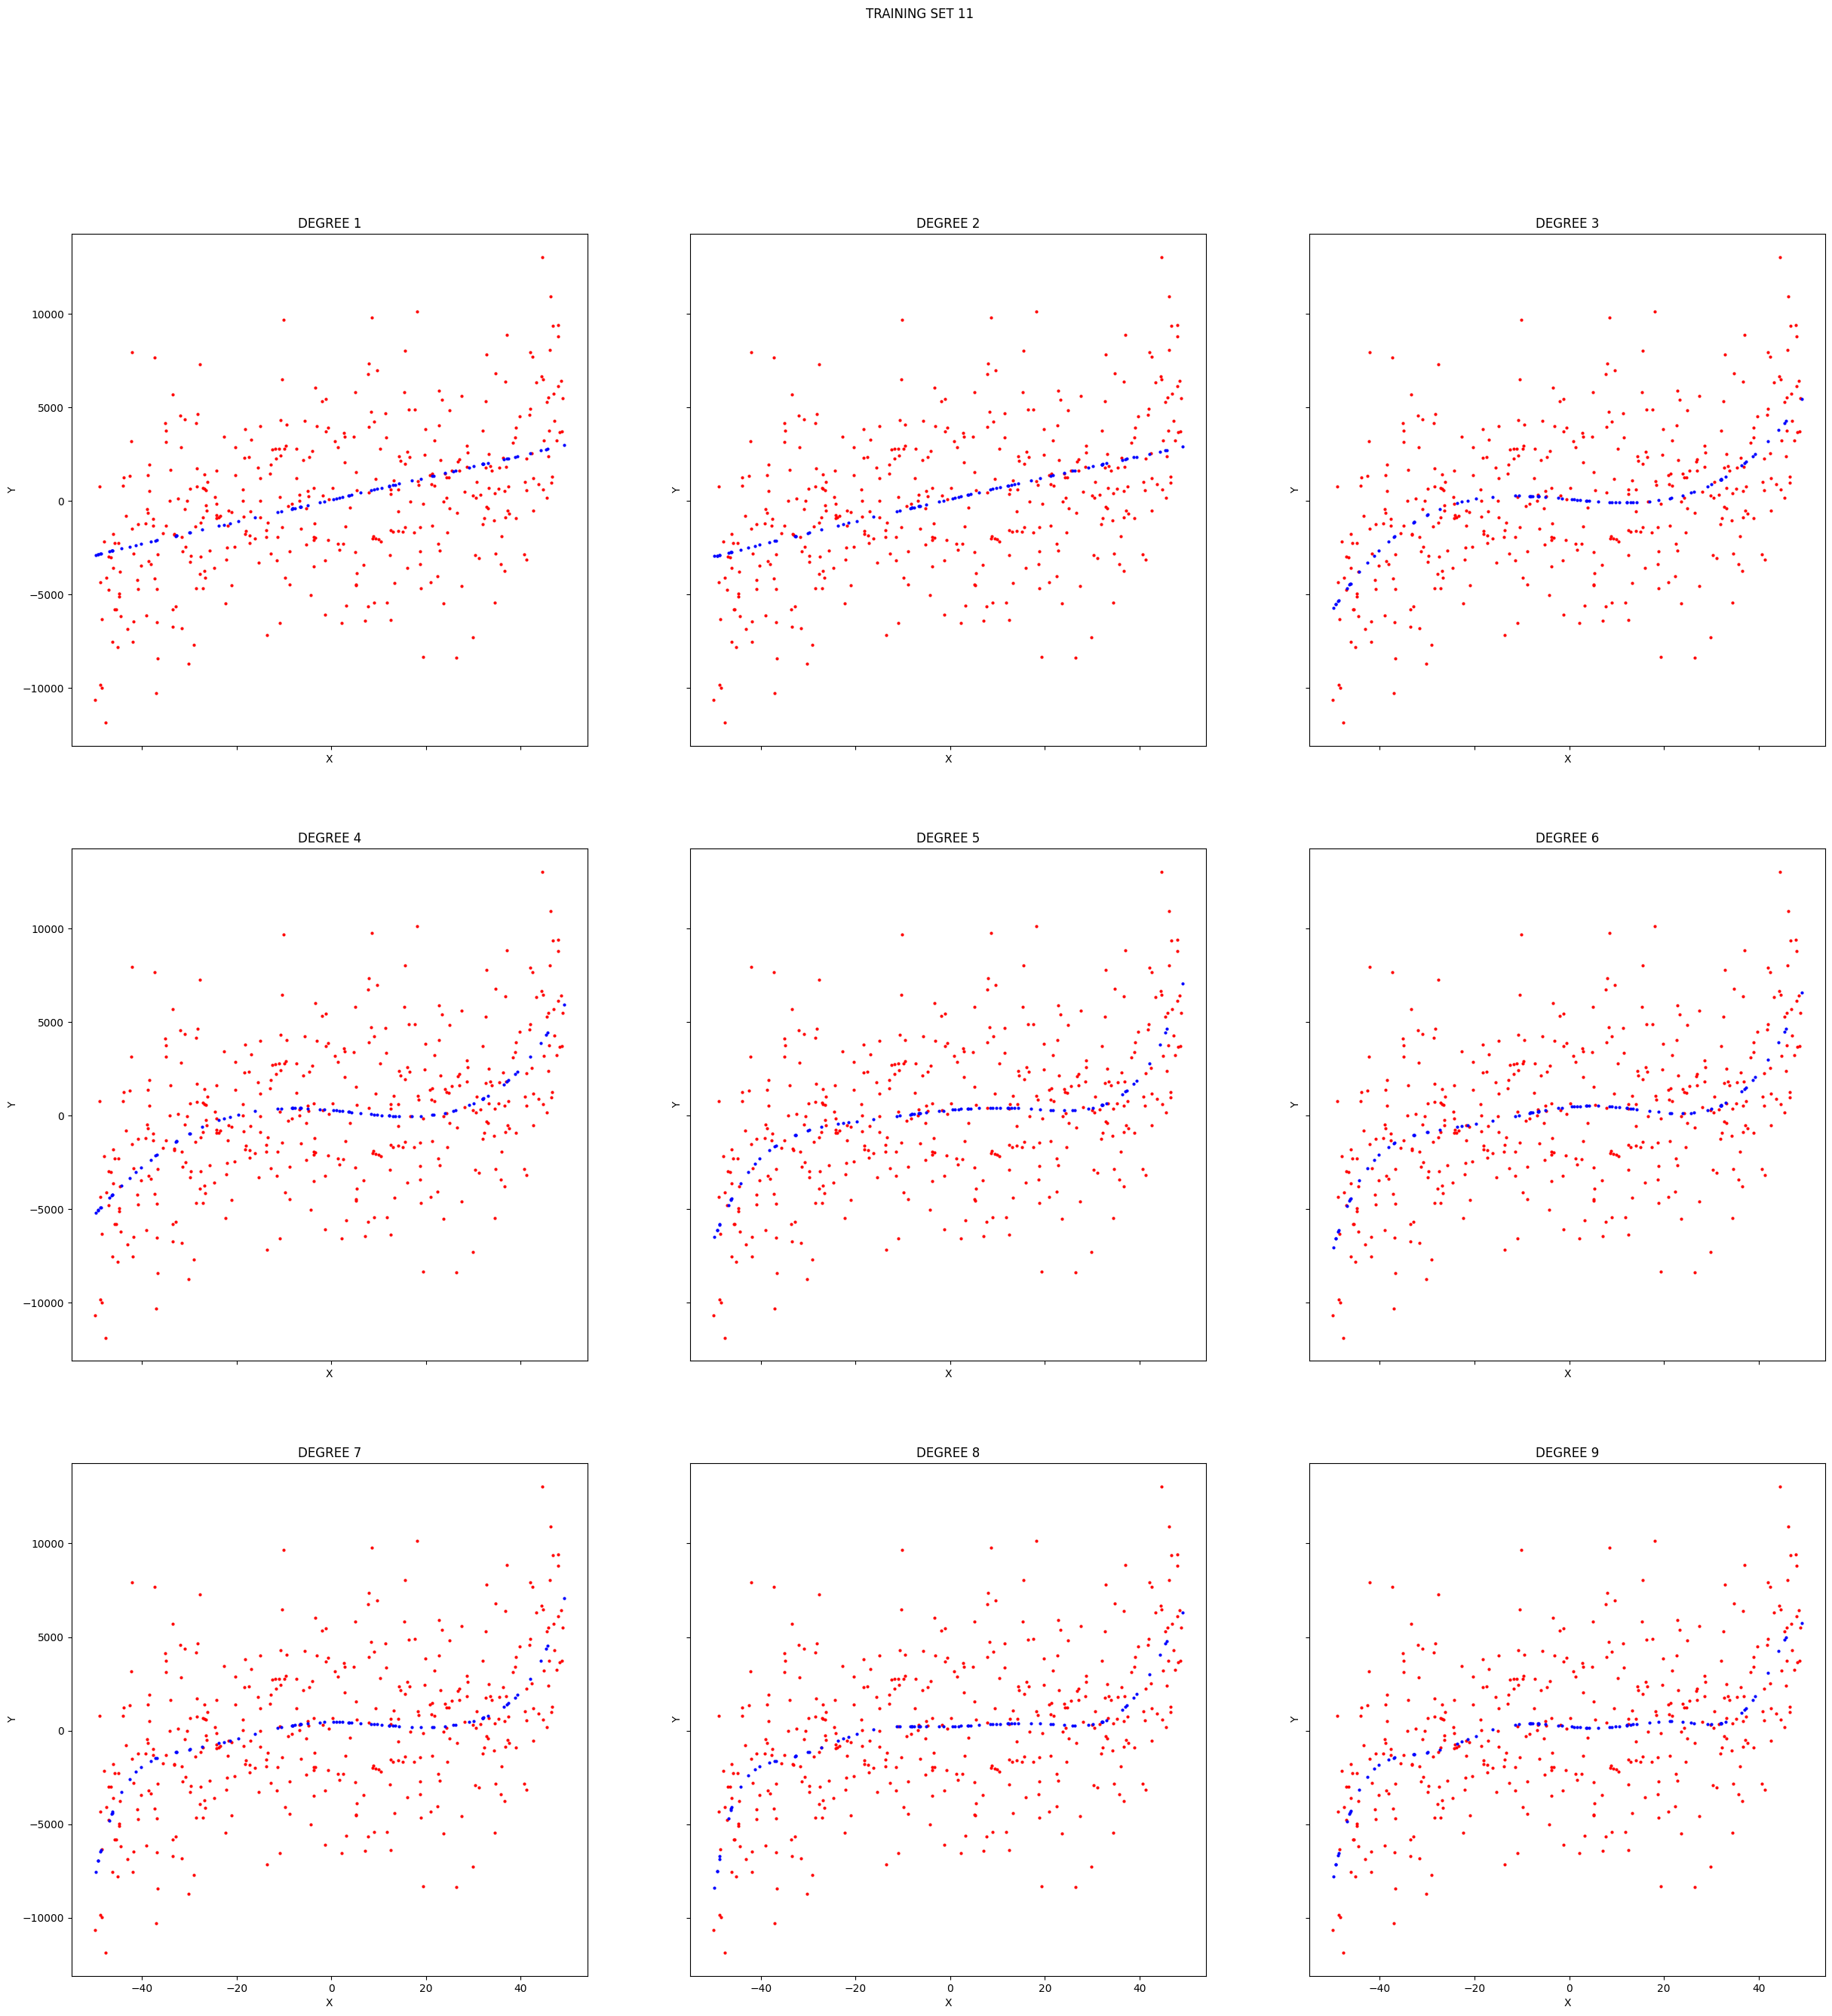

<Figure size 640x480 with 0 Axes>

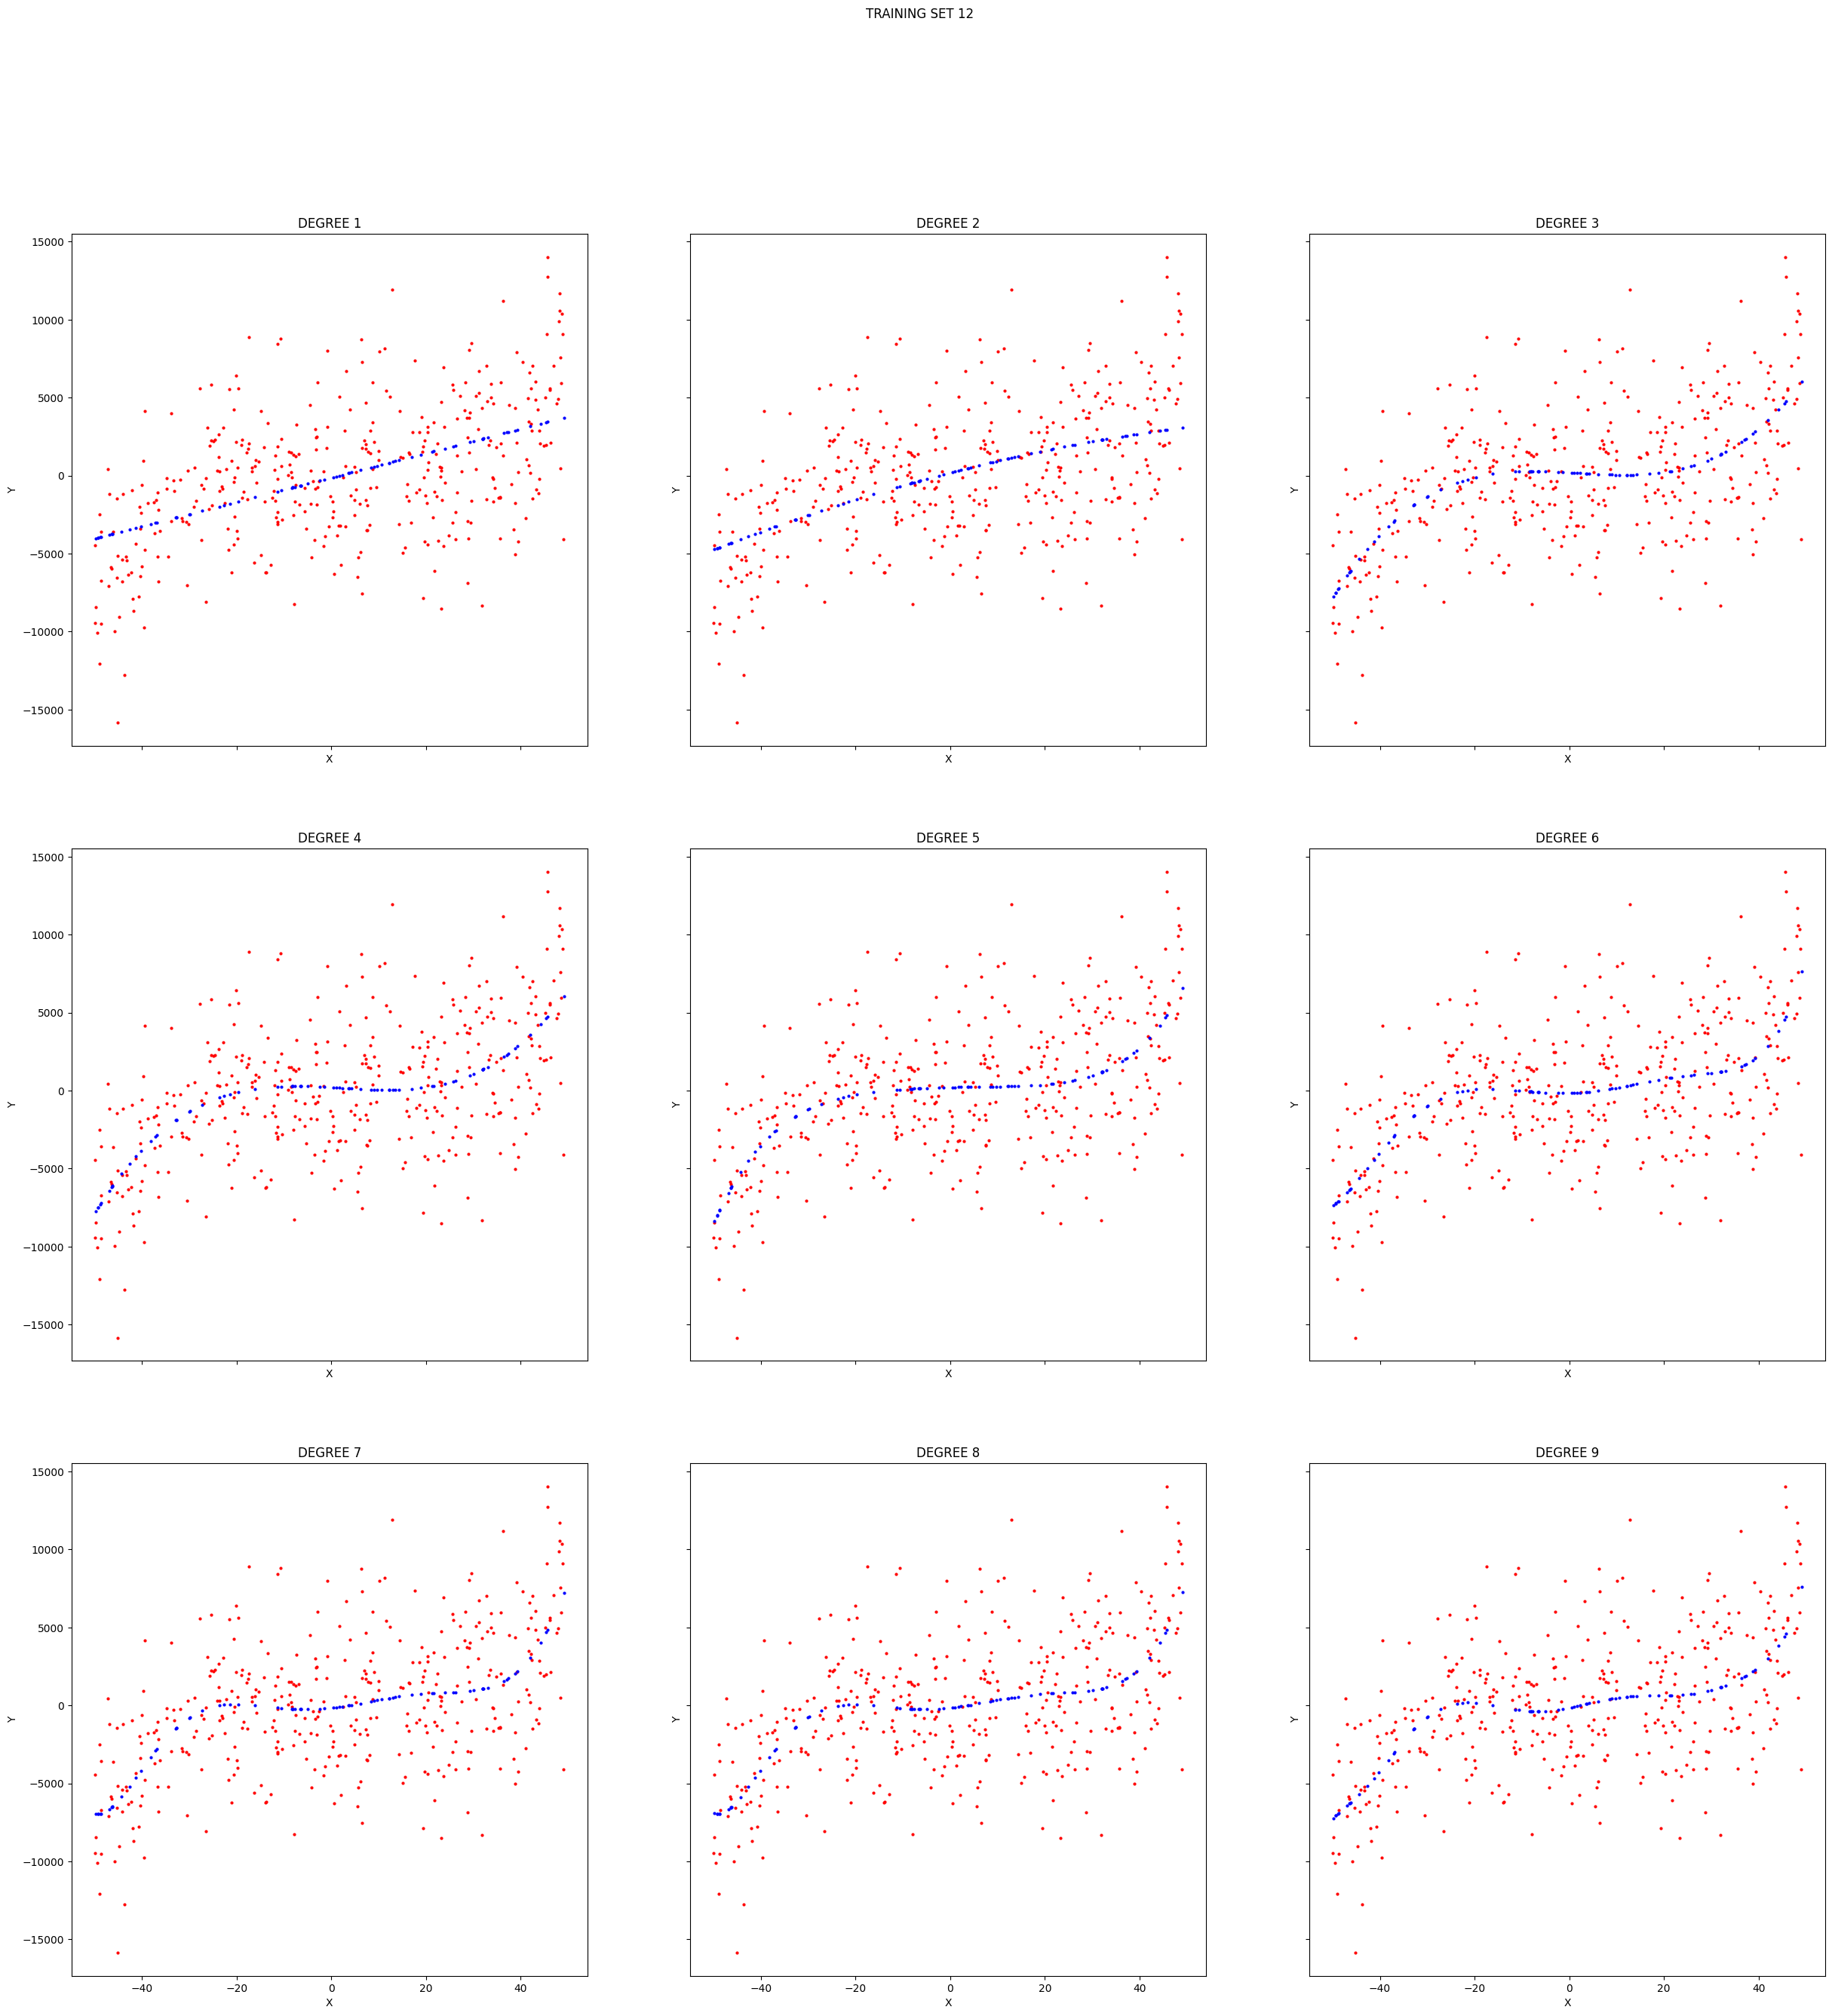

<Figure size 640x480 with 0 Axes>

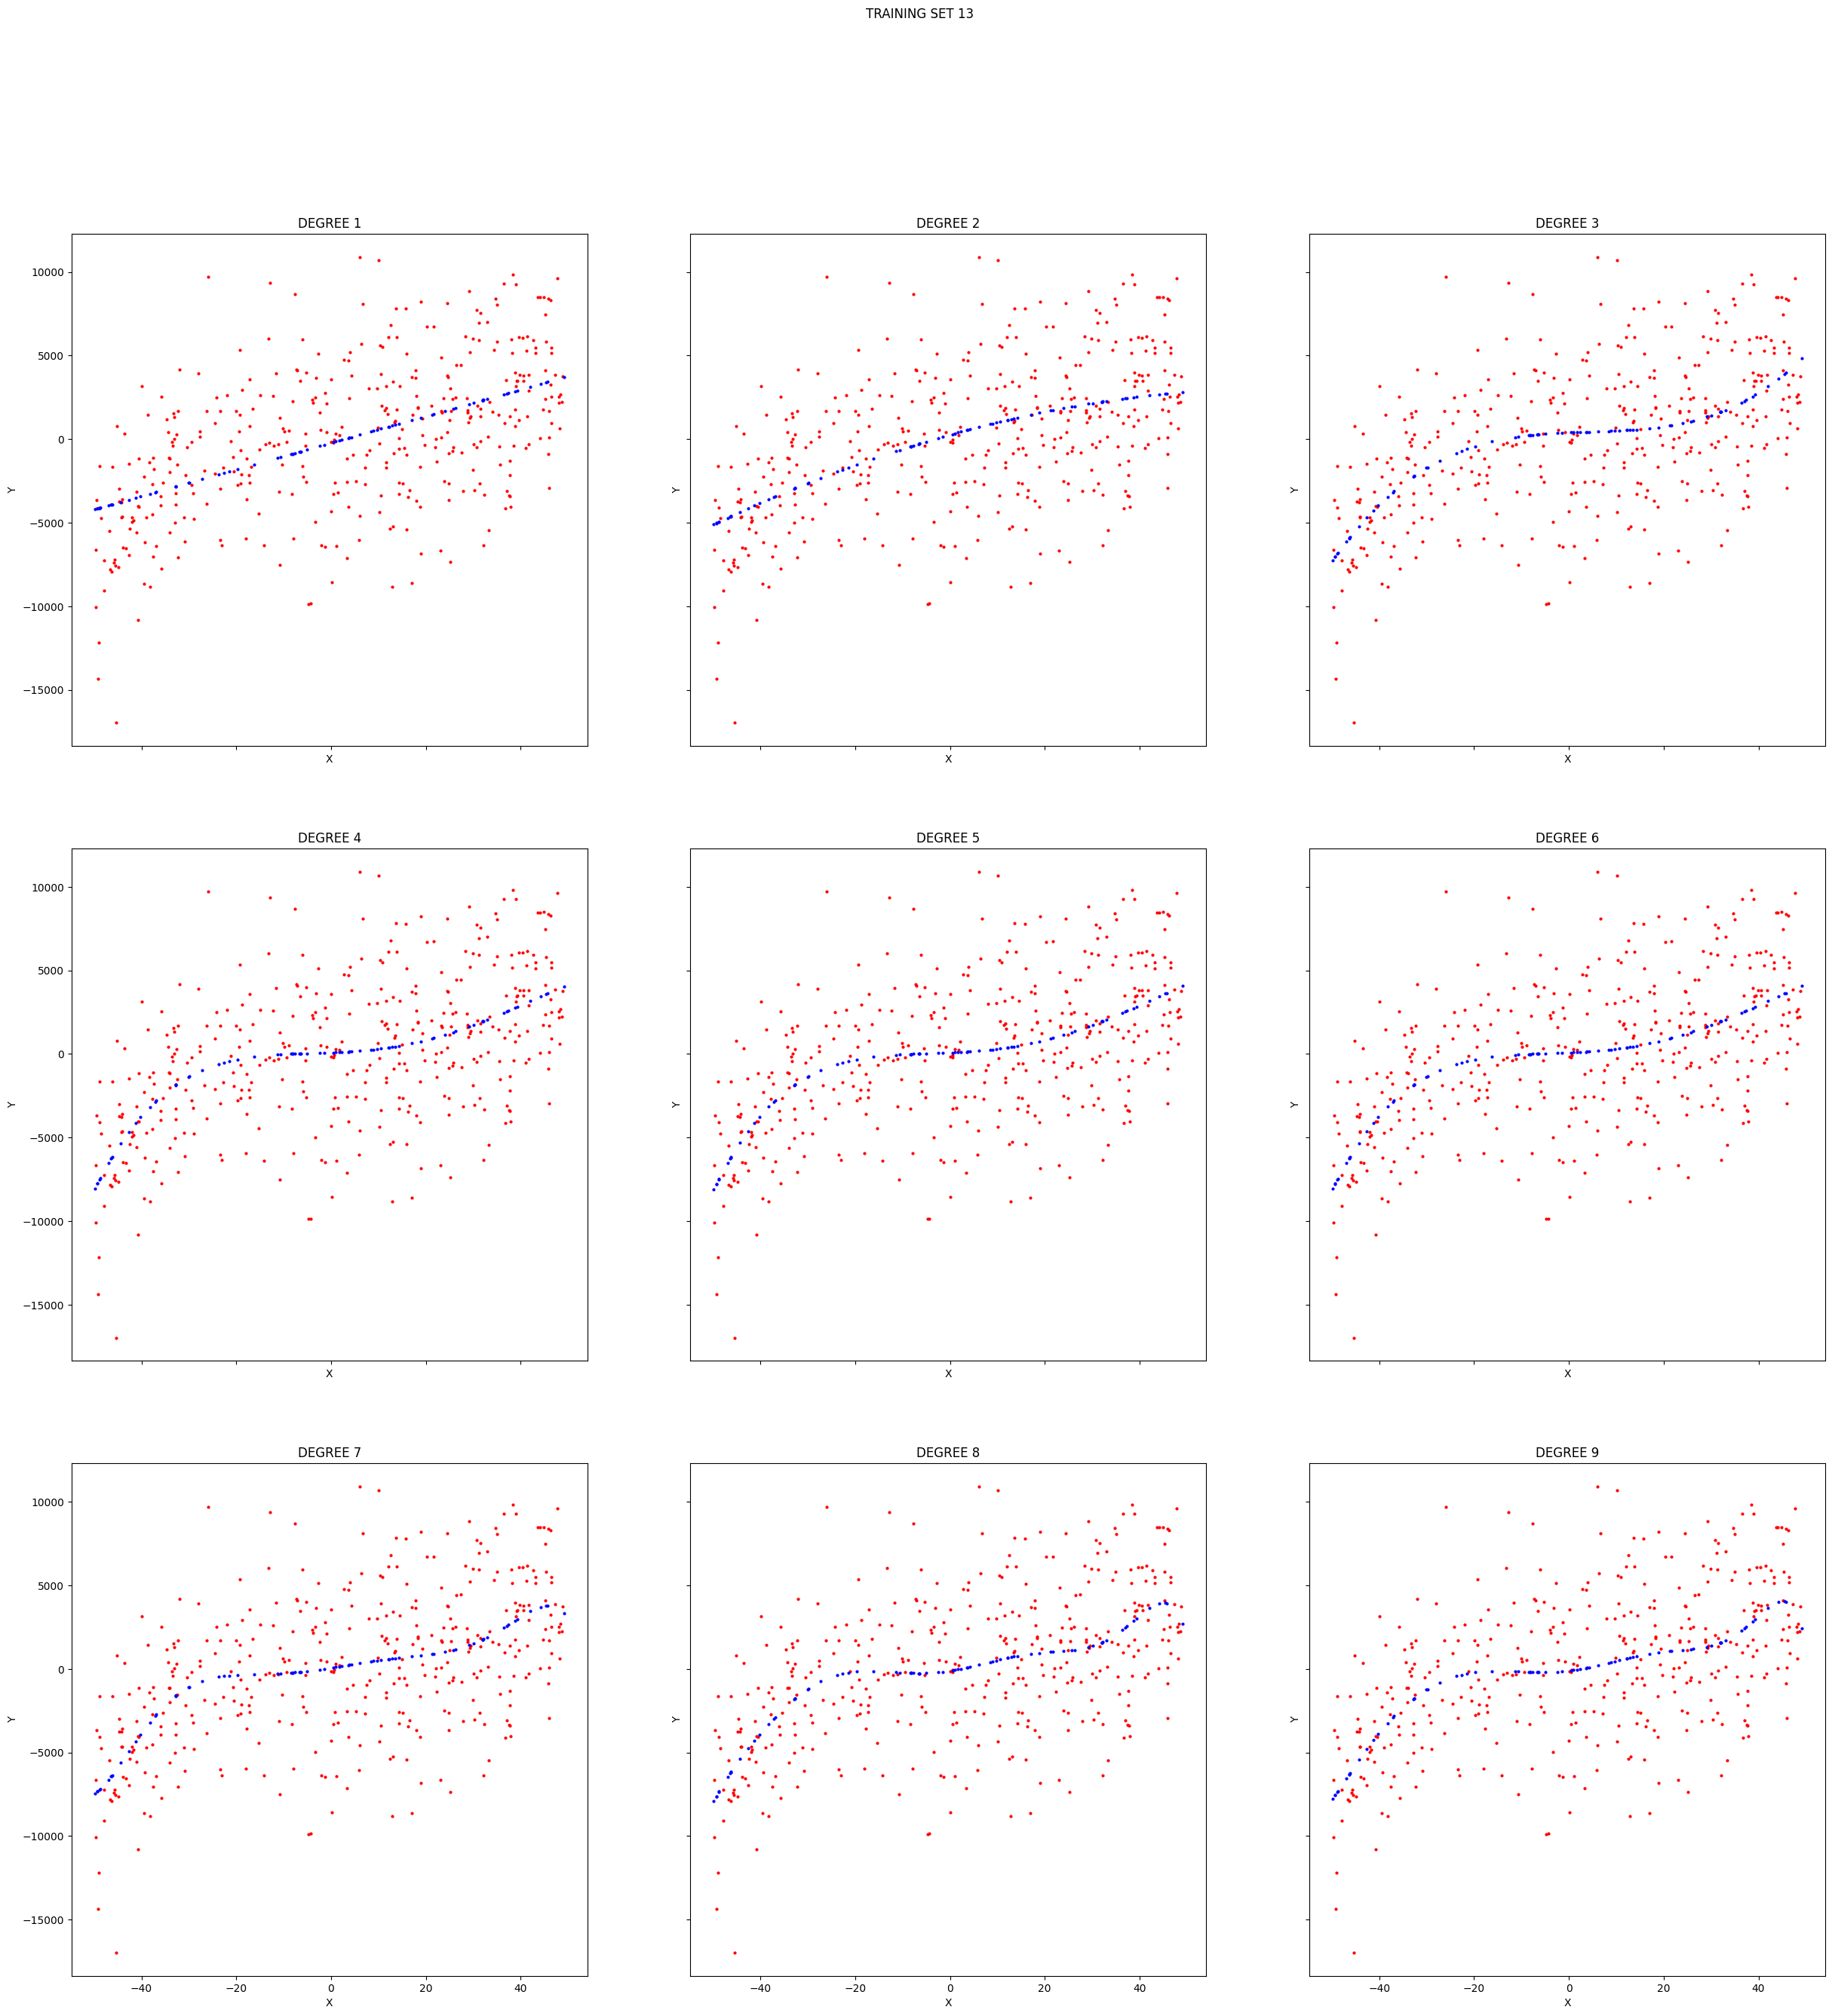

<Figure size 640x480 with 0 Axes>

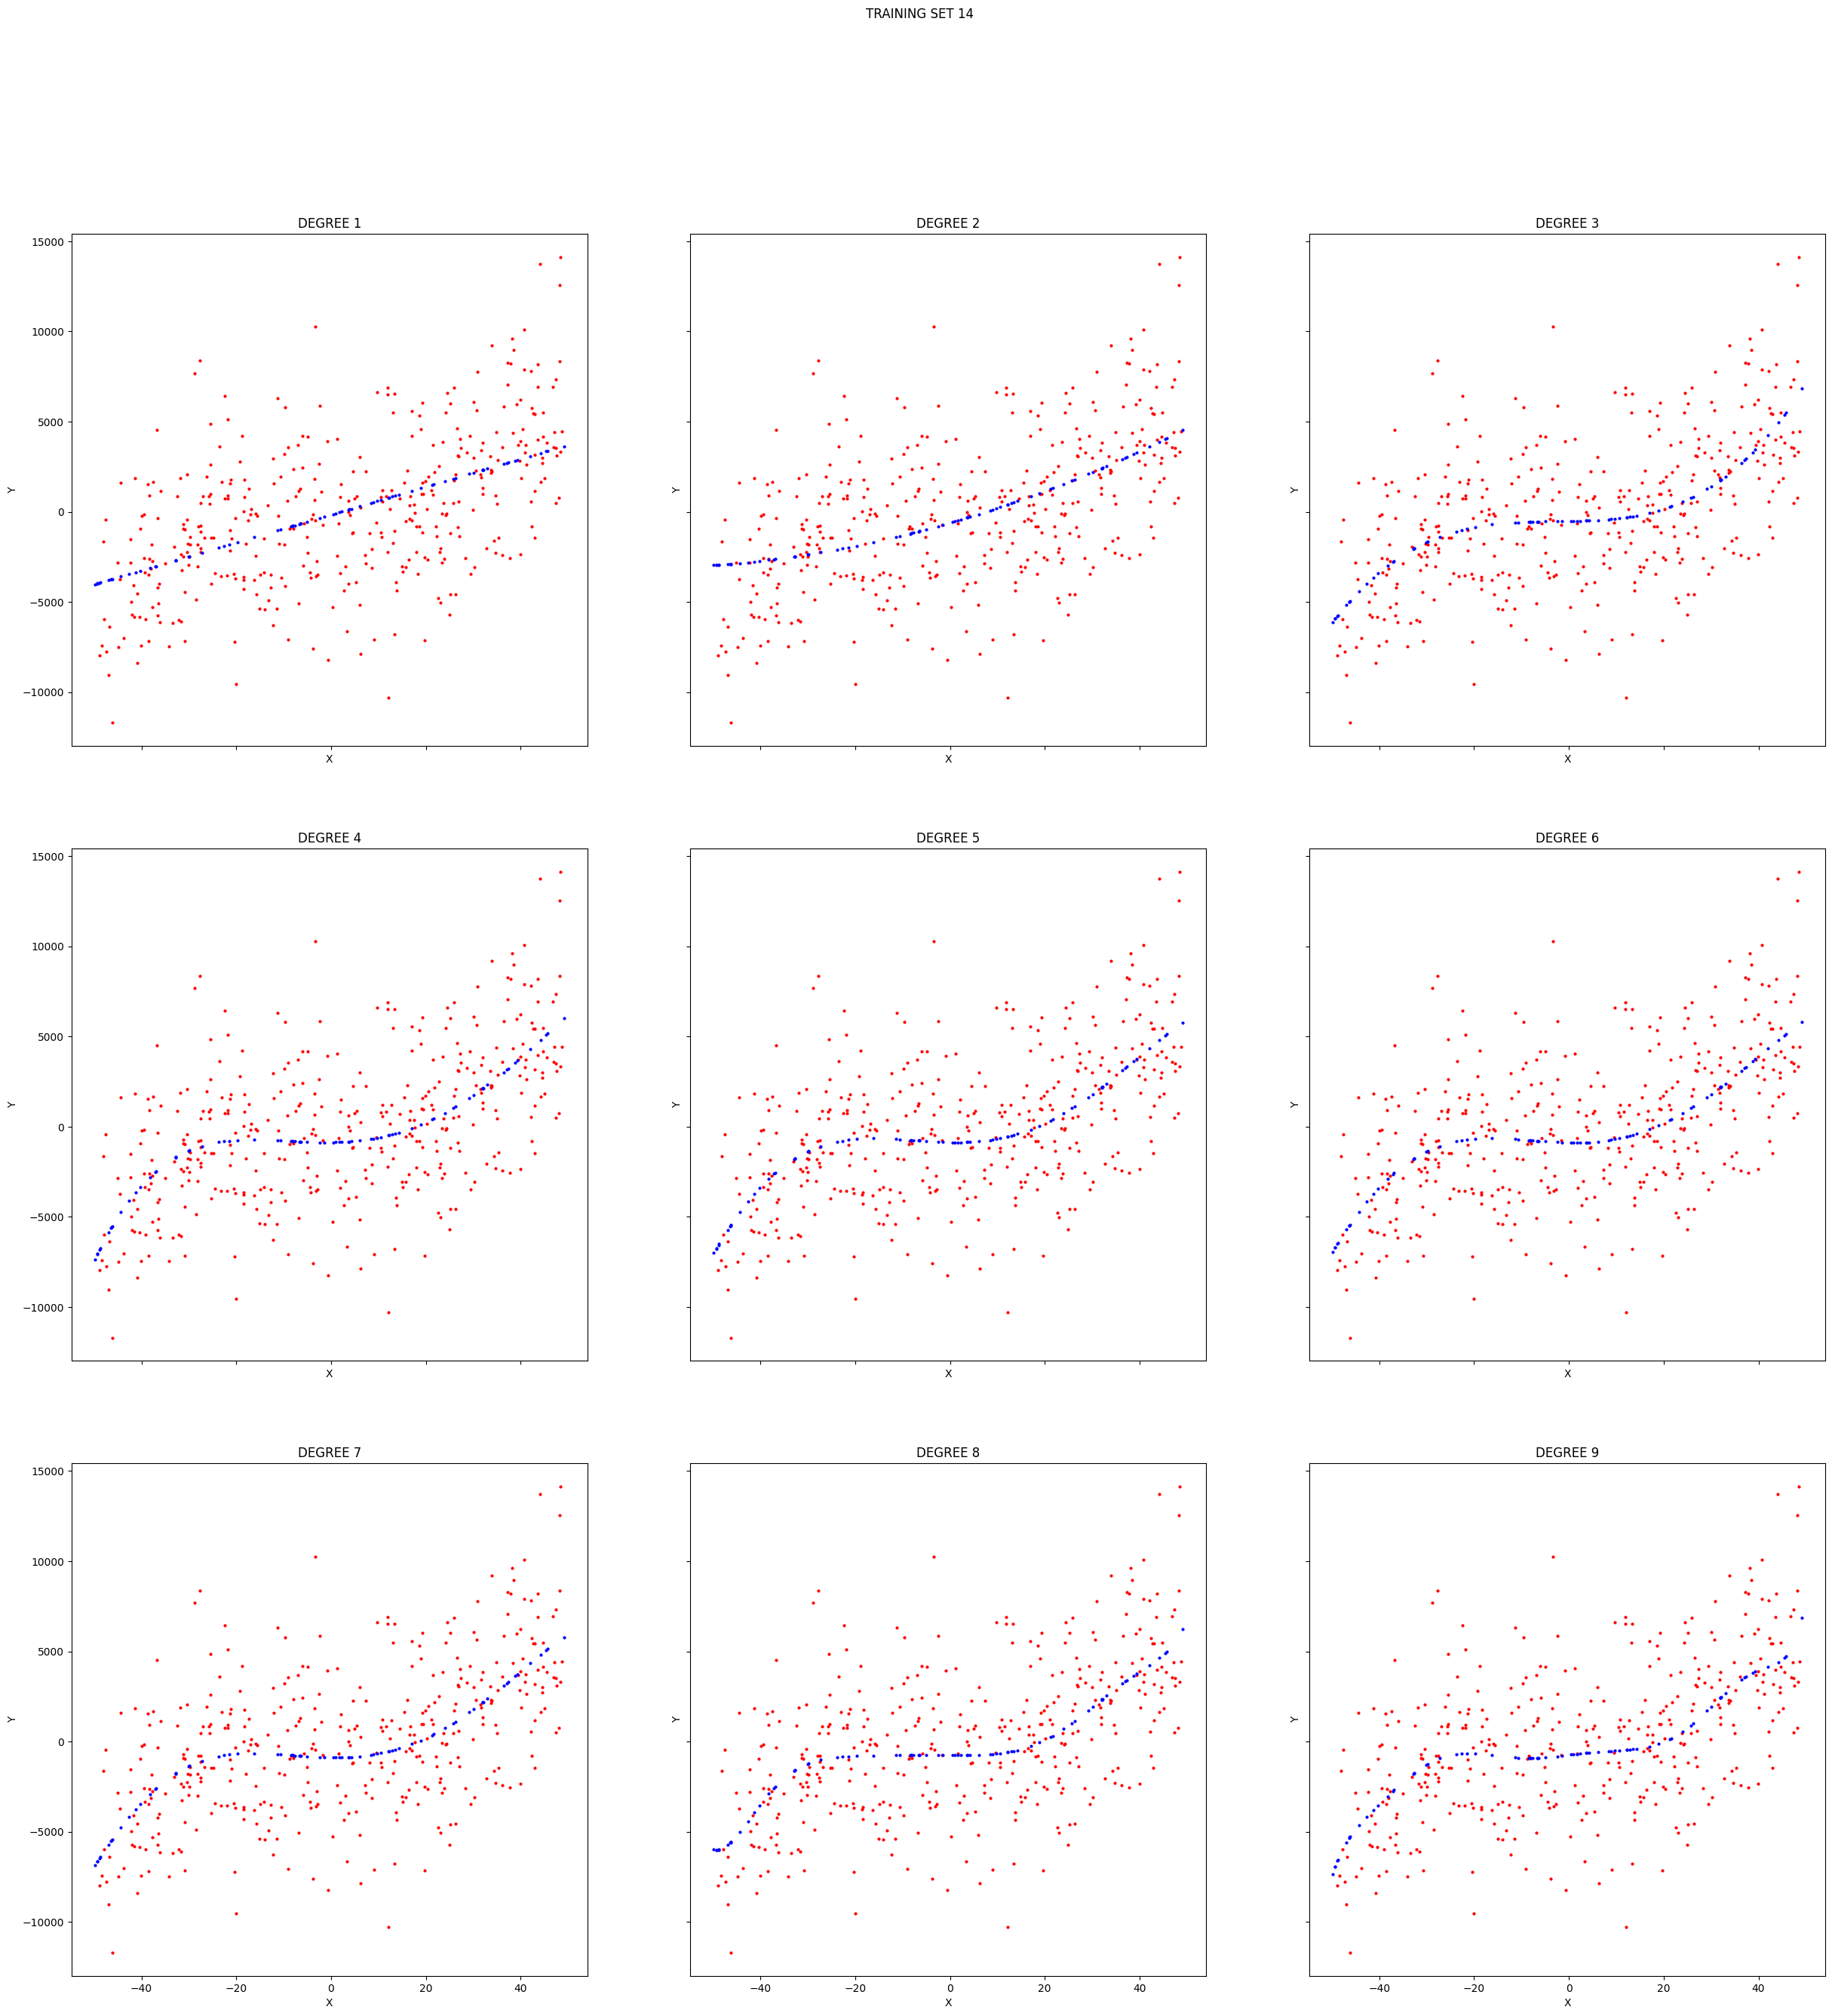

<Figure size 640x480 with 0 Axes>

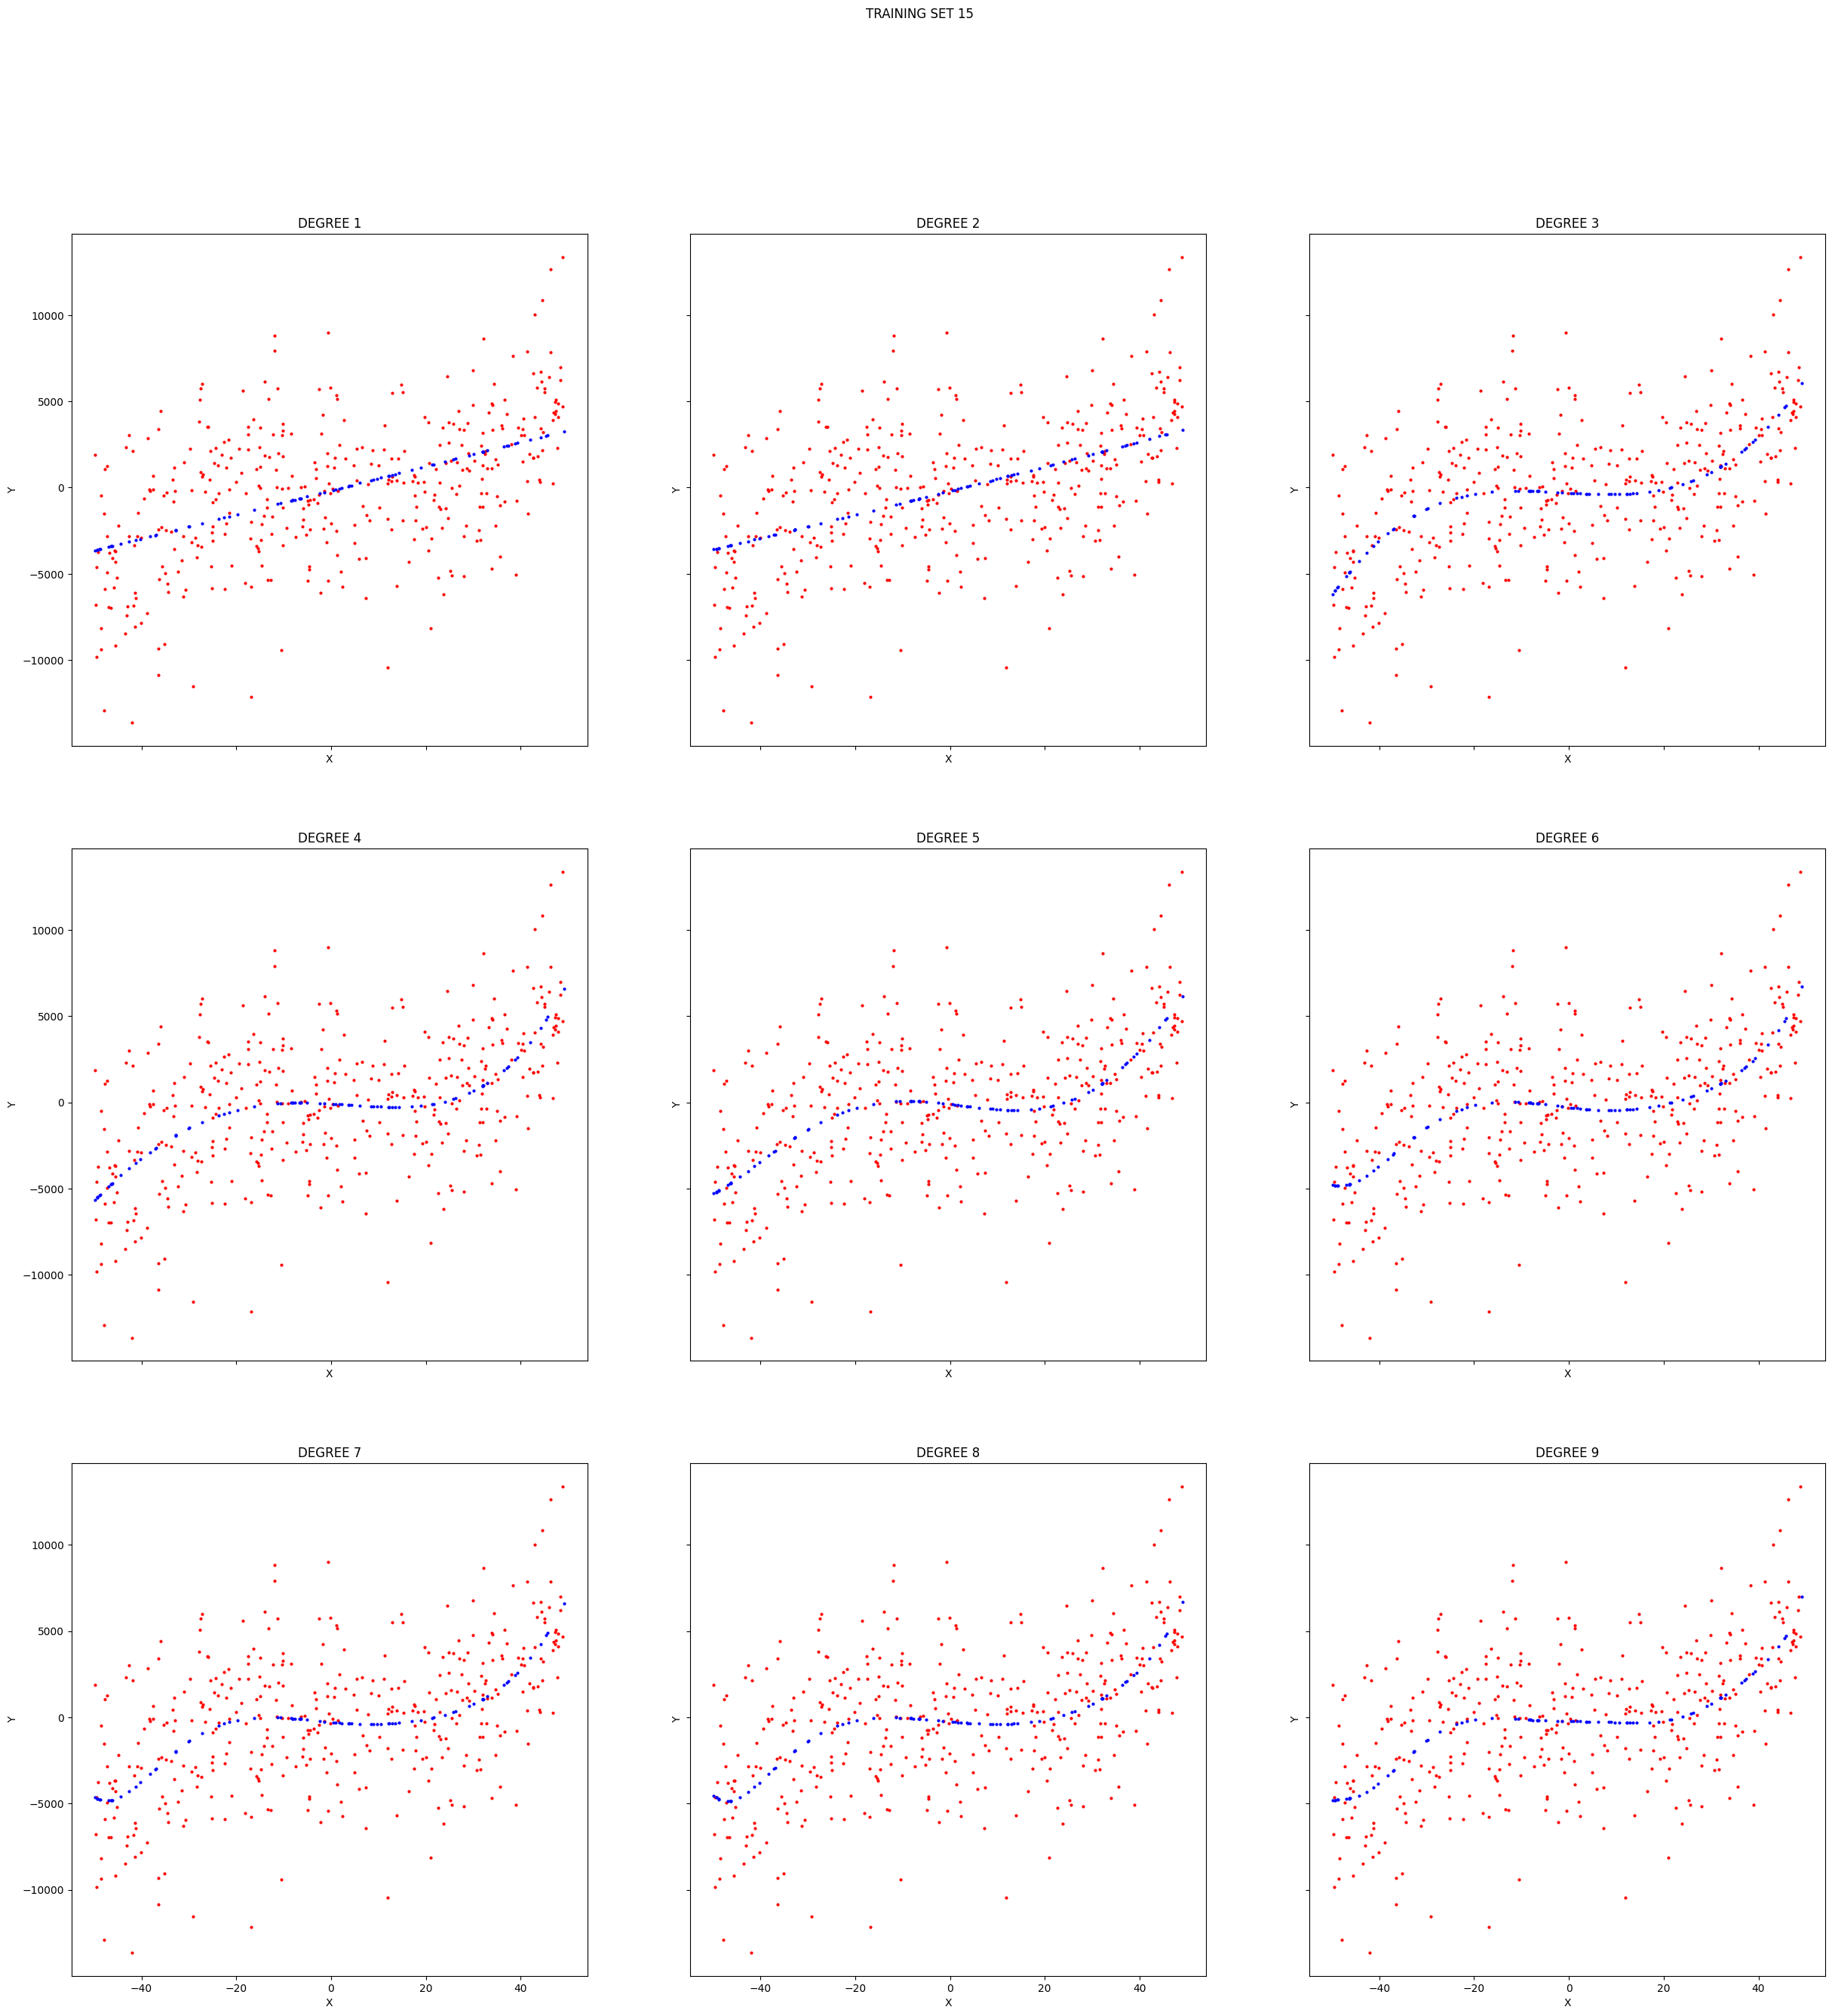

<Figure size 640x480 with 0 Axes>

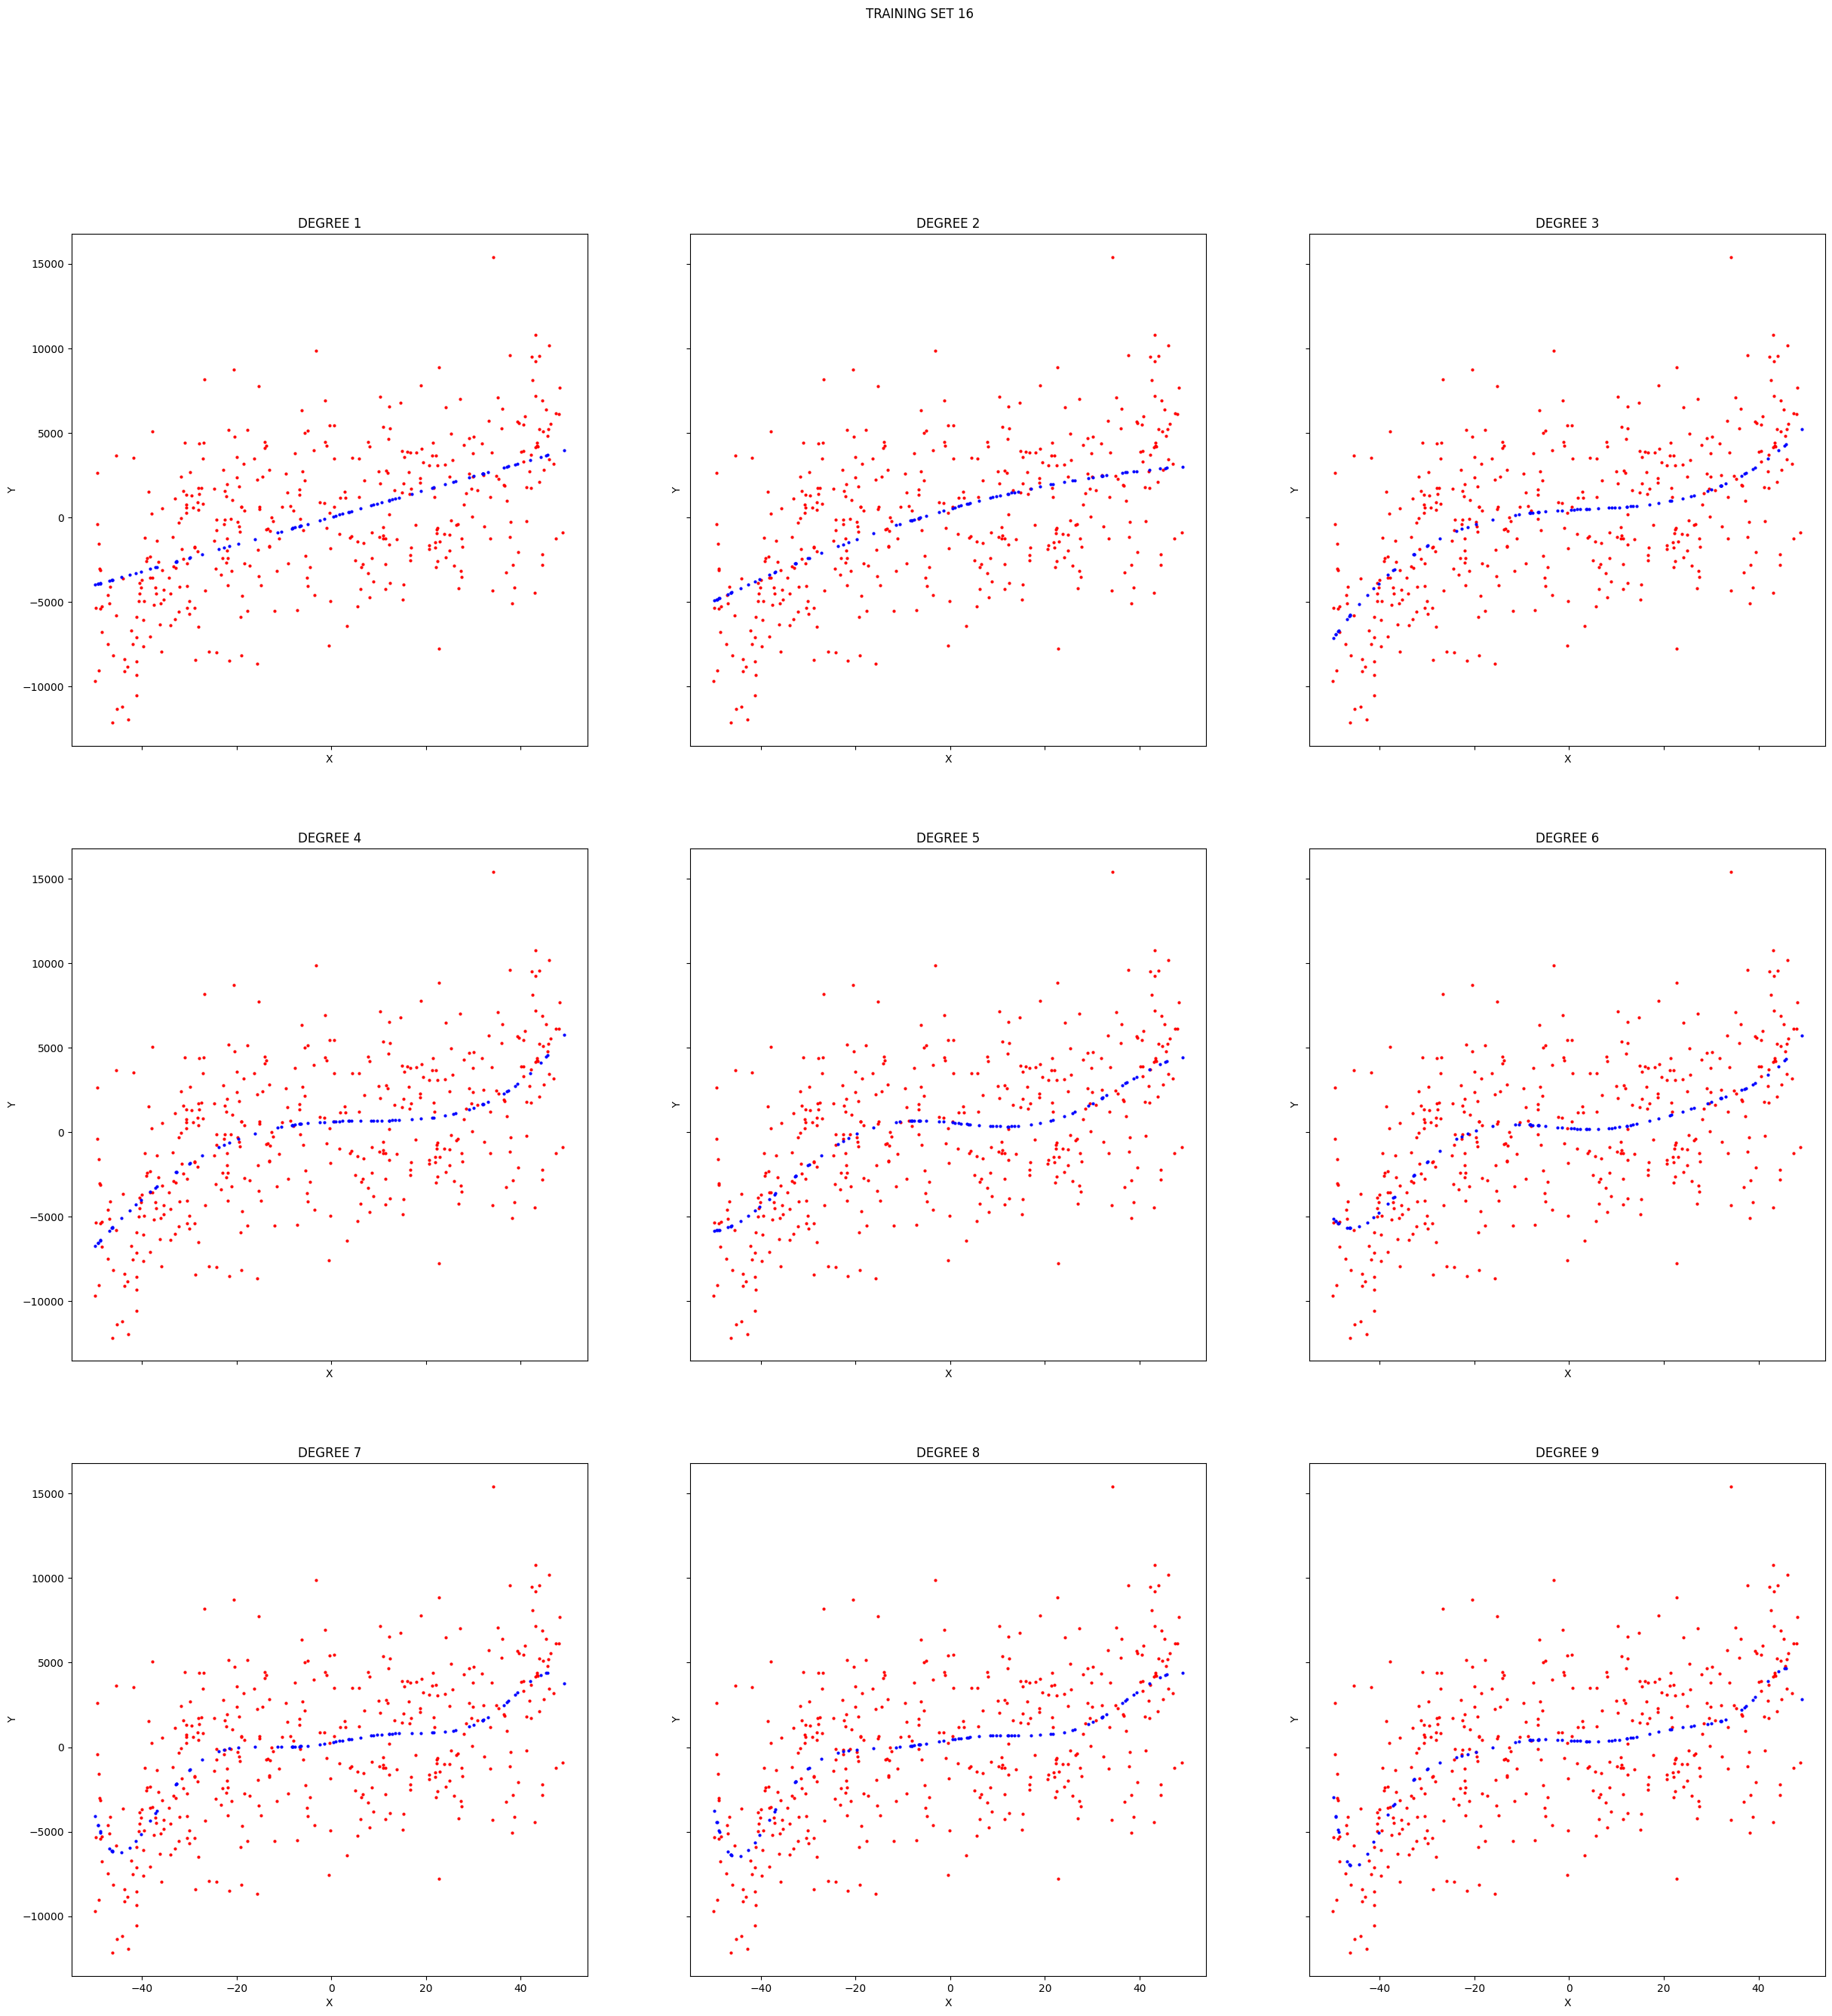

<Figure size 640x480 with 0 Axes>

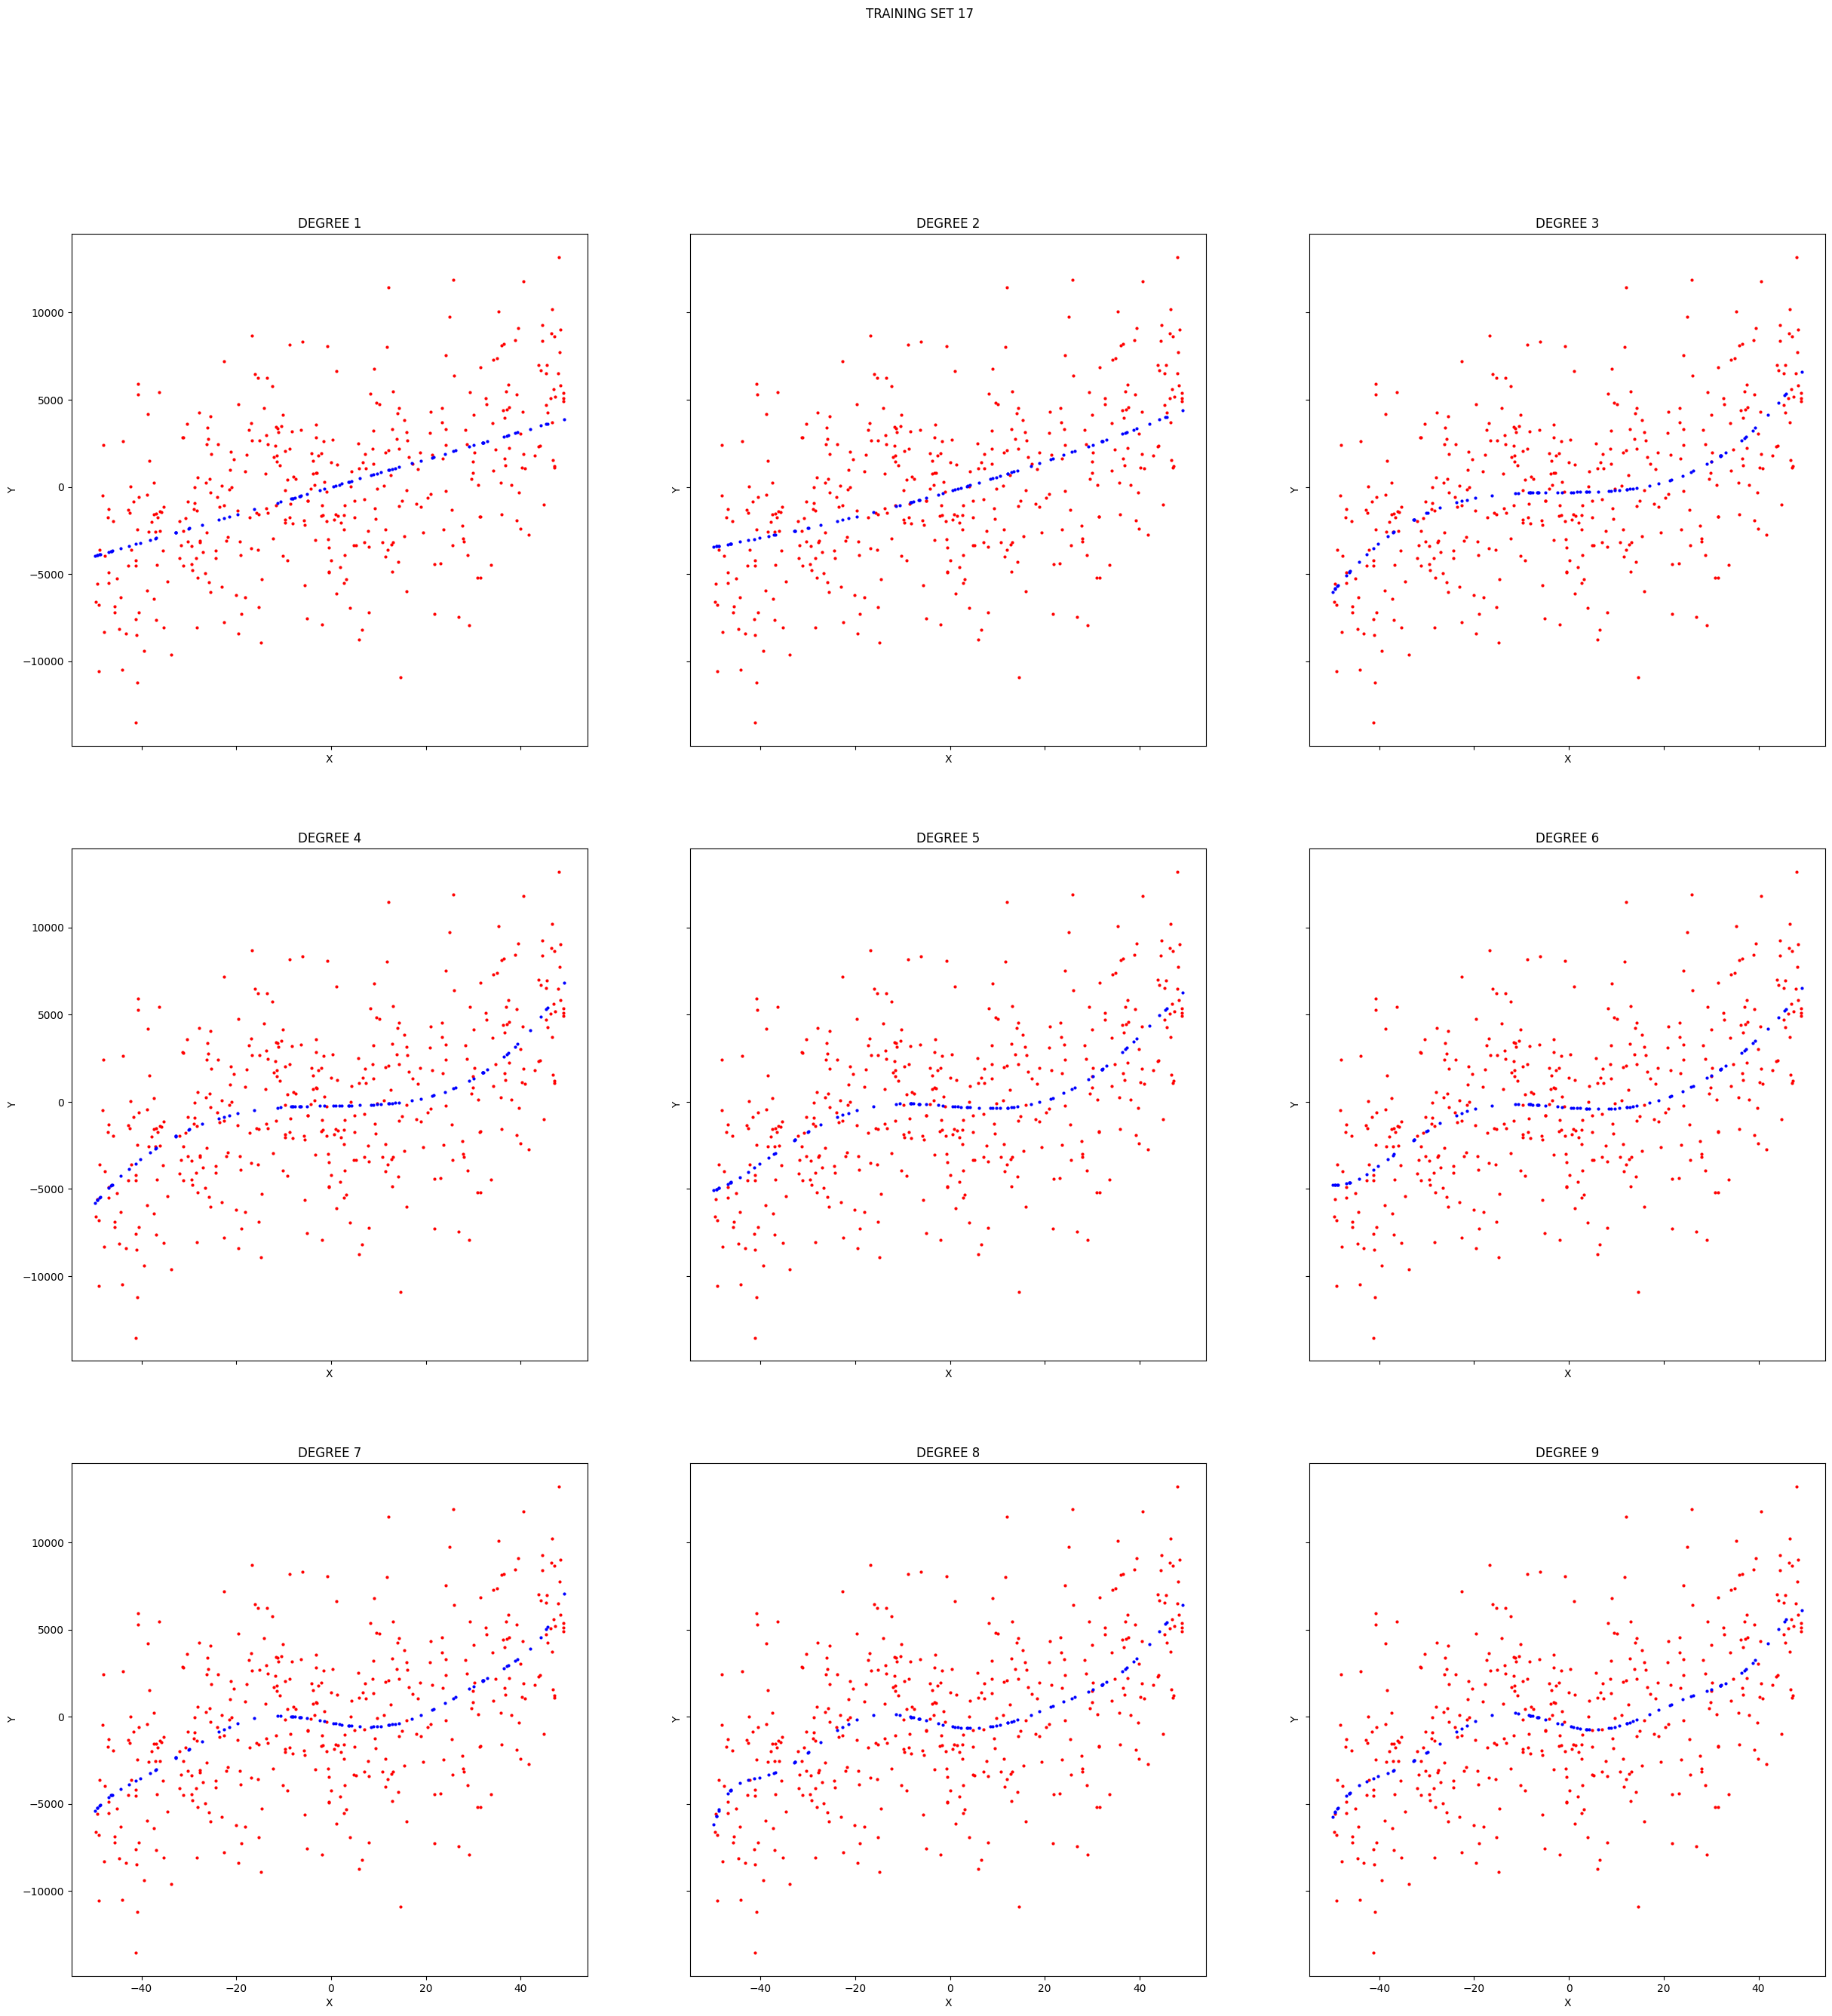

<Figure size 640x480 with 0 Axes>

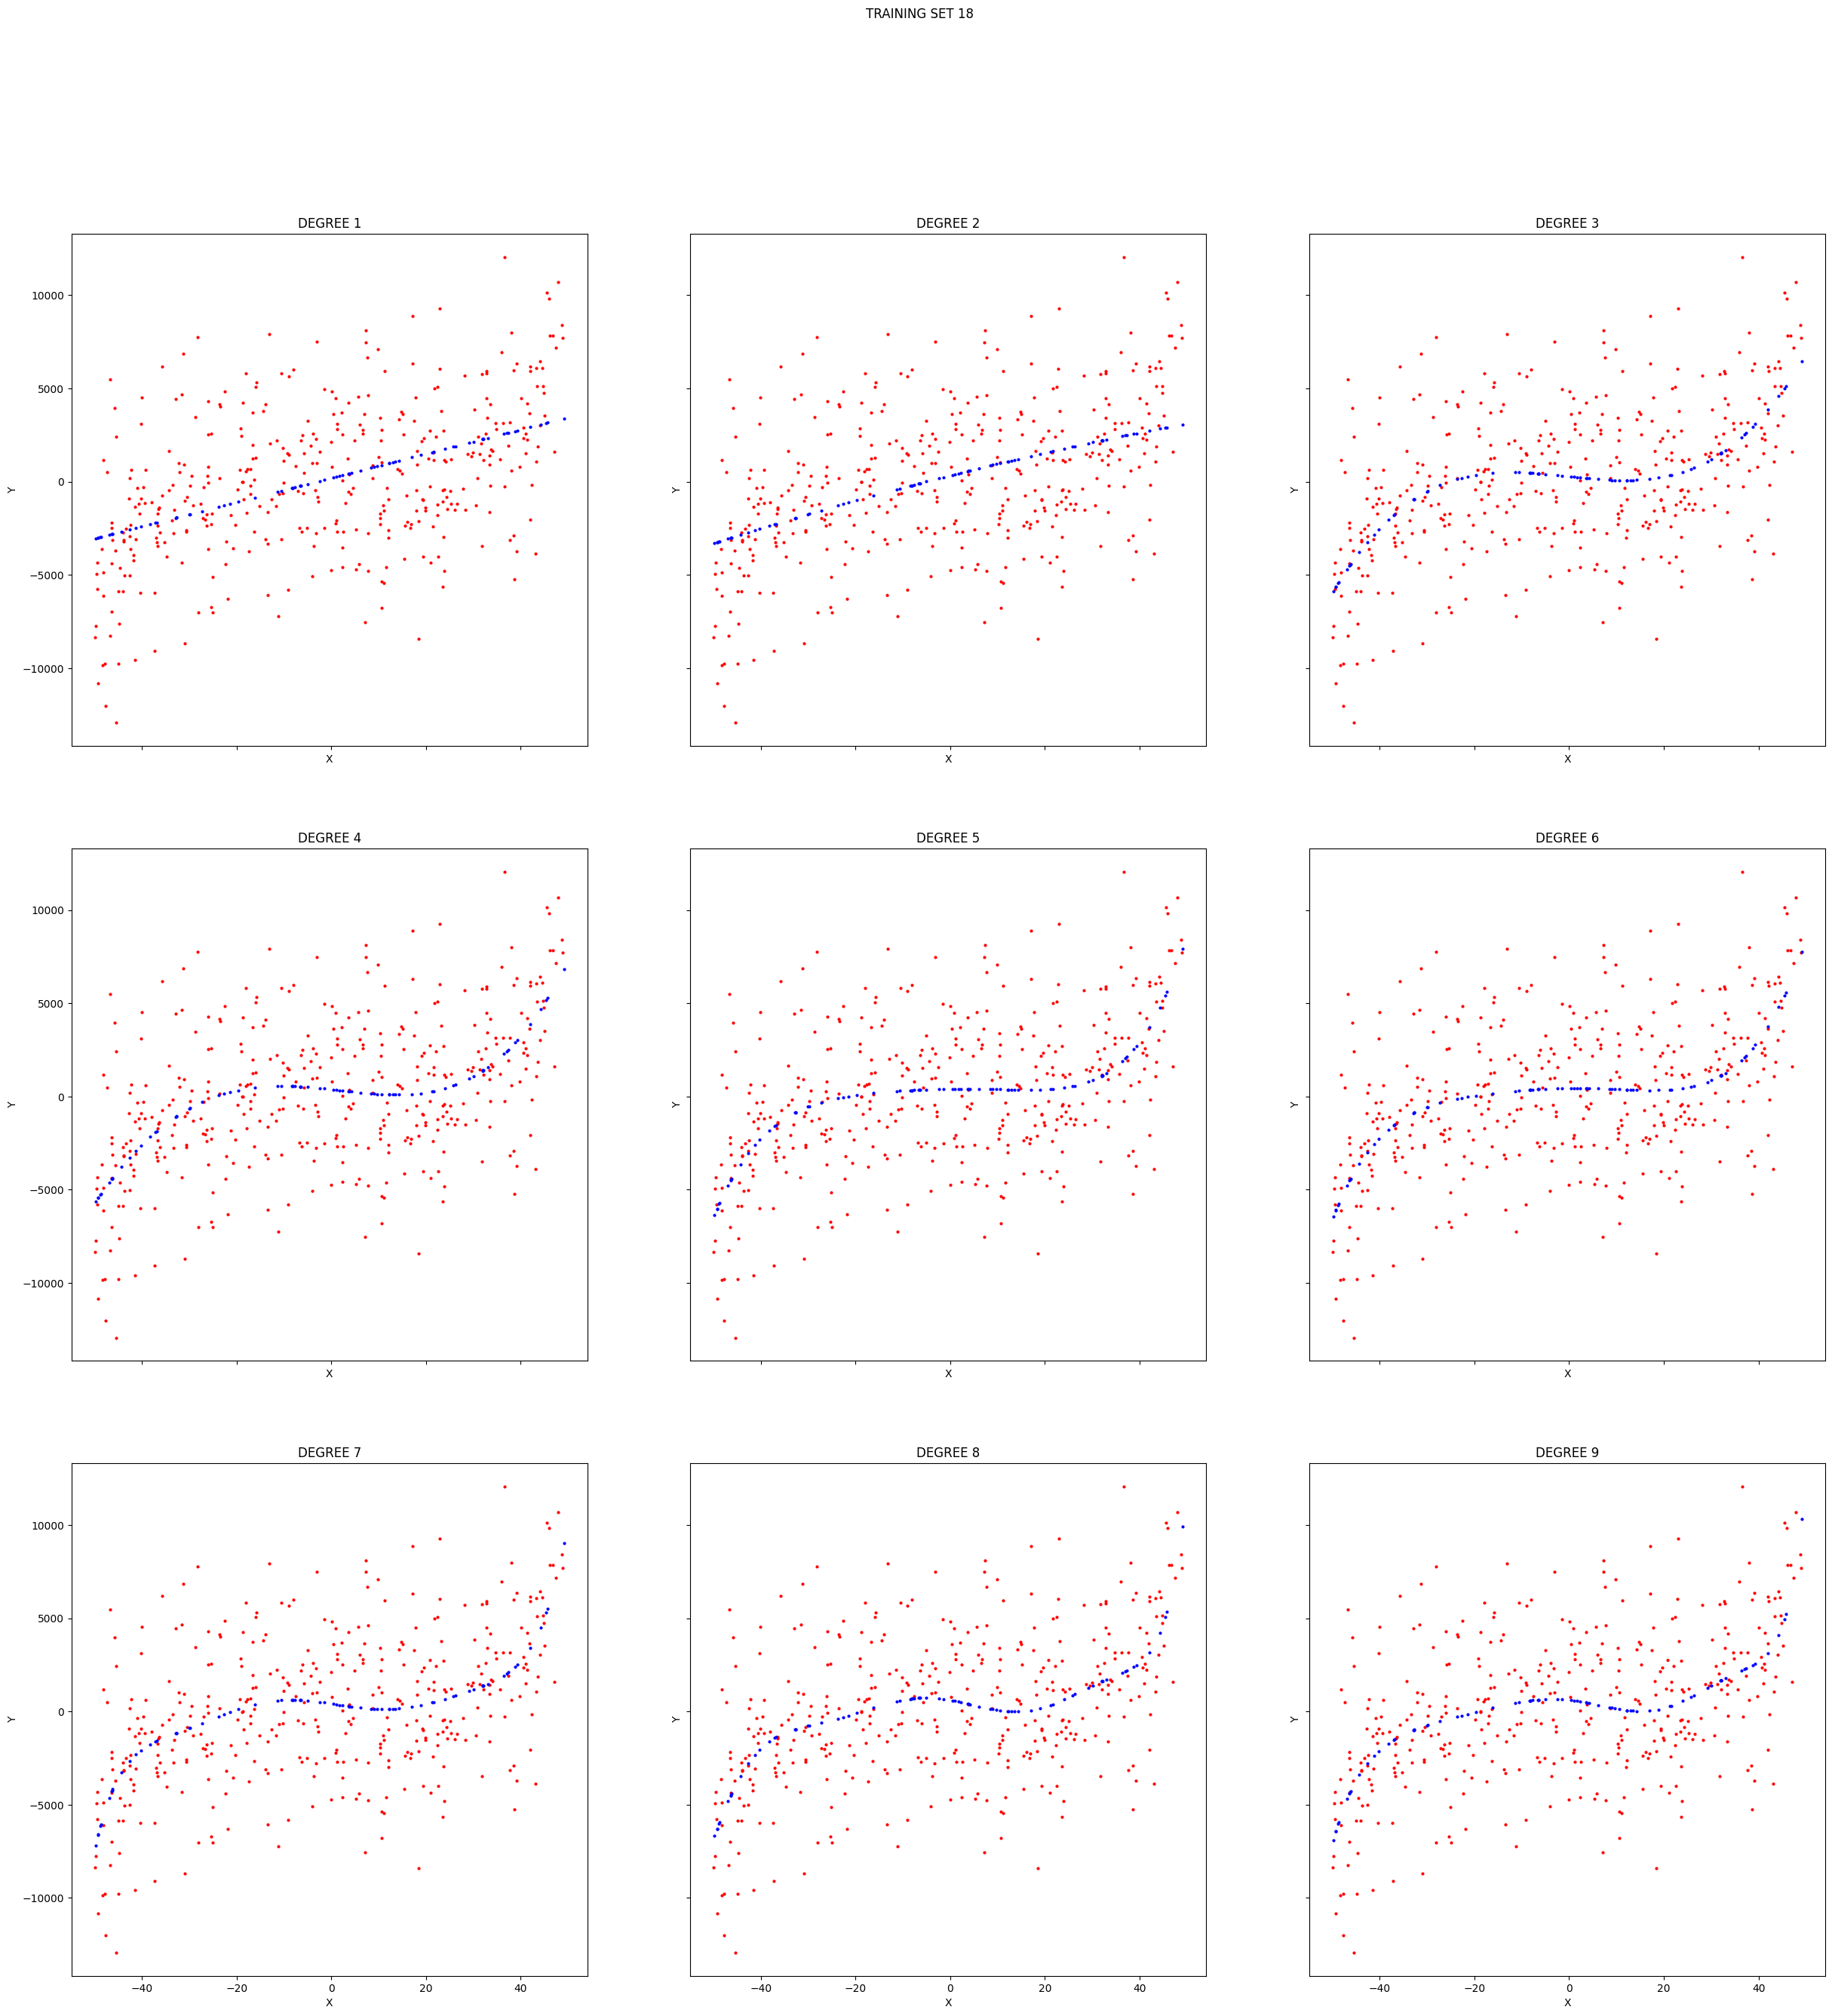

<Figure size 640x480 with 0 Axes>

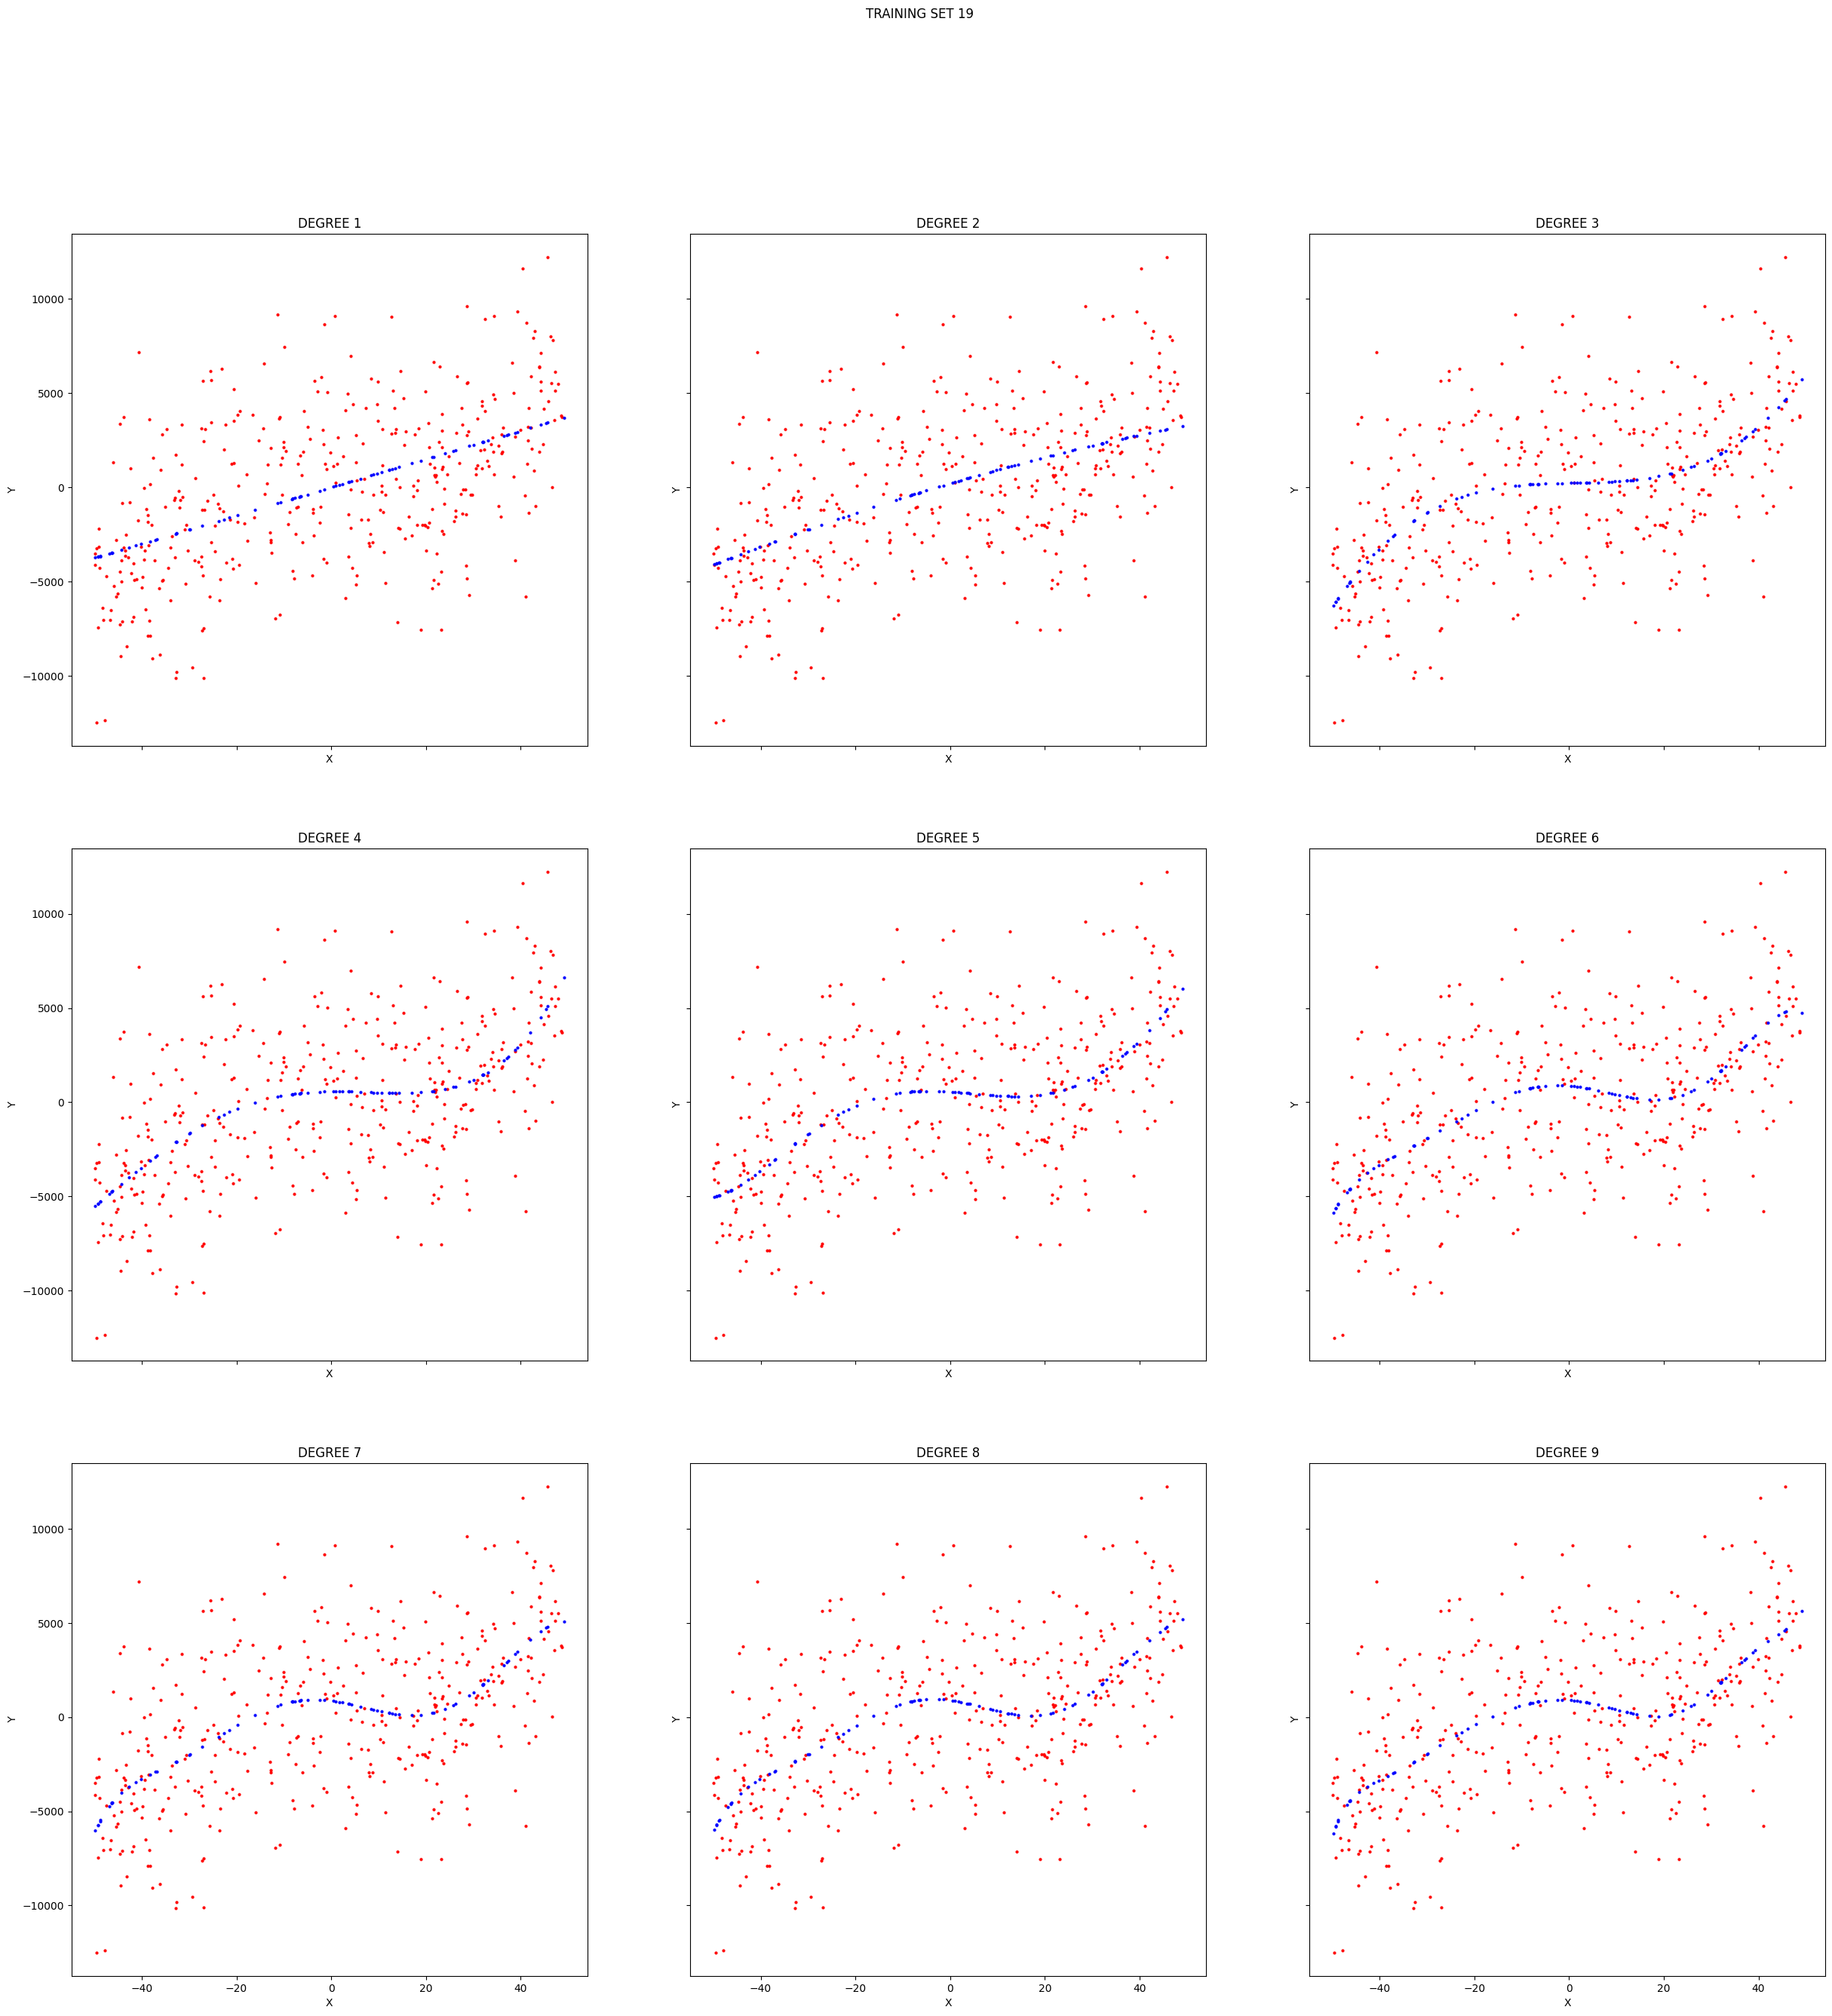

<Figure size 640x480 with 0 Axes>

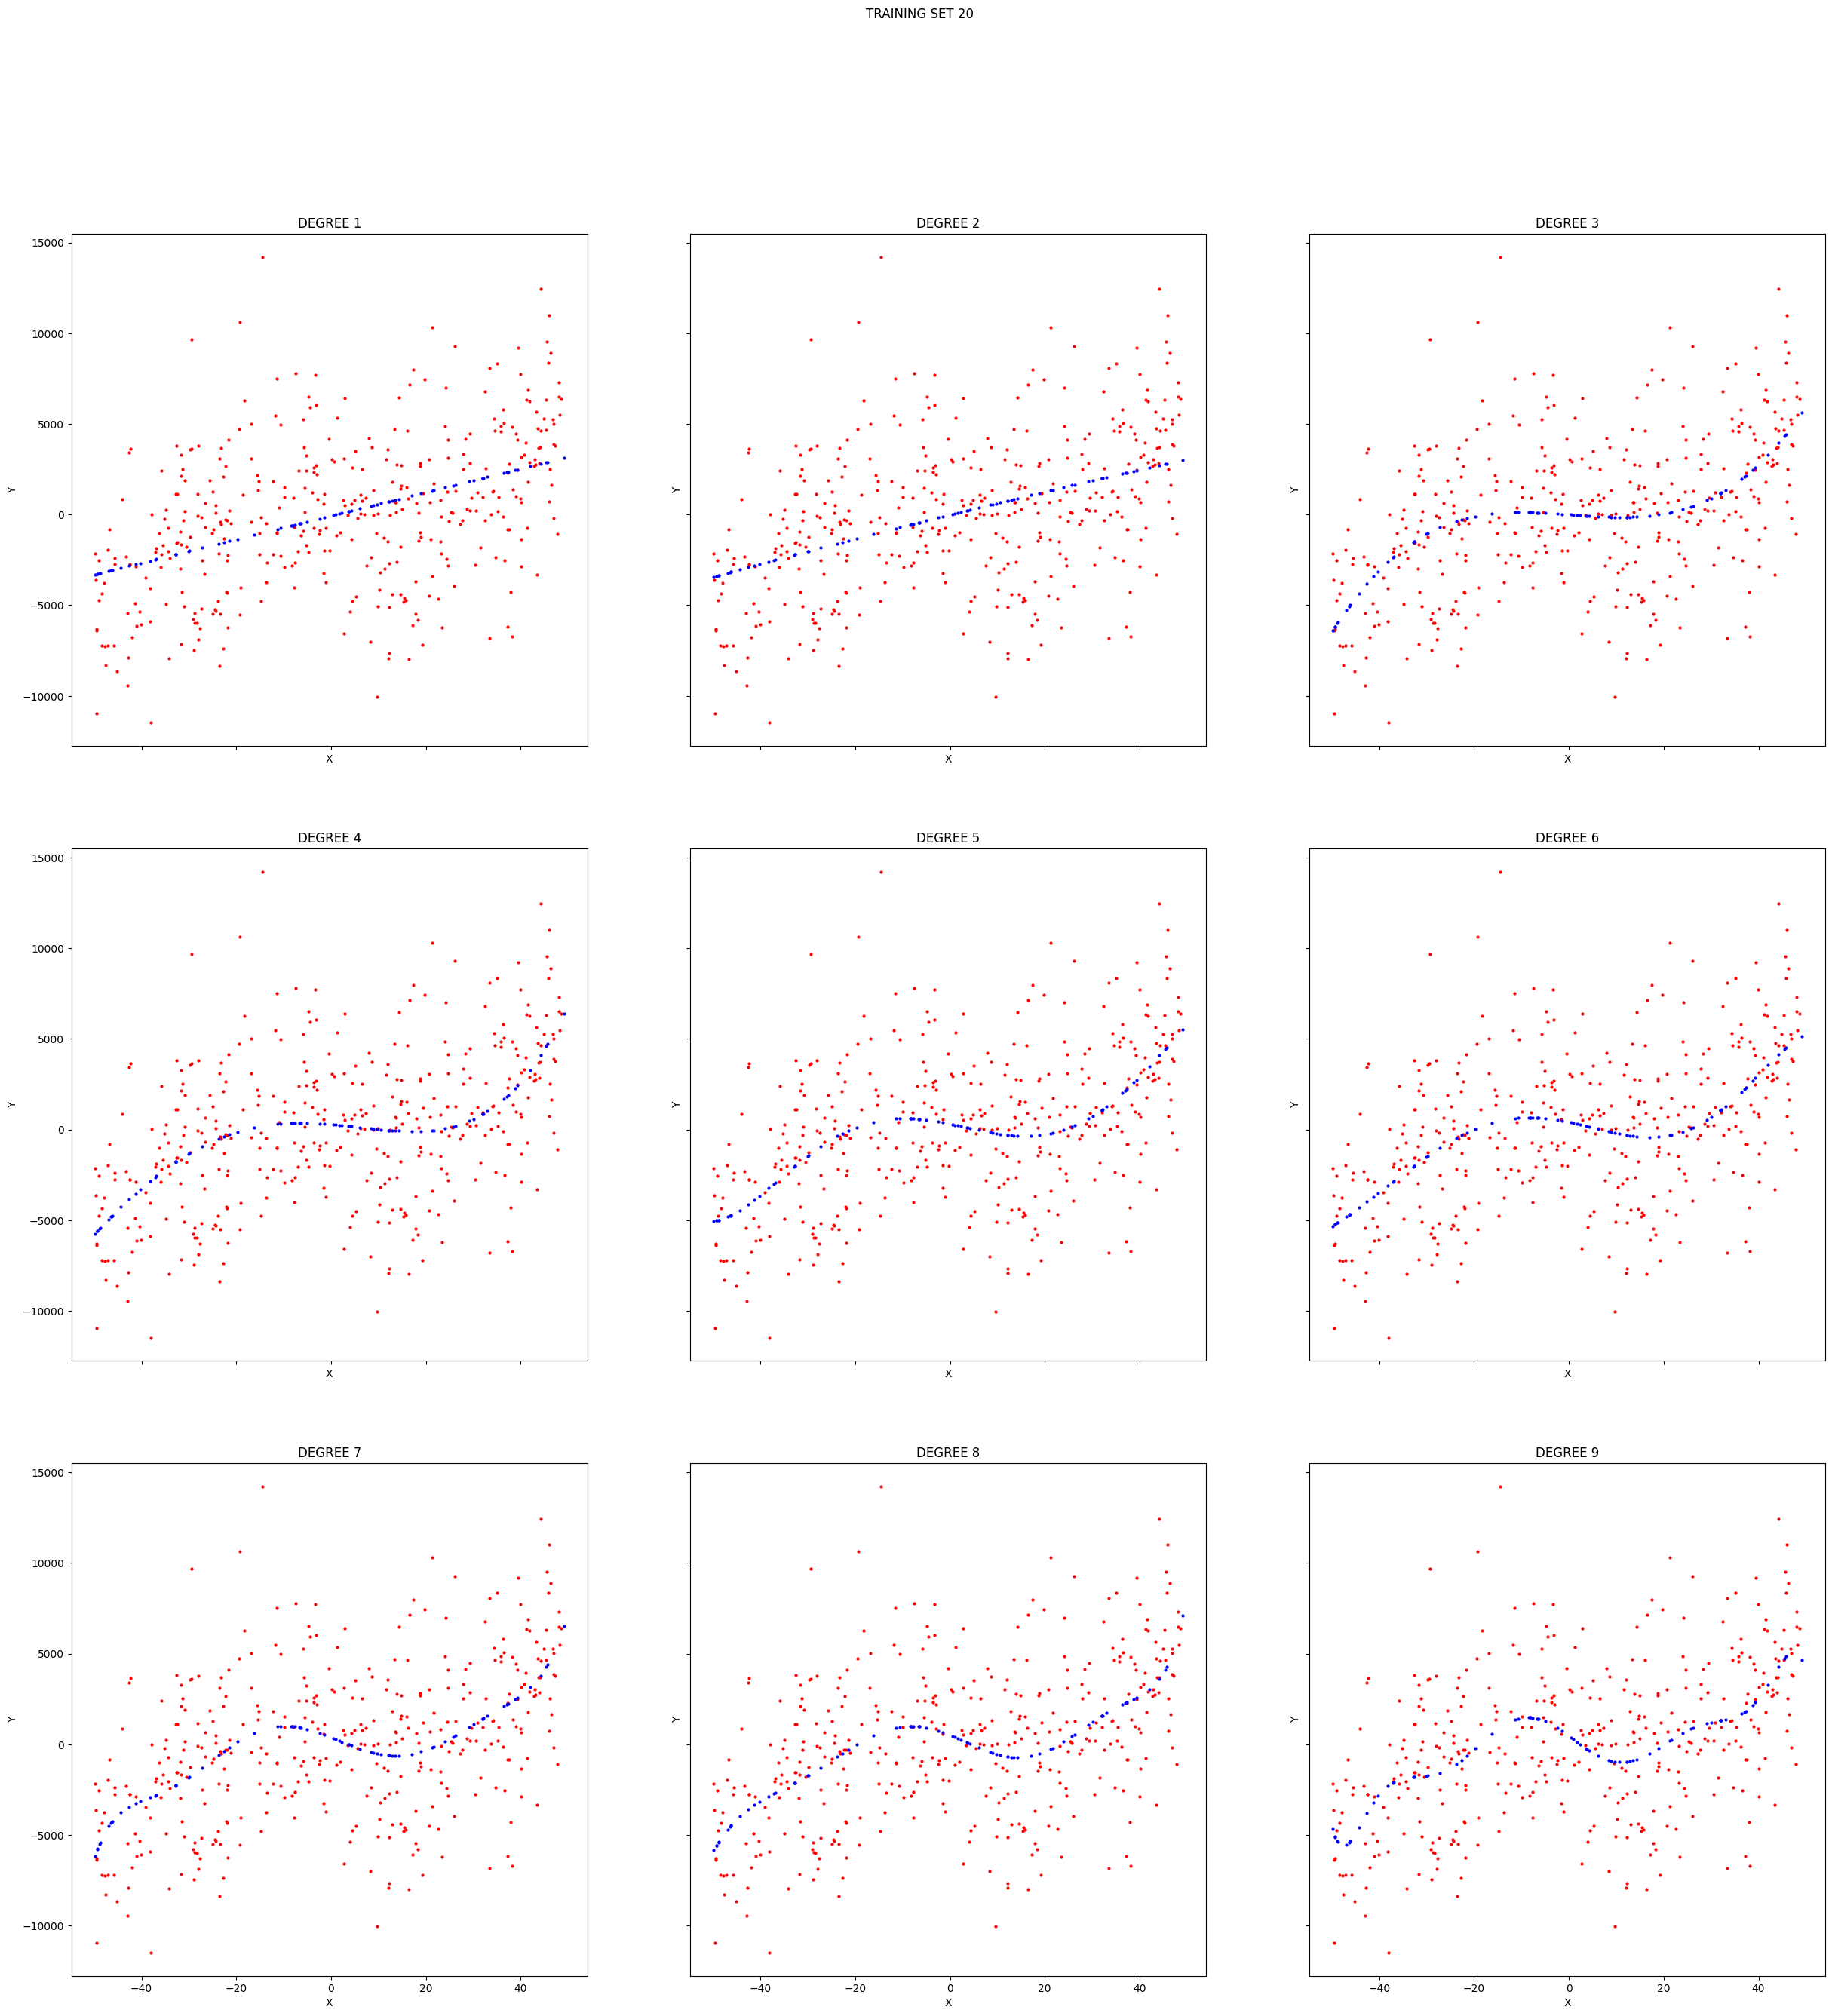

In [27]:
y_predicted = []
for i in range(20):
    f = plt.figure()
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(30, 30))
    f.suptitle(f'TRAINING SET {i+1}')
    # Here I added .squeeze() for consistency with other cells. The value returned from X_train_data_sets[i] will have the
    # shape (450, 1) so we need to need to squeeze it to (450, )
    x = X_train_data_sets[i].squeeze() # [:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i].squeeze()
    temp = []
    for degree in range(0, 9):
        axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
        #TODO: Create polynomial features of current degree + 1 using PolynomialFeatures function
        poly_features = PolynomialFeatures(degree=degree+1)

        #TODO: Fit the polynomial features on the current training set using the fit_transform method
        X_train_poly = poly_features.fit_transform(X=x[:, np.newaxis])

        #TODO: Create a plolynomial regression model using LinearRegression class
        poly_model = LinearRegression()
        
        #TODO: Fit the model to the current training set
        poly_model.fit(X_train_poly, y[:, np.newaxis])
        
        #TODO: Predict the value of y for the testing set using the predict method Hint: fit the polynomial features on the xTest[:, numpy.newaxis] then predict the value of y for the polynomial features
        X_test_poly = poly_features.transform(xTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        
        #TODO: append the current prediction to the temp list
        temp.append(y_test_predict)
        
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:, np.newaxis], y_test_predict, 'b.', markersize=4)
        # plt.title("DEGREE "+str(degree+1)) # <---- This is not working as expected so I replaced it with the next line.
        axes[int(degree/3)][int(degree % 3)].set_title(f'DEGREE {degree+1}')
        # plt.xlabel("X")
        # plt.ylabel("Y") # See the next two lines.
        axes[int(degree/3)][int(degree % 3)].set_xlabel("X")
        axes[int(degree/3)][int(degree % 3)].set_ylabel("Y")
    #TODO: append the prediction of all 9 models to the y_predicted list Hint: the prediction of all models are saved in temp
    y_predicted.append(temp)
    plt.show()


# STEP 3: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

## Function for calculating the bias and the variance

In [28]:
def find_bias_variance1(order): 
    #TODO: define a function to calculate mean and variance for 20 datasets
    y_predicted_part = []
    for i in range(20):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = np.asarray(y_predicted_part)
    #TODO: calculate the bias using np.mean and np.abs
    bias=np.mean(np.abs(y_predicted_part - xTest),axis=0)
    #TODO: calculate the variance using np.var
    variance=np.var(np.abs(y_predicted_part - np.mean(y_predicted_part)),axis=0) 
    return(np.mean(bias), np.mean(variance))


In [29]:
#TODO: call the function to calculate the bias and variance for all the degrees of the models
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)


Bias: [1900.6077110157678, 1920.8024446755908, 1843.0191395345016, 1843.6135407948898, 1858.3197941500052, 1879.9582223975979, 1867.105576965813, 1875.2032007015473, 1879.5913690635452]
Variance: [73166.00372977121, 93705.05046443042, 146287.52515405344, 197587.2309079985, 258249.13882914121, 311726.5850475587, 328244.427339275, 385007.2993016064, 430121.7386717458]


## Tabulate the values

In [30]:
#TODO: Tabulate the values
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)


   DEGREE         BIAS        BIAS^2       VARIANCE           MSE
0       1  1900.607711  3.612310e+06   73166.003730  3.685476e+06
1       2  1920.802445  3.689482e+06   93705.050464  3.783187e+06
2       3  1843.019140  3.396720e+06  146287.525154  3.543007e+06
3       4  1843.613541  3.398911e+06  197587.230908  3.596498e+06
4       5  1858.319794  3.453352e+06  258249.138829  3.711602e+06
5       6  1879.958222  3.534243e+06  311726.585048  3.845970e+06
6       7  1867.105577  3.486083e+06  328244.427339  3.814328e+06
7       8  1875.203201  3.516387e+06  385007.299302  3.901394e+06
8       9  1879.591369  3.532864e+06  430121.738672  3.962985e+06


## Plot the bias-variance tradeoff

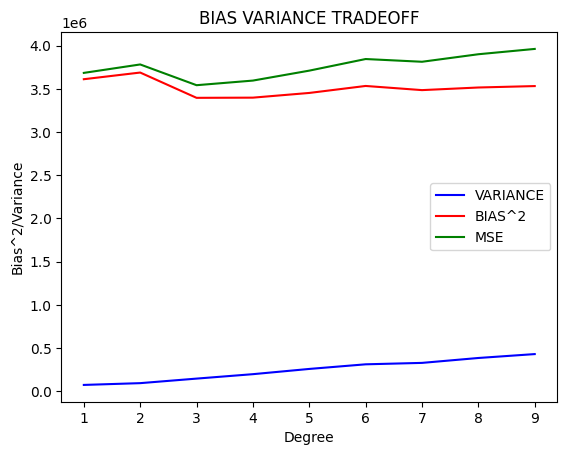

In [31]:
#TODO: Plot the bias^2, variance, and MSE 
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()


# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 640x480 with 0 Axes>

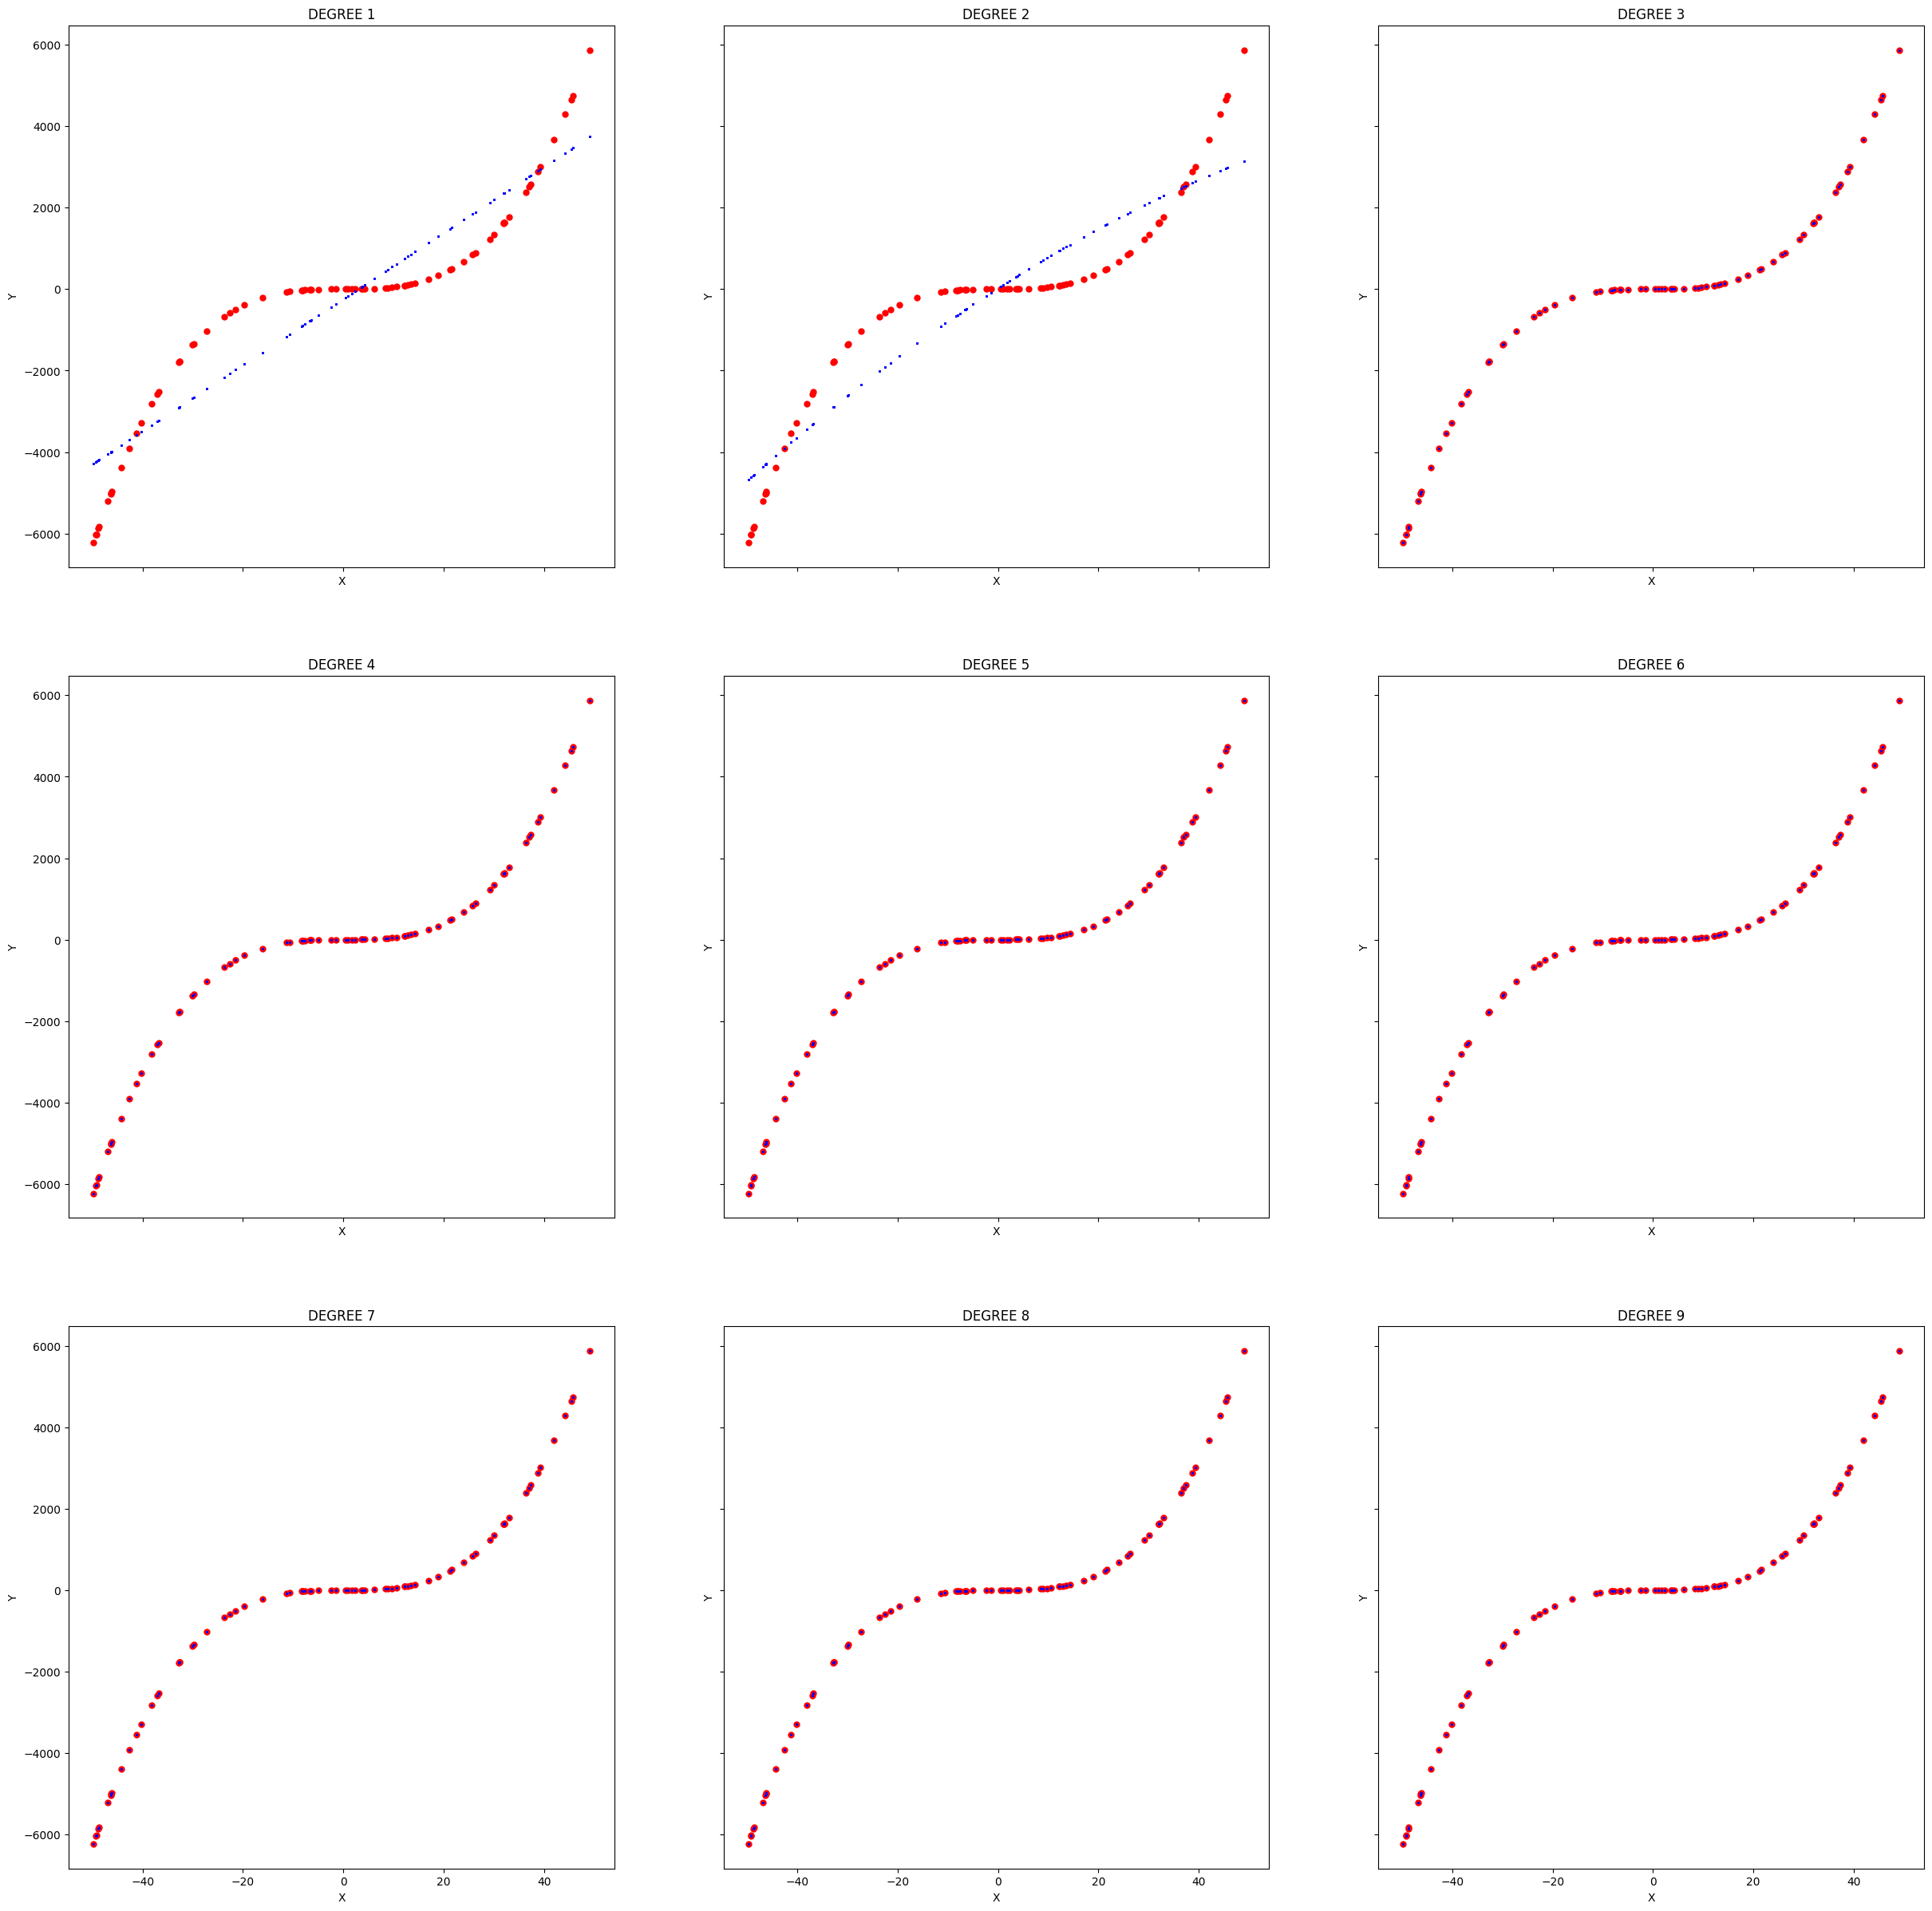

In [32]:
#TODO: Plot the fitting function of all models for the 20 datasets
f = plt.figure()
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=True, sharey = True,figsize=(30,30))
for degree in range(0,9):
    xtemp=np.concatenate([xTest for i in range(20)])
    y_predicted_part=[]
    for i in range(20):
        #TODO Append the prediction of the model with the current degree for each dataset to y_predicted_part
        poly_features = PolynomialFeatures(degree=degree+1)
        X_test_poly = poly_features.fit_transform(X=xTest[:, np.newaxis])
        poly_model = LinearRegression()
        poly_model.fit(X_test_poly, yTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        y_predicted_part.append(y_test_predict)
    ytemp=np.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree)%3)].plot(xTest, yTest, 'r.',markersize=10)
    axes[int((degree)/3)][int((degree)%3)].plot(xtemp, ytemp,'b.',markersize=1)
    axes[int(degree/3)][int(degree % 3)].set_title(f'DEGREE {degree+1}') # I added this line.
    axes[int(degree/3)][int(degree % 3)].set_xlabel("X") # I added this line.
    axes[int(degree/3)][int(degree % 3)].set_ylabel("Y") # I added this line.
# plt.xlabel("X")
# plt.ylabel("Y")
plt.show()
